# <b>FYP 2 (Ryan Kho Yuen Thian)</b>

# <b>AutoML Approach using H2O</b>

<hr/>

## 1. Basic Data Understanding

### 1.1 Initialise the H2O Cluster

In [1]:
import h2o
from h2o.frame import H2OFrame

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.6+9-LTS-190, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\envs\ForFYP\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ryank\AppData\Local\Temp\tmp4r84ixzw
  JVM stdout: C:\Users\ryank\AppData\Local\Temp\tmp4r84ixzw\h2o_ryank_started_from_python.out
  JVM stderr: C:\Users\ryank\AppData\Local\Temp\tmp4r84ixzw\h2o_ryank_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Asia/Kuala_Lumpur
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    7 months and 8 days
H2O_cluster_name:           H2O_from_python_ryank_ya8dof
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.922 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.18 final
--------------------------  -----------------------------

### 1.2 Load dataset

In [3]:
raw_data_path = '../Dataset/german.data'

In [4]:
data_frame = h2o.import_file(raw_data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### 1.3 Add Column Names to the Dataframe 

Currently, the dataframe has no column names. Here, I am adding them so that it is easier to identify each column

In [5]:
column_names = ['checking_acct_status', 'duration_months', 'credit_history', 'purpose', 'credit_amt', 'savings_acct_bonds', 'employment_duration', 'instalment_rate_%', 'personal_status_sex', 'other_debtors_guarantors', 'present_residence_duration', 'property', 'age', 'other_installment_plans', 'housing', 'existing_credits_at_bank', 'job_type', 'no_of_people_liable', 'telephone', 'foreign_worker', 'credit_risk']
data_frame.columns = column_names

### 1.4 View the Data

In [6]:
data_frame.head()

checking_acct_status      duration_months  credit_history    purpose      credit_amt  savings_acct_bonds    employment_duration      instalment_rate_%  personal_status_sex    other_debtors_guarantors      present_residence_duration  property      age  other_installment_plans    housing      existing_credits_at_bank  job_type      no_of_people_liable  telephone    foreign_worker      credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
A11                                     6  A34               A43                1169  A65                   A75                                      4  A93                    A101                                                   4  A121           67  A143                       A152                                2  A173                            1  A192         A201                          1
A12                                    48  A32               A43                5951  A61                   A73                                      2  A92                    A101                                                   2  A121           22  A143                       A152                                1  A173                            1  A191         A201                          2
A14                                    12  A34               A46                2096  A61                   A74                                      2  A93                    A101                                                   3  A121           49  A143                       A152                                1  A172                            2  A191         A201                          1
A11                                    42  A32               A42                7882  A61                   A74                                      2  A93                    A103                                                   4  A122           45  A143                       A153                                1  A173                            2  A191         A201                          1
A11                                    24  A33               A40                4870  A61                   A73                                      3  A93                    A101                                                   4  A124           53  A143                       A153                                2  A173                            2  A191         A201                          2
A14                                    36  A32               A46                9055  A65                   A73                                      2  A93                    A101                                                   4  A124           35  A143                       A153                                1  A172                            2  A192         A201                          1
A14                                    24  A32               A42                2835  A63                   A75                                      3  A93                    A101                                                   4  A122           53  A143                       A152                                1  A173                            1  A191         A201                          1
A12                                    36  A32               A41                6948  A61                   A73                                      2  A93                    A101                                                   2  A123           35  A143                       A151                                1  A174                            1  A192         A201                          1
A14                 

### 1.5 Summary of Dataframe

In [7]:
data_frame.describe()

Rows:1000
Cols:21

checking_acct_status    duration_months     credit_history    purpose    credit_amt          savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age                other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
-------  ----------------------  ------------------  ----------------  ---------  ------------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----------------  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------------
type     enum                    int                 enum              enum       int                 enum                  enum                   int                  enum                   enum                        int                           enum        int                enum                       enum       int                         enum        int                    enum         enum              int
mins                             4.0                                              250.0                                                            1.0                                                                     1.0                                       19.0                                                     1.0                                     1.0                                                   1.0
mean                             20.903                                           3271.258                                                         2.973                                                                   2.845                                     35.546                                                   1.4070000000000003                      1.1550000000000005                                    1.3000000000000003
maxs                             72.0                                             18424.0                                                          4.0                                                                     4.0                                       75.0                                                     4.0                                     2.0                                                   2.0
sigma                            12.058814452756373                               2822.7368759604406                                               1.1187146743126786                                                      1.1037178956568536                        11.37546857431751                                        0.5776544682461001                      0.362085771753194                                     0.45848687027025126
zeros                            0                                                0                                                                0                                                                       0                                         0                                                        0                                       0                                                     0
missing  0                       0                   0                 0          0                   0                     0                      0                    0                      0                           0                             0           0                  0                          0          0                           0           0                      0            0                 0
0        A11                     6.0                 A34               A43        1169.0              A65                   A75                    4.0                  A93                    A101                   

<b>Observation: </b>There are no missing values in all the columns so no imputation is required.

<hr/>

## 2. Data Preprocessing (Before Splitting)

### 2.1 Check for Duplicated Data

In [8]:
pandas_df = data_frame.as_data_frame()

C:\ProgramData\Anaconda3\envs\ForFYP\lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [9]:
duplicates = pandas_df[pandas_df.duplicated()]

In [10]:
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [checking_acct_status, duration_months, credit_history, purpose, credit_amt, savings_acct_bonds, employment_duration, instalment_rate_%, personal_status_sex, other_debtors_guarantors, present_residence_duration, property, age, other_installment_plans, housing, existing_credits_at_bank, job_type, no_of_people_liable, telephone, foreign_worker, credit_risk]
Index: []

[0 rows x 21 columns]


In [11]:
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


<b>Observation: </b>There is no duplicate row.

### 2.2 Fix Data Inconsistencies

This is done just in case there are any inconsistent data.

In [12]:
#The expected valid values for some of the columns
c1 = ['A11', 'A12', 'A13', 'A14']

c3 = ['A30', 'A31', 'A32', 'A33', 'A34']
c4 = ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410']

c6 = ['A61', 'A62', 'A63', 'A64', 'A65']
c7 = ['A71', 'A72', 'A73', 'A74', 'A75']

c9 = ['A91', 'A92', 'A93', 'A94', 'A95']
c10 = ['A101', 'A102', 'A103']

c12 = ['A121', 'A122', 'A123', 'A124']

c14 = ['A141', 'A142', 'A143']
c15 = ['A151', 'A152', 'A153']

c17 = ['A171', 'A172', 'A173', 'A174']

c19 = ['A191', 'A192']
c20 = ['A201', 'A202']
c21 = [1,2]

df_dict = {'checking_acct_status': c1, \
           'credit_history': c3, \
           'purpose': c4, \
           'savings_acct_bonds': c6, \
           'employment_duration': c7, \
           'personal_status_sex': c9, \
           'other_debtors_guarantors': c10, \
           'property': c12, \
           'other_installment_plans': c14, \
           'housing': c15, \
           'job_type': c17, \
           'telephone': c19, \
           'foreign_worker': c20, \
           'credit_risk': c21}
print("Length of dictionary: ", len(df_dict))

Length of dictionary:  14


In [13]:
# To Convert the H2O frame to Pandas DataFrame
pandas_df = data_frame.as_data_frame()

valid_columns = []

# Iterate through each column in the DataFrame
for column in pandas_df.columns:
    if column in df_dict:
        valid_values = df_dict[column]
        is_valid = True
        # Check each value in the column
        for idx, value in pandas_df[column].items():
            if value not in valid_values:
                print(f"Invalid value in column '{column}' at index {idx}: {value}")
                is_valid = False
                pandas_df.at[idx, column] = None
        if is_valid:
            valid_columns.append(column)

# Display the valid columns and their count
print("\nValid columns:")
for col in valid_columns:
    print(col)
print(f"\nNumber of valid columns: {len(valid_columns)}")

# Convert back to H2O frame if needed
rectified_data_frame = H2OFrame(pandas_df)


Valid columns:
checking_acct_status
credit_history
purpose
savings_acct_bonds
employment_duration
personal_status_sex
other_debtors_guarantors
property
other_installment_plans
housing
job_type
telephone
foreign_worker
credit_risk

Number of valid columns: 14


C:\ProgramData\Anaconda3\envs\ForFYP\lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


None of the categorical/discrete columns contain any invalid values so there is no data inconsistency in those columns.

This displays the number of unique values for each column. Columns with many unique values are most likely to be numerical columns.

In [14]:
pandas_df.nunique()

checking_acct_status            4
duration_months                33
credit_history                  5
purpose                        10
credit_amt                    921
savings_acct_bonds              5
employment_duration             5
instalment_rate_%               4
personal_status_sex             4
other_debtors_guarantors        3
present_residence_duration      4
property                        4
age                            53
other_installment_plans         3
housing                         3
existing_credits_at_bank        4
job_type                        4
no_of_people_liable             2
telephone                       2
foreign_worker                  2
credit_risk                     2
dtype: int64

### 2.3 Label Encoding

Here, I am converting the categorical columns into numerical ones so that they can be fitted by machine learning models, which only take numerical data. The code below performs label encoding and displays the mapping for each feature.

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# To Convert the H2O frame to Pandas DataFrame
le_pandas_df = rectified_data_frame.as_data_frame()

cols = ['checking_acct_status', 'credit_history', 'purpose', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', \
                  'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job_type', 'telephone', 'foreign_worker']

# Dictionary to store the label encoders and their mappings
label_encoders = {}
mappings = {}

# Apply label encoding to each column
for col in cols:
    le = LabelEncoder()
    
    if col == 'purpose':
        # Add the new category 'A47' to the column temporarily
        temp_series = pd.Series(['A47'])
        temp_col = pd.concat([le_pandas_df[col].astype(str), temp_series], ignore_index=True)
        le.fit(temp_col)
        
        # Encode the column in the original dataframe
        le_pandas_df[col] = le.transform(le_pandas_df[col].astype(str))
        # Remove the temporary 'A47' entry if it was added
        if 'A47' in le_pandas_df[col].values:
            le_pandas_df = le_pandas_df[le_pandas_df[col] != le.transform(['A47'])[0]]
    elif col == 'personal_status_sex':
        # Add the new category 'A95' to the column temporarily
        temp_series = pd.Series(['A95'])
        temp_col = pd.concat([le_pandas_df[col].astype(str), temp_series], ignore_index=True)
        le.fit(temp_col)
        
        # Encode the column in the original dataframe
        le_pandas_df[col] = le.transform(le_pandas_df[col].astype(str))
        # Remove the temporary 'A95' entry if it was added
        if 'A95' in le_pandas_df[col].values:
            le_pandas_df = le_pandas_df[le_pandas_df[col] != le.transform(['A95'])[0]]
    else:
        le_pandas_df[col] = le.fit_transform(le_pandas_df[col])
    
    label_encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings for each column
for col, mapping in mappings.items():
    print(f"Mappings for {col}:")
    print(mapping)

# Convert back to H2O frame 
rectified_data_frame = H2OFrame(le_pandas_df)

C:\ProgramData\Anaconda3\envs\ForFYP\lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\ryank\AppData\Local\Temp\ipykernel_17164\552164806.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'A47' in le_pandas_df[col].values:
C:\Users\ryank\AppData\Local\Temp\ipykernel_17164\552164806.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'A95' in le_pandas_df[col].values:


Mappings for checking_acct_status:
{'A11': 0, 'A12': 1, 'A13': 2, 'A14': 3}
Mappings for credit_history:
{'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
Mappings for purpose:
{'A40': 0, 'A41': 1, 'A410': 2, 'A42': 3, 'A43': 4, 'A44': 5, 'A45': 6, 'A46': 7, 'A47': 8, 'A48': 9, 'A49': 10}
Mappings for savings_acct_bonds:
{'A61': 0, 'A62': 1, 'A63': 2, 'A64': 3, 'A65': 4}
Mappings for employment_duration:
{'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
Mappings for personal_status_sex:
{'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3, 'A95': 4}
Mappings for other_debtors_guarantors:
{'A101': 0, 'A102': 1, 'A103': 2}
Mappings for property:
{'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}
Mappings for other_installment_plans:
{'A141': 0, 'A142': 1, 'A143': 2}
Mappings for housing:
{'A151': 0, 'A152': 1, 'A153': 2}
Mappings for job_type:
{'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3}
Mappings for telephone:
{'A191': 0, 'A192': 1}
Mappings for foreign_worker:
{'A201': 0, 'A202': 1}
Parse progress: |██

Here, I check whether the changes were implemented.

In [16]:
rectified_data_frame.head()

checking_acct_status    duration_months    credit_history    purpose    credit_amt    savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age    other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
                     0                  6                 4          4          1169                     4                      4                    4                      2                           0                             4           0     67                          2          1                           2           2                      1            1                 0              1
                     1                 48                 2          4          5951                     0                      2                    2                      1                           0                             2           0     22                          2          1                           1           2                      1            0                 0              2
                     3                 12                 4          7          2096                     0                      3                    2                      2                           0                             3           0     49                          2          1                           1           1                      2            0                 0              1
                     0                 42                 2          3          7882                     0                      3                    2                      2                           2                             4           1     45                          2          2                           1           2                      2            0                 0              1
                     0                 24                 3          0          4870                     0                      2                    3                      2                           0                             4           3     53                          2          2                           2           2                      2            0                 0              2
                     3                 36                 2          7          9055                     4                      2                    2                      2                           0                             4           3     35                          2          2                           1           1                      2            1                 0              1
                     3                 24                 2          3          2835                     2                      4                    3                      2                           0                             4           1     53                          2          1                           1           2                      1            0                 0              1
                     1                 36                 2          1          6948                     0                      2                    2                      2                           0                             2           2     35                          2          0                           1           3                      1            1                 0              1
                     3

In [17]:
le_pandas_df.head(10)

checking_acct_status  duration_months  credit_history  purpose  credit_amt  \
0                     0                6               4        4        1169   
1                     1               48               2        4        5951   
2                     3               12               4        7        2096   
3                     0               42               2        3        7882   
4                     0               24               3        0        4870   
5                     3               36               2        7        9055   
6                     3               24               2        3        2835   
7                     1               36               2        1        6948   
8                     3               12               2        4        3059   
9                     1               30               4        0        5234   

   savings_acct_bonds  employment_duration  instalment_rate_%  \
0                   4                    4                  4   
1                   0                    2                  2   
2                   0                    3                  2   
3                   0                    3                  2   
4                   0                    2                  3   
5                   4                    2                  2   
6                   2                    4                  3   
7                   0                    2                  2   
8                   3                    3                  2   
9                   0                    0                  4   

   personal_status_sex  other_debtors_guarantors  ...  property  age  \
0                    2                         0  ...         0   67   
1                    1                         0  ...         0   22   
2                    2                         0  ...         0   49   
3                    2                         2  ...         1   45   
4                    2                         0  ...         3   53   
5                    2                         0  ...         3   35   
6                    2                         0  ...         1   53   
7                    2                         0  ...         2   35   
8                    0                         0  ...         0   61   
9                    3                         0  ...         2   28   

   other_installment_plans  housing  existing_credits_at_bank  job_type  \
0                        2        1                         2         2   
1                        2        1                         1         2   
2                        2        1                         1         1   
3                        2        2                         1         2   
4                        2        2                         2         2   
5                        2        2                         1         1   
6                        2        1                         1         2   
7                        2        0                         1         3   
8                        2        1                         1         1   
9                        2        1                         2         3   

   no_of_people_liable  telephone  foreign_worker  credit_risk  
0                    1          1               0            1  
1                    1          0               0            2  
2                    2          0               0            1  
3                    2          0               0            1  
4                    2          0               0            2  
5                    2          1               0            1  
6                    1          0               0            1  
7                    1          1               0            1  
8                    1          0               0            1  
9                    1          0               0            2  

[10 rows x 21 columns]

<hr/>

## 3. Train Test Split

In [18]:
import warnings 
warnings.filterwarnings('ignore') 
# Calculate value counts for 'credit_risk' column
credit_risk_counts = rectified_data_frame['credit_risk'].table()

# Calculate proportions
total_rows = rectified_data_frame.nrow
credit_risk_proportions = (credit_risk_counts['Count'] / total_rows) * 100

# Display the proportions and unique values
print("Proportion of each unique value in the 'credit_risk' column:")
for value, count, proportion in zip(credit_risk_counts['credit_risk'].as_data_frame().values.flatten(),
                                    credit_risk_counts['Count'].as_data_frame().values.flatten(),
                                    credit_risk_proportions.as_data_frame().values.flatten()):
    print(f"{value}: {proportion}% ({count} occurrences)")

Proportion of each unique value in the 'credit_risk' column:
1: 70% (700 occurrences)
2: 30% (300 occurrences)


The majority (70%) of the records correspond to 'Good Credit', which is represented by the value 1. 30% of the records correspond to 'Bad Credit', which is represented by 2.

Many binary classification algorithms assume that the target values are binary (0 and 1). This is because these models often output probabilities that are then thresholded to obtain binary predictions. Since the target values are currently 1 and 2, I need to convert them to 0 and 1 respectively.

To perform a train-test split while ensuring that the credit_risk column in both the train and test sets has 70% of 1 and 30% of 2, I perform stratification, ensuring that the proportion of each class in the target variable is preserved in both the train and test datasets.

In [19]:
# Replace values 1 with 0 and 2 with 1
rectified_data_frame['credit_risk'] = (rectified_data_frame['credit_risk'] == 1).ifelse(0, 1)

# Convert 'credit_risk' column to categorical
rectified_data_frame['credit_risk'] = rectified_data_frame['credit_risk'].asfactor()

# Stratification
stratifiedSplit = rectified_data_frame['credit_risk'].stratified_split(test_frac=0.2, seed=42)

# Train dataframe
train = rectified_data_frame[stratifiedSplit=="train"]

# Test dataframe
test = rectified_data_frame[stratifiedSplit=="test"]

# Print the shape of train and test sets
print(f"Training set shape: {train.shape}")
print(f"Testing set shape: {test.shape}")

Training set shape: (800, 21)
Testing set shape: (200, 21)


In [20]:
train.head()

checking_acct_status    duration_months    credit_history    purpose    credit_amt    savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age    other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
                     0                  6                 4          4          1169                     4                      4                    4                      2                           0                             4           0     67                          2          1                           2           2                      1            1                 0              0
                     1                 48                 2          4          5951                     0                      2                    2                      1                           0                             2           0     22                          2          1                           1           2                      1            0                 0              1
                     3                 12                 4          7          2096                     0                      3                    2                      2                           0                             3           0     49                          2          1                           1           1                      2            0                 0              0
                     0                 42                 2          3          7882                     0                      3                    2                      2                           2                             4           1     45                          2          2                           1           2                      2            0                 0              0
                     0                 24                 3          0          4870                     0                      2                    3                      2                           0                             4           3     53                          2          2                           2           2                      2            0                 0              1
                     3                 24                 2          3          2835                     2                      4                    3                      2                           0                             4           1     53                          2          1                           1           2                      1            0                 0              0
                     1                 36                 2          1          6948                     0                      2                    2                      2                           0                             2           2     35                          2          0                           1           3                      1            1                 0              0
                     3                 12                 2          4          3059                     3                      3                    2                      0                           0                             4           0     61                          2          1                           1           1                      1            0                 0              0
                     1

In [21]:
test.head()

checking_acct_status    duration_months    credit_history    purpose    credit_amt    savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age    other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
                     3                 36                 2          7          9055                     4                      2                    2                      2                           0                             4           3     35                          2          2                           1           1                      2            1                 0              0
                     0                 30                 0         10          8072                     4                      1                    2                      2                           0                             3           2     25                          0          1                           3           2                      1            0                 0              0
                     3                 24                 2          4          3430                     2                      4                    3                      2                           0                             2           2     31                          2          1                           1           2                      2            1                 0              0
                     0                  6                 2          4          2647                     2                      2                    2                      2                           0                             3           0     44                          2          0                           1           2                      2            0                 0              0
                     0                 10                 4          0          2241                     0                      1                    1                      2                           0                             3           0     48                          2          0                           2           1                      2            0                 1              0
                     1                 18                 2          0          5866                     1                      2                    2                      2                           0                             2           2     30                          2          1                           2           2                      1            1                 0              0
                     2                 18                 2          4          2100                     0                      2                    4                      2                           1                             2           0     37                          1          1                           1           2                      1            0                 0              1
                     3                 11                 4          0          1393                     0                      1                    4                      1                           0                             4           2     35                          2          1                           2           3                      1            0                 0              0
                     1

Here, I want to confirm that the proportion for each class is maintained in both the training and test datasets

In [22]:
# Get the frequency table for 'credit_risk' in rectified_data_frame
credit_risk_counts_full = rectified_data_frame["credit_risk"].table()
credit_risk_proportions_full = credit_risk_counts_full["Count"] / credit_risk_counts_full["Count"].sum()
print("Proportions in full dataset:")
print(credit_risk_proportions_full)

# Get the frequency table for 'credit_risk' in train set
credit_risk_counts_train = train["credit_risk"].table()
credit_risk_proportions_train = credit_risk_counts_train["Count"] / credit_risk_counts_train["Count"].sum()
print("Proportions in training set:")
print(credit_risk_proportions_train)

# Get the frequency table for 'credit_risk' in test set
credit_risk_counts_test = test["credit_risk"].table()
credit_risk_proportions_test = credit_risk_counts_test["Count"] / credit_risk_counts_test["Count"].sum()
print("Proportions in testing set:")
print(credit_risk_proportions_test)

Proportions in full dataset:
  Count
    0.7
    0.3
[2 rows x 1 column]

Proportions in training set:
  Count
    0.7
    0.3
[2 rows x 1 column]

Proportions in testing set:
  Count
    0.7
    0.3
[2 rows x 1 column]



In [23]:
# Function to calculate and print unique values and proportions
def print_unique_values_and_proportions(df, column_name, dataset_name):
    counts = df[column_name].table()
    total_count = counts['Count'].sum()
    proportions = (counts['Count'] / total_count) * 100
    
    print(f"Unique values and proportions in {dataset_name} dataset:")
    for level, count, proportion in zip(counts['credit_risk'].as_data_frame().values.flatten(), counts['Count'].as_data_frame().values.flatten(), proportions.as_data_frame().values.flatten()):
        print(f"Value: {level}, Count: {count}, Proportion: {proportion:.2f}%")
    print("\n")

# Print unique values and proportions for 'credit_risk' in each dataset
print_unique_values_and_proportions(rectified_data_frame, "credit_risk", "full")
print_unique_values_and_proportions(train, "credit_risk", "training")
print_unique_values_and_proportions(test, "credit_risk", "testing")

Unique values and proportions in full dataset:
Value: 0, Count: 700, Proportion: 70.00%
Value: 1, Count: 300, Proportion: 30.00%


Unique values and proportions in training dataset:
Value: 0, Count: 560, Proportion: 70.00%
Value: 1, Count: 240, Proportion: 30.00%


Unique values and proportions in testing dataset:
Value: 0, Count: 140, Proportion: 70.00%
Value: 1, Count: 60, Proportion: 30.00%




In [24]:
# Print unique values for 'credit_risk' in each DataFrame
print("Unique values in full dataset:")
print(rectified_data_frame['credit_risk'].unique())

print("\nUnique values in training set:")
print(train['credit_risk'].unique())

print("\nUnique values in testing set:")
print(test['credit_risk'].unique())

Unique values in full dataset:
  C1
   0
   1
[2 rows x 1 column]


Unique values in training set:
  C1
   0
   1
[2 rows x 1 column]


Unique values in testing set:
  C1
   0
   1
[2 rows x 1 column]



<hr/>

## 4. EDA on Training Dataset Before Balancing

### 4.1 Proportion of Classes

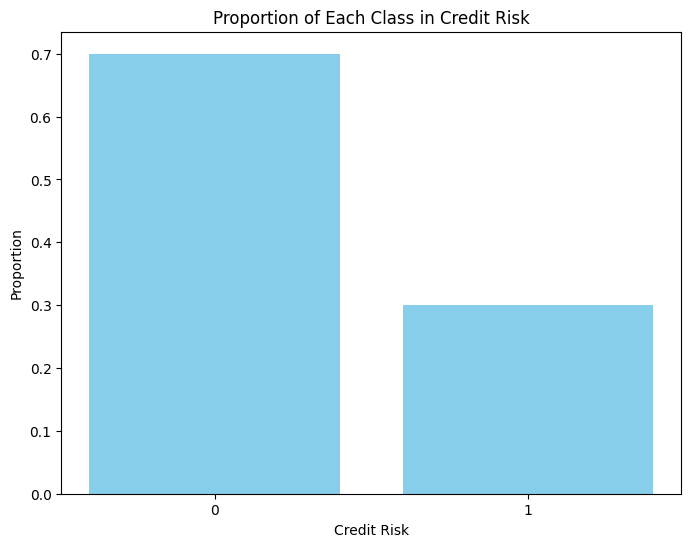

In [25]:
import matplotlib.pyplot as plt

# To Calculate the frequency of each class in the 'credit_risk' column
credit_risk_counts = train["credit_risk"].table()

# To Convert the H2O frame to a Pandas DataFrame
credit_risk_counts_pd = credit_risk_counts.as_data_frame()

# To Calculate the proportions
credit_risk_counts_pd['Proportion'] = credit_risk_counts_pd['Count'] / credit_risk_counts_pd['Count'].sum()
# Plot the proportions
plt.figure(figsize=(8, 6))
plt.bar(credit_risk_counts_pd['credit_risk'], credit_risk_counts_pd['Proportion'], color='skyblue')
plt.xlabel('Credit Risk')
plt.ylabel('Proportion')
plt.title('Proportion of Each Class in Credit Risk')
plt.xticks(ticks=credit_risk_counts_pd['credit_risk'], labels=credit_risk_counts_pd['credit_risk'])
plt.show()

<b>Observation: </b>The bar chart above confirms that 70% and 30% of the training data belong to 0 (Good Credit) and 1 (Bad Credit) respectively.

### 4.2 Correlation Matrix for Numeric Variables

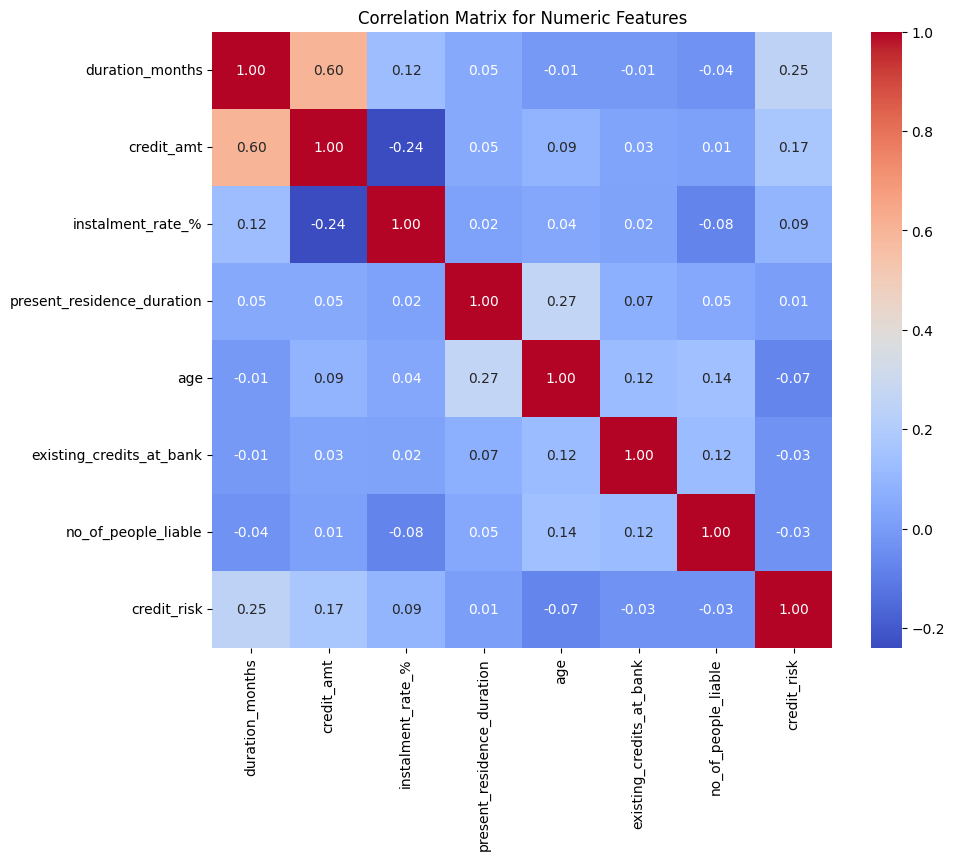

In [26]:
import seaborn as sns
# Assuming 'train' H2O dataframe is already created and contains the required columns
numeric_cols = ['duration_months', 'credit_amt', 'instalment_rate_%', 'present_residence_duration', 'age', 'existing_credits_at_bank', \
                'no_of_people_liable', 'credit_risk']

# Extract the specified columns
train_numeric = train[numeric_cols]

# Convert the H2O frame to a Pandas DataFrame
train_numeric_pd = train_numeric.as_data_frame()

# Compute the correlation matrix
corr_matrix = train_numeric_pd.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

<b>Observation: </b>We can observe that most of the variables have weak correlations (0.1 to 0.4 or -0.1 to -0.4) with one another while only a few variables have moderate (0.4 to 0.7 or -0.4 to -0.7) correlations with one another. Since there are no highly correlated variables here, there is none to be removed.

### 4.3 Variables with Noticeable Correlations with Each Other

In [29]:
train.columns

['checking_acct_status',
 'duration_months',
 'credit_history',
 'purpose',
 'credit_amt',
 'savings_acct_bonds',
 'employment_duration',
 'instalment_rate_%',
 'personal_status_sex',
 'other_debtors_guarantors',
 'present_residence_duration',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'existing_credits_at_bank',
 'job_type',
 'no_of_people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [30]:
necessary_cols = train_all_pd.columns
corr_unstacked = train_all_pd[necessary_cols].corr().unstack().abs()
ranked_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
ranked_corr = ranked_corr[ranked_corr != 1]

ranked_corr.head(10)

duration_months           credit_amt                  0.600810
credit_amt                duration_months             0.600810
credit_history            existing_credits_at_bank    0.476045
existing_credits_at_bank  credit_history              0.476045
telephone                 job_type                    0.413441
job_type                  telephone                   0.413441
credit_risk               checking_acct_status        0.345879
checking_acct_status      credit_risk                 0.345879
housing                   property                    0.323954
property                  housing                     0.323954
dtype: float64

<b>Observation: </b> This is another way to identify whether there are any highly correlated variables, which are considered to be redundant. Since none of the correlation coefficients are in the range of (0.7 to 0.9), there are no highly correlated variables here.

### 4.4 Pairplots for Numeric Variables (Without Hue as credit_risk)

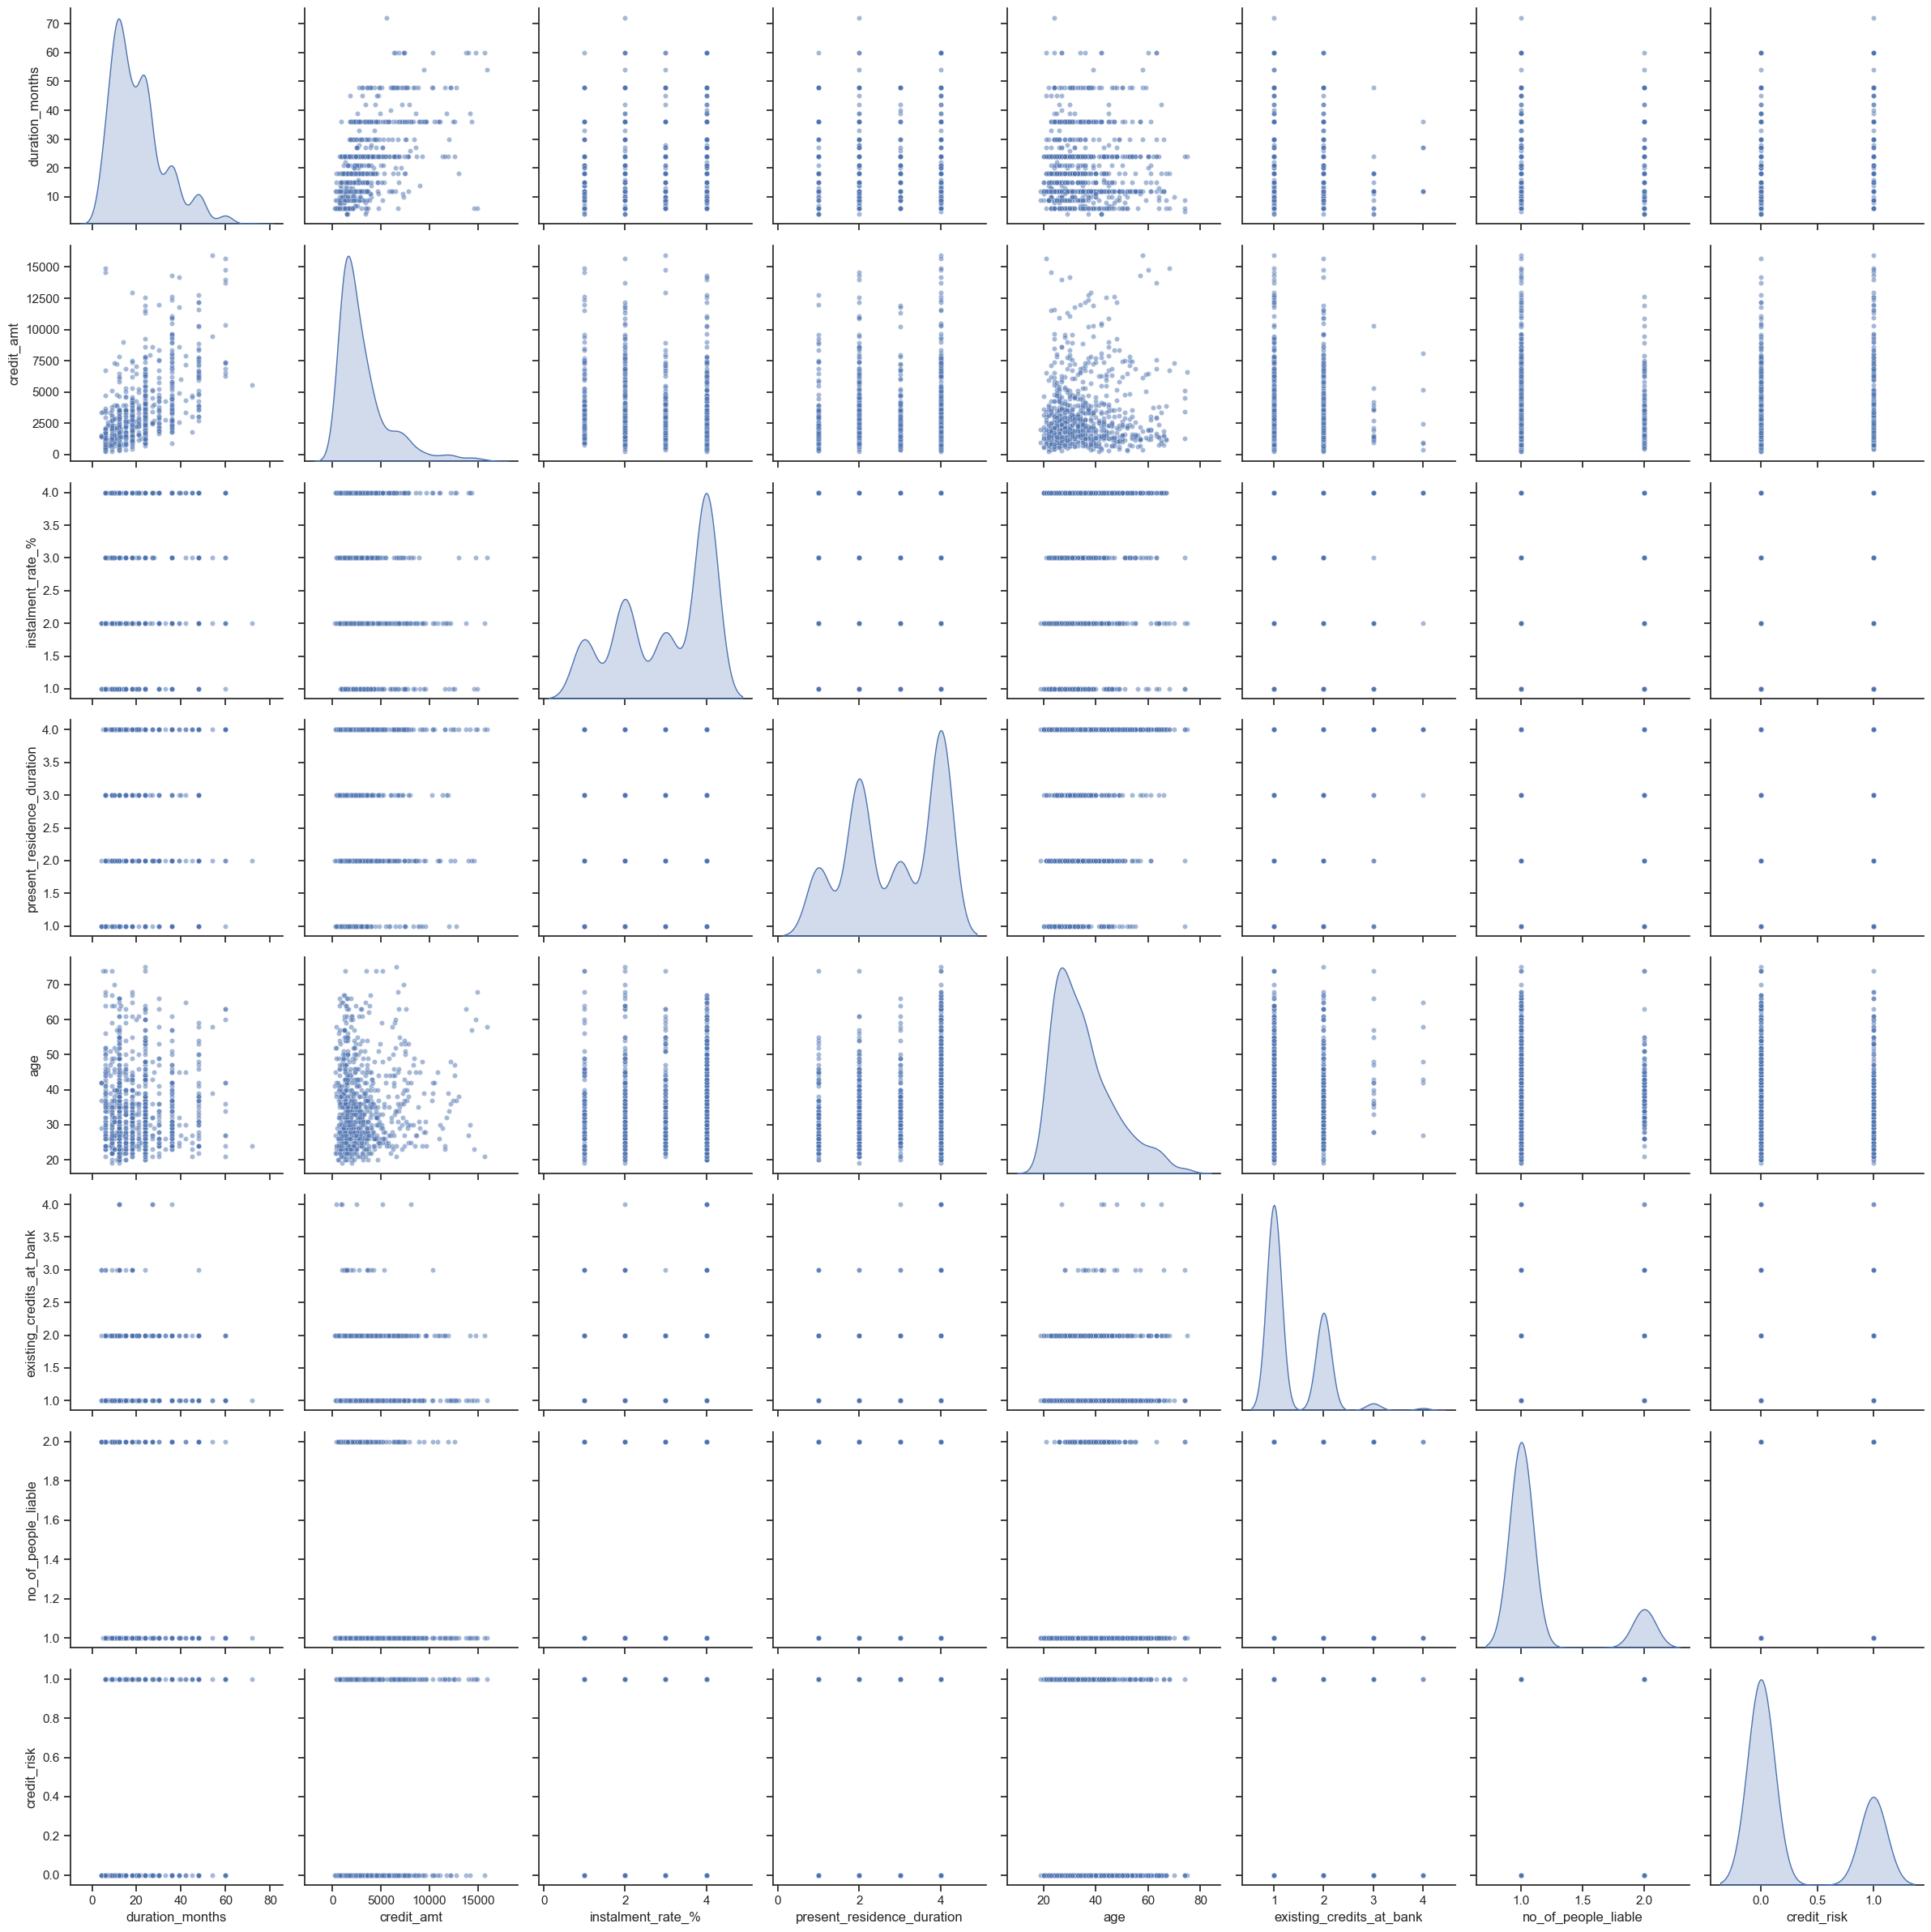

In [31]:
# Set style
sns.set(style="ticks")
# Generate pairplot with custom design and increased vertical spacing
sns.pairplot(train_all_pd[numeric_cols], diag_kind="kde", markers="o", plot_kws={"s": 20, "alpha": 0.5}, height=3)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

<b>Observations: </b>
<ol>
    <li>The KDE plots on the diagonal show the distribution of each individual variable. The distribution of data for all the variables here is not normally distributed. They are either left-skewed or right-skewed.</li>
    <li>The off-diagonal plots show the relationship between two variables.</li>
    <li>Most of the variables have very little correlation with each other, such as 'between present_residence_duration and no_of_people_liable' and 'between existing_credits_at_bank and present_residence_duration'. </li>
    <li>Only a few variables have some correlation with each other, such as 'between duration_months and credit_amt'</li>
</ol>

### 4.5 Pairplots for Numeric Variables (With Hue as credit_risk)

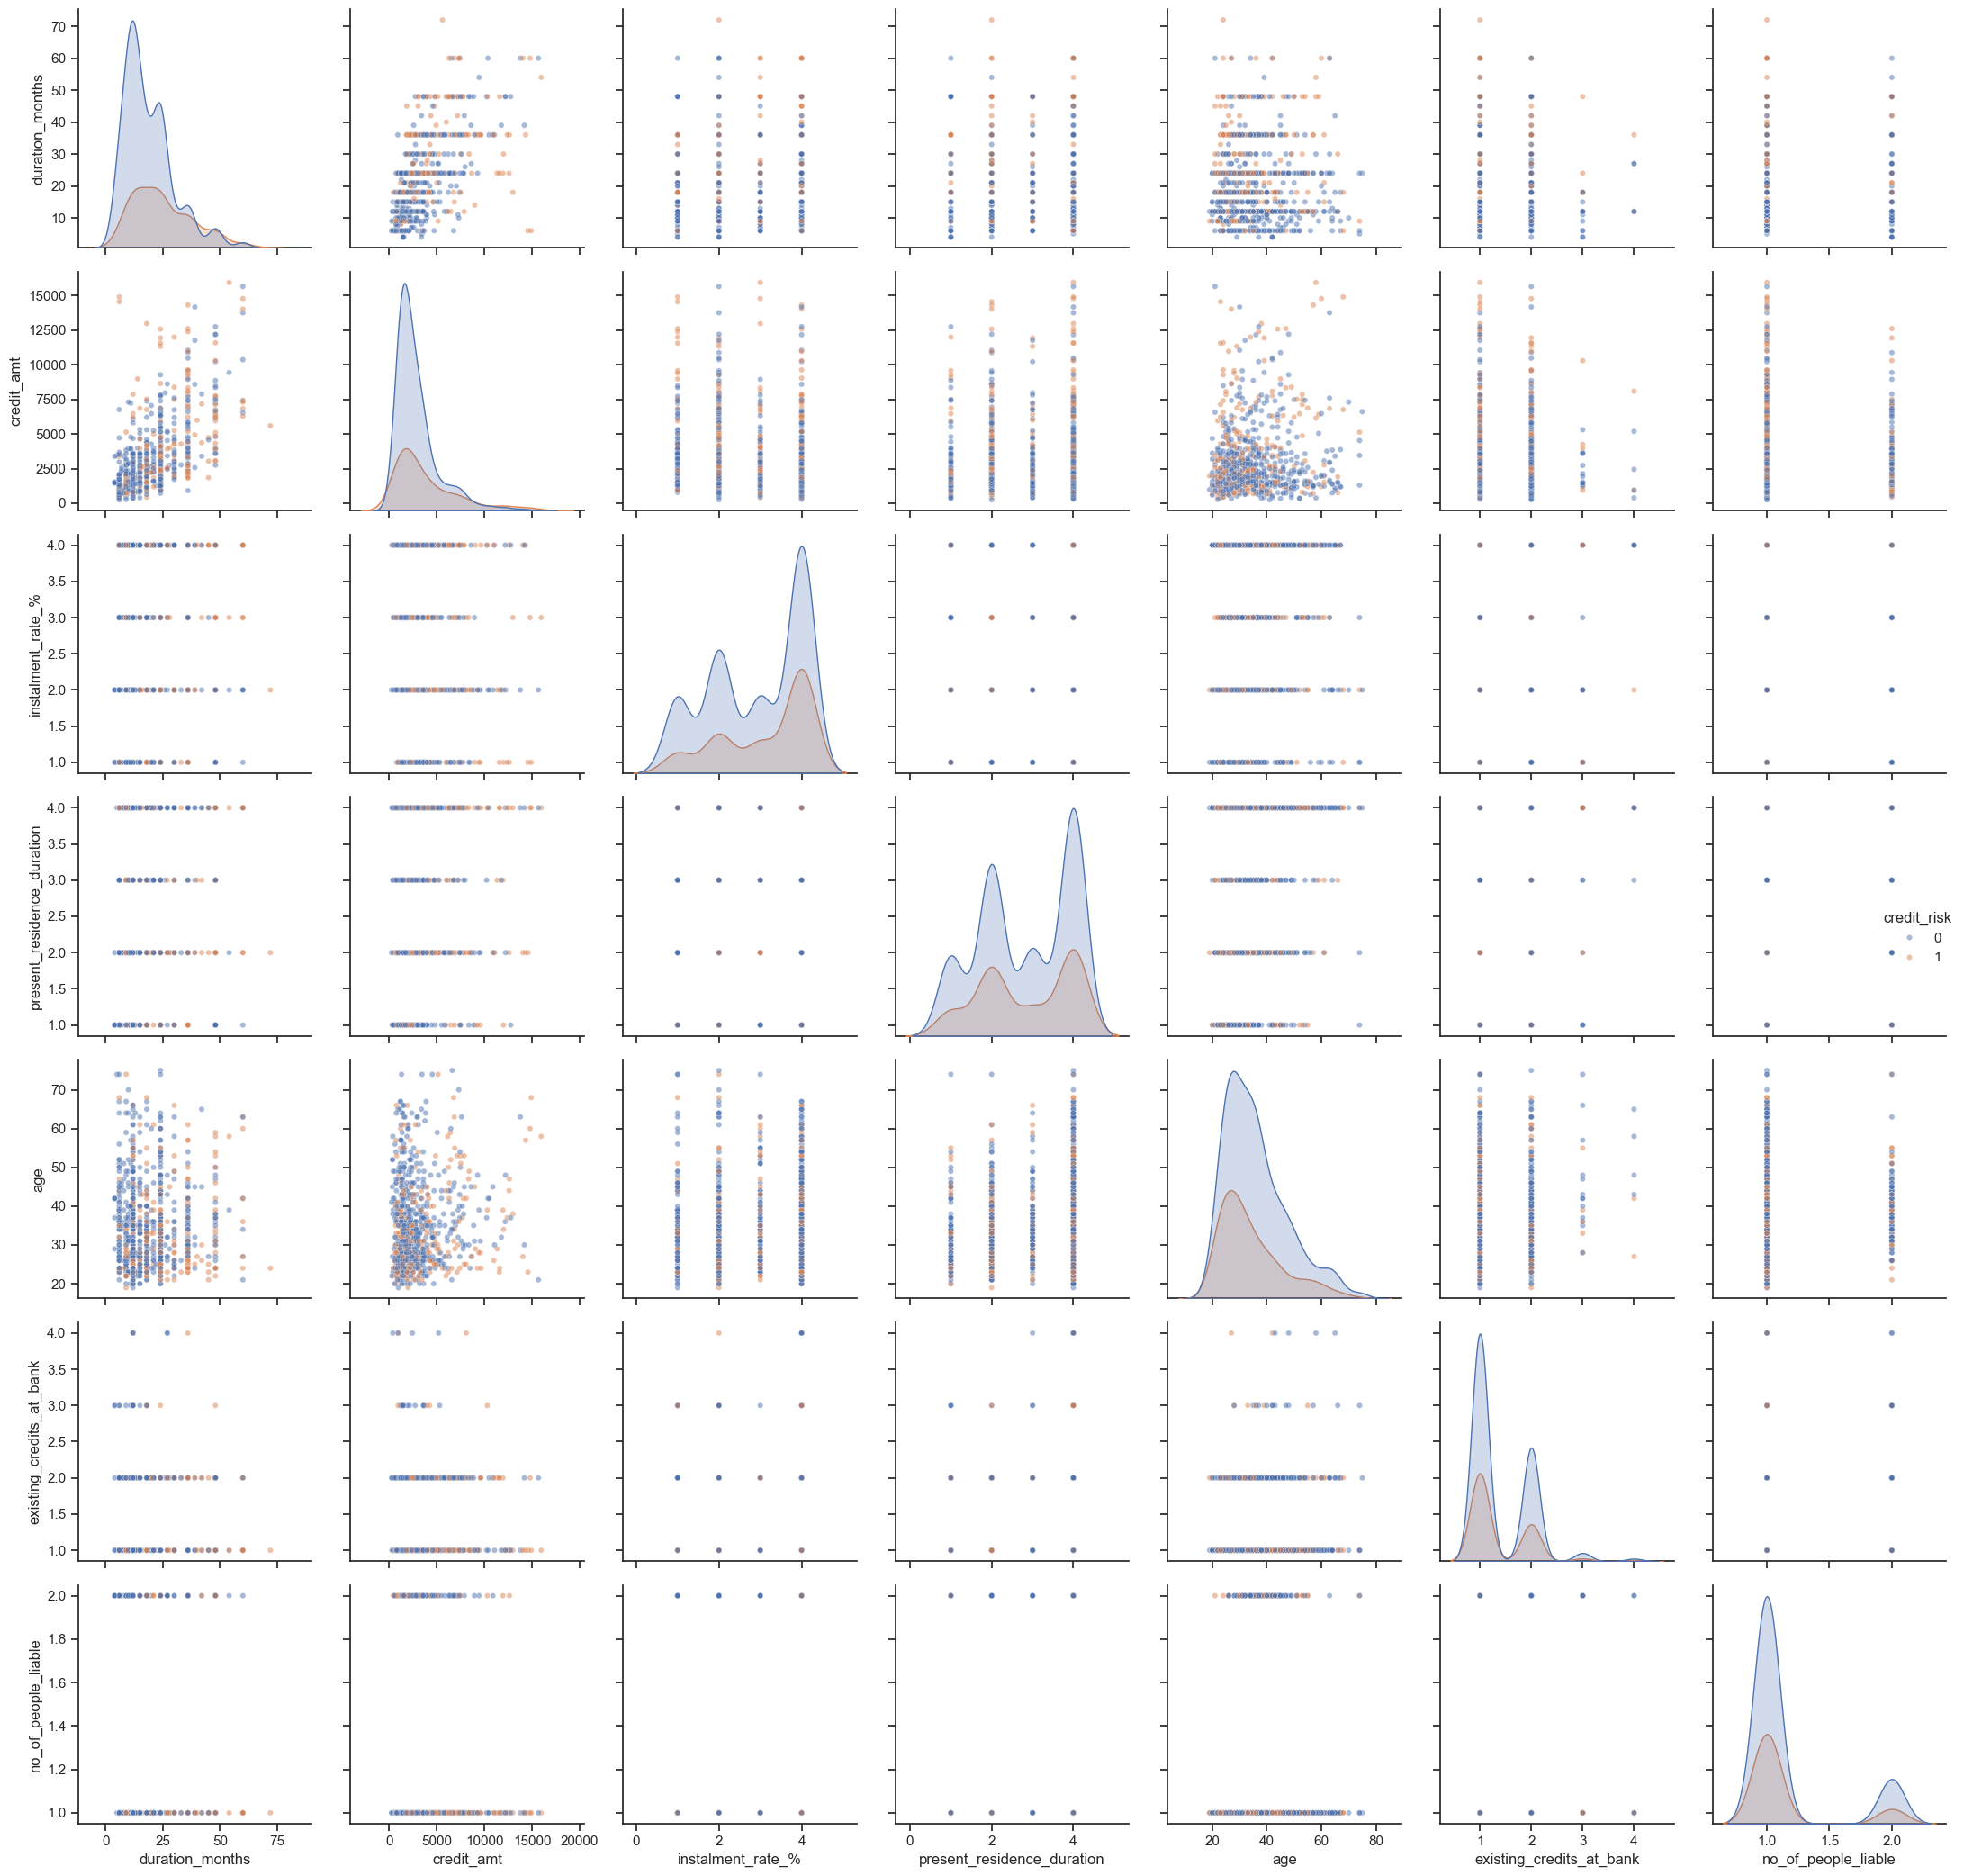

In [32]:
# Set style
sns.set(style="ticks")
# Generate pairplot with custom design, hue based on 'credit_risk', and increased vertical spacing
sns.pairplot(train_all_pd[numeric_cols], diag_kind="kde", markers="o", plot_kws={"s": 20, "alpha": 0.5}, height=3, aspect=1, hue='credit_risk')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

<b>Observation:</b>
<ol>
    <li>The hue helps us identify how the relationships between variables vary based on the target.</li>
    <li>Based on the KDE plots, the distribution of data for 'duration_months' and 'present_residence_duration' are quite different between the 2 classes.</li>
    <li>Based on the scatter plots, the patterns and correlations of the data are approximately the same for both classes as their points are plotted at approximately the same locations.</li>
</ol>

### 4.6 Distribution of Categorical Variables

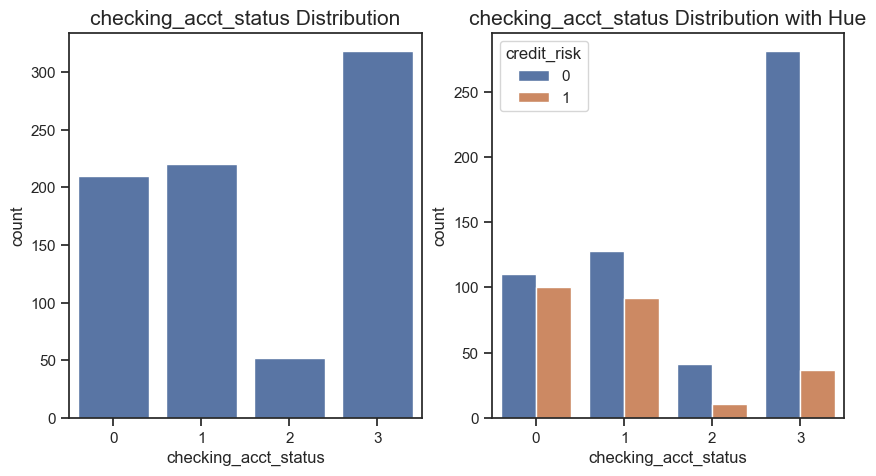

------------------------------------------------------------------------------------------------------------------------------------------------------


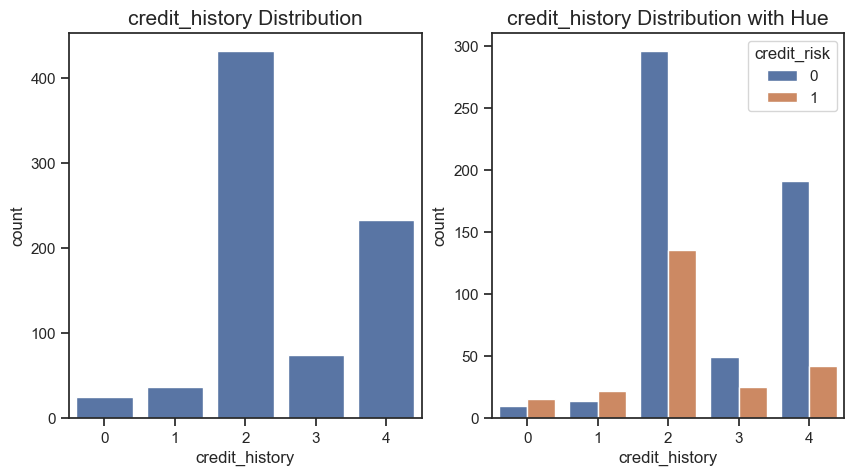

------------------------------------------------------------------------------------------------------------------------------------------------------


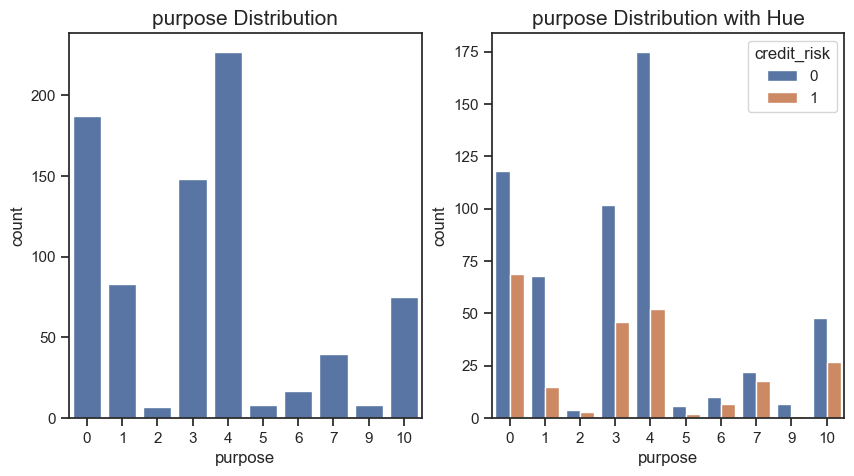

------------------------------------------------------------------------------------------------------------------------------------------------------


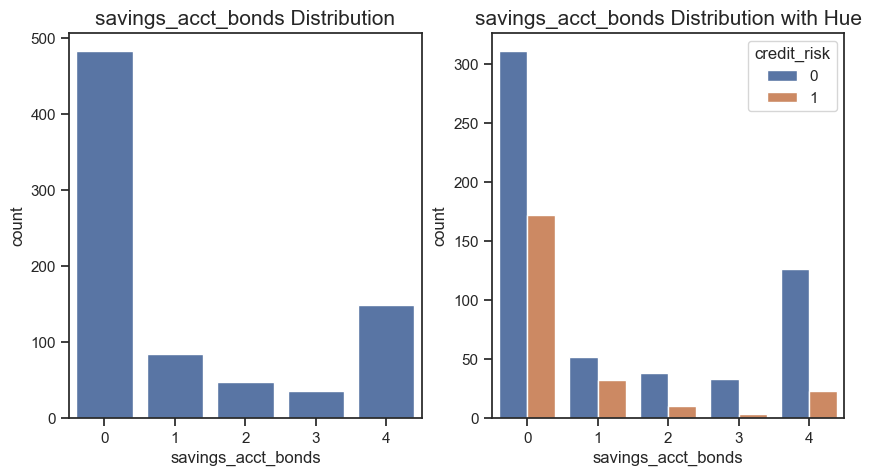

------------------------------------------------------------------------------------------------------------------------------------------------------


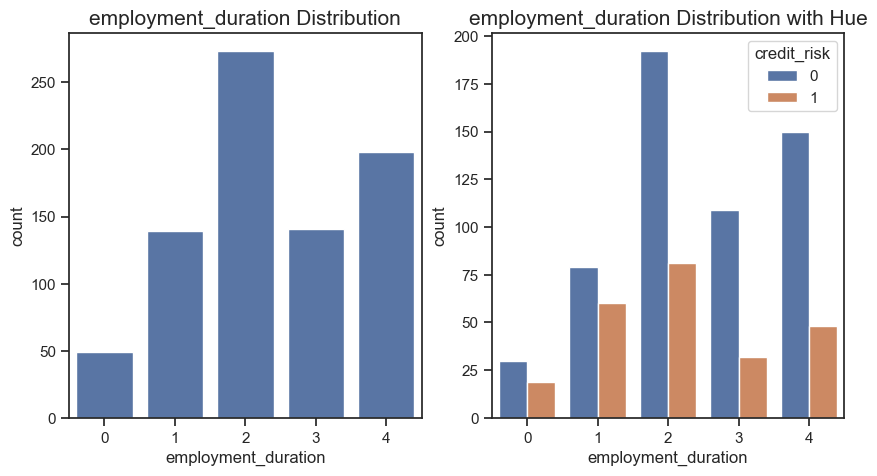

------------------------------------------------------------------------------------------------------------------------------------------------------


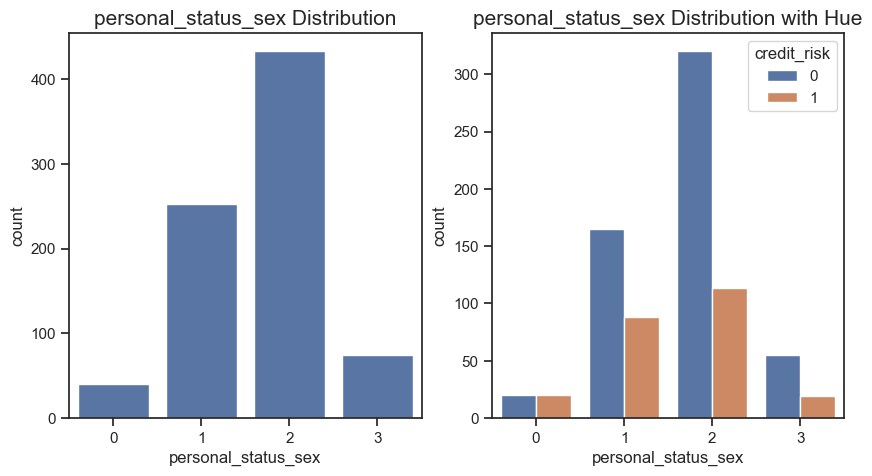

------------------------------------------------------------------------------------------------------------------------------------------------------


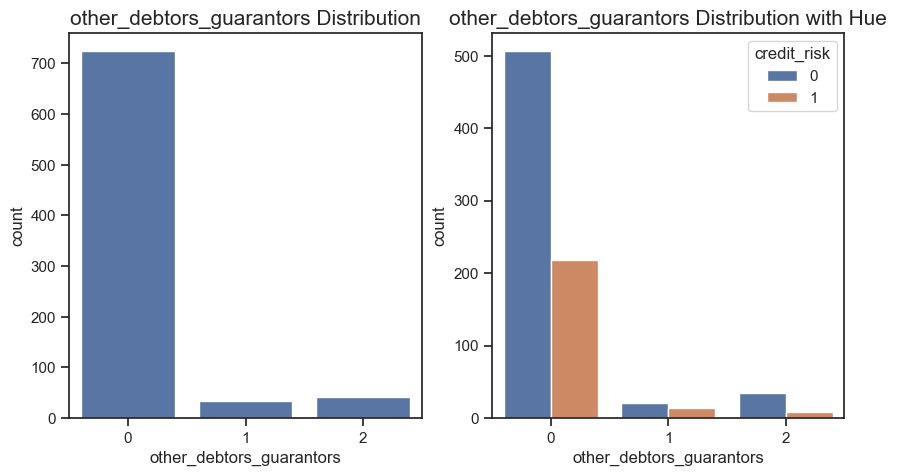

------------------------------------------------------------------------------------------------------------------------------------------------------


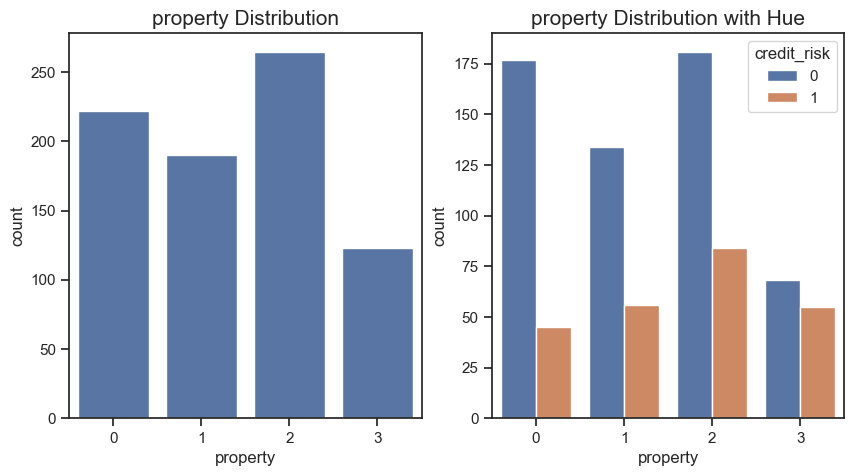

------------------------------------------------------------------------------------------------------------------------------------------------------


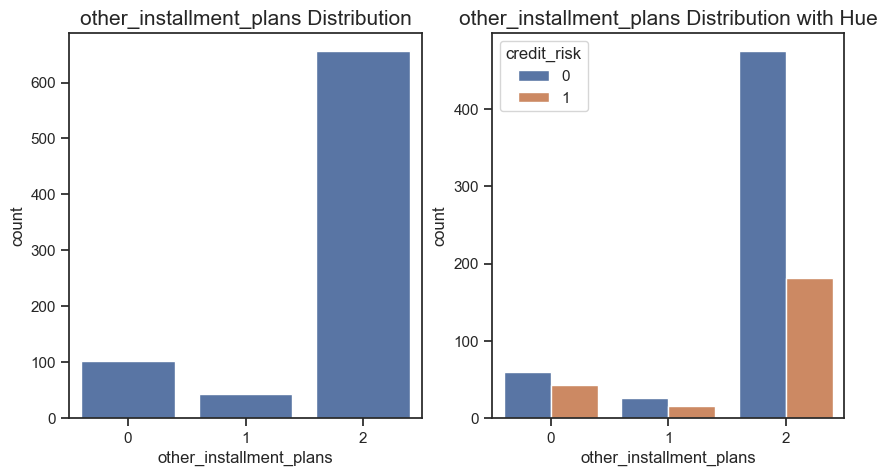

------------------------------------------------------------------------------------------------------------------------------------------------------


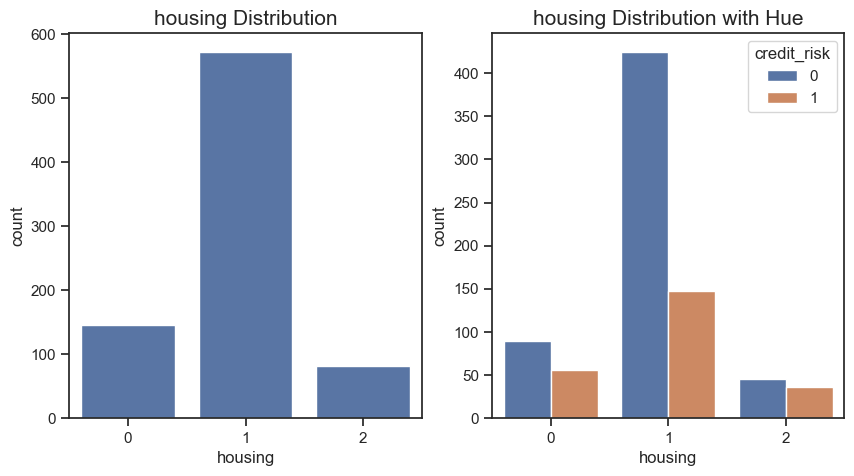

------------------------------------------------------------------------------------------------------------------------------------------------------


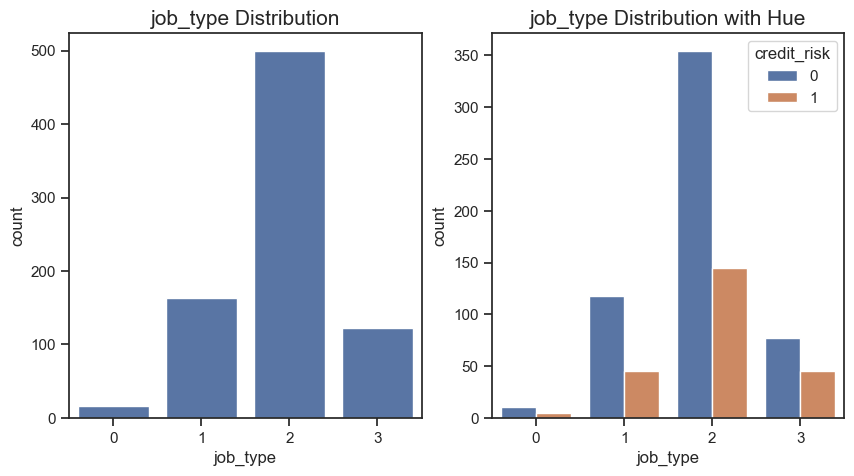

------------------------------------------------------------------------------------------------------------------------------------------------------


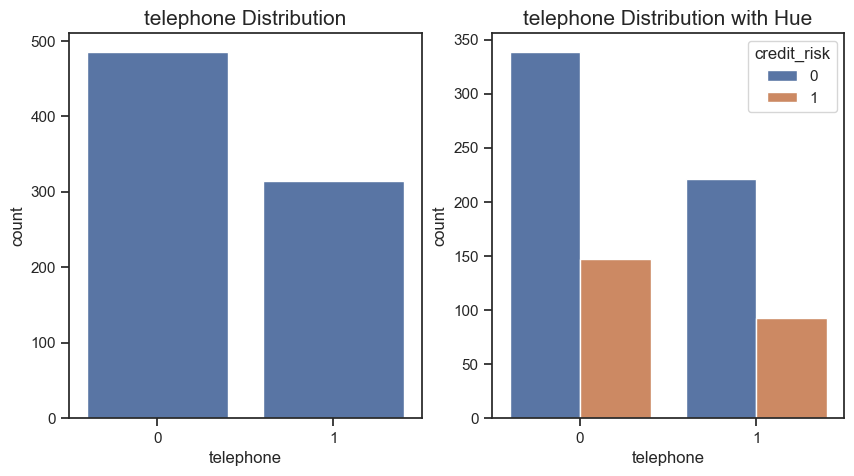

------------------------------------------------------------------------------------------------------------------------------------------------------


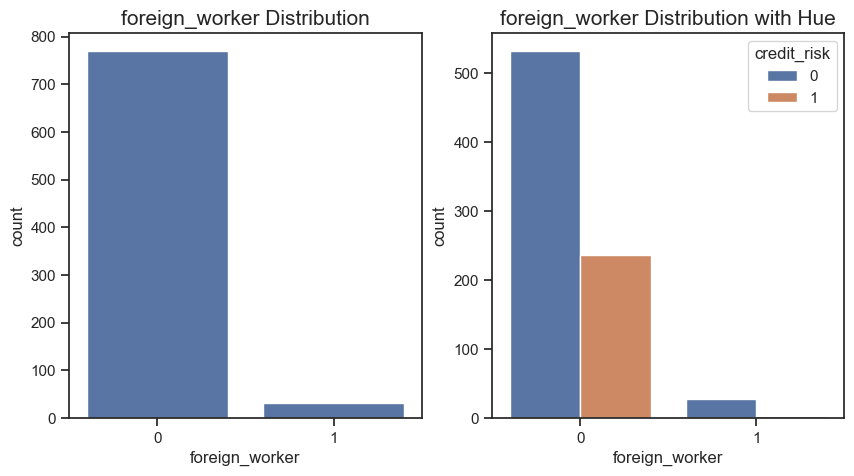

------------------------------------------------------------------------------------------------------------------------------------------------------


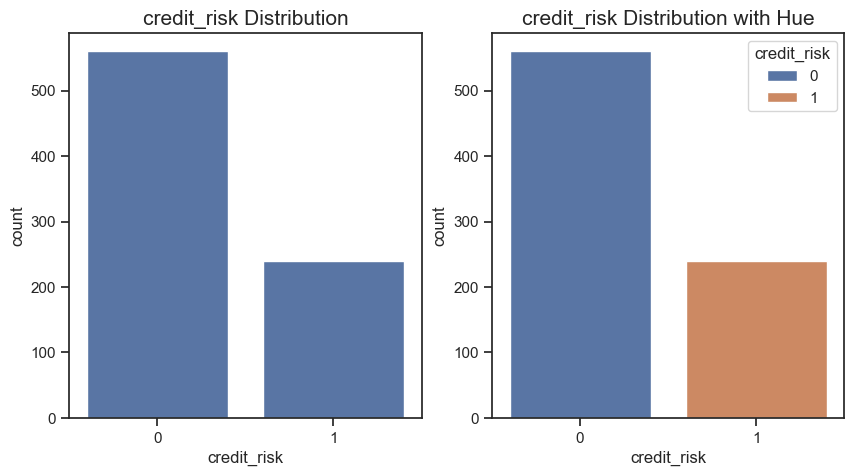

------------------------------------------------------------------------------------------------------------------------------------------------------


In [33]:
cols = ['checking_acct_status', 'credit_history', 'purpose', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', \
                  'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job_type', 'telephone', 'foreign_worker', 'credit_risk']
for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    sns.countplot(data=train_all_pd, x=col, ax=axes[0])
    axes[0].set_title(col + " Distribution", fontsize=15)
    sns.countplot(data=train_all_pd, x=col, hue='credit_risk', ax=axes[1])
    axes[1].set_title(col + " Distribution with Hue", fontsize=15)
    plt.show()
    print("-"*150)

<b>Observations:</b>
<ol>
    <li>With the target put into consideration, for some variables, the distribution of the categories is not the same, such as 'checking_acct_status', 'purpose' and 'employment_duration'. For some variables, the distribution of the categories is the same, such as 'credit_history' and 'other_installment_plans'. </li>
    <li>The chart of the 'property' column shows that each category has a comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn effectively.</li>
    <li>The bars belonging to class 0 are generally taller than the bars belonging to class 1.</li>
</ol>

### 4.7 Distribution of Numerical Variables

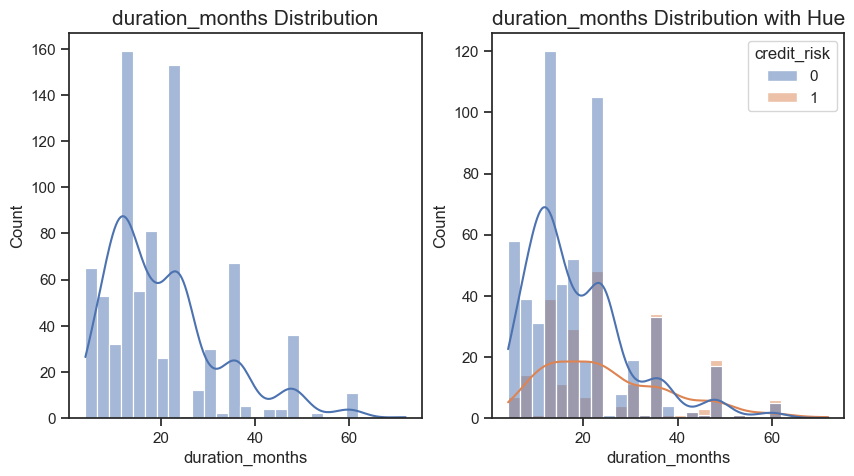

------------------------------------------------------------------------------------------------------------------------------------------------------


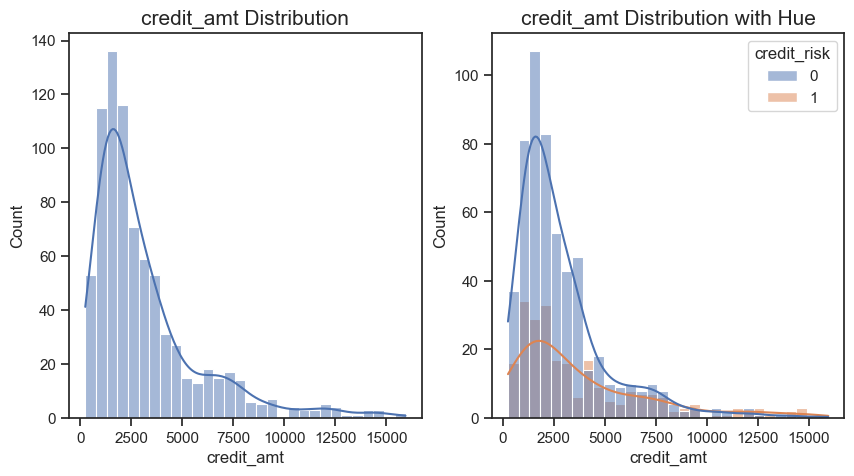

------------------------------------------------------------------------------------------------------------------------------------------------------


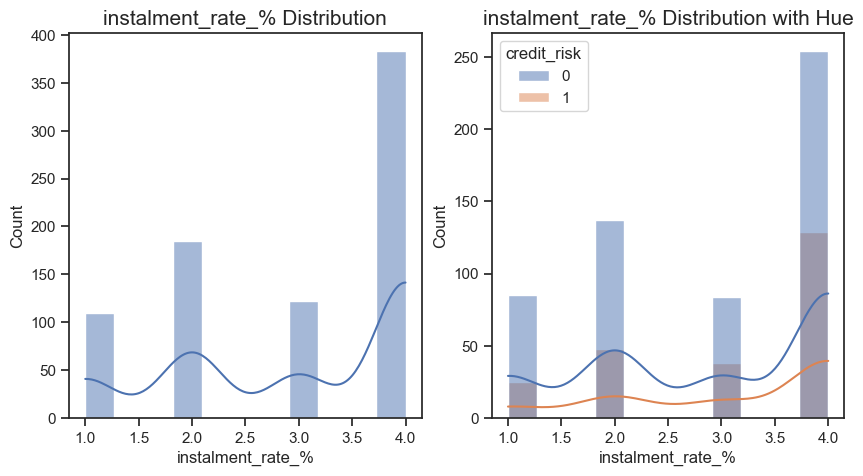

------------------------------------------------------------------------------------------------------------------------------------------------------


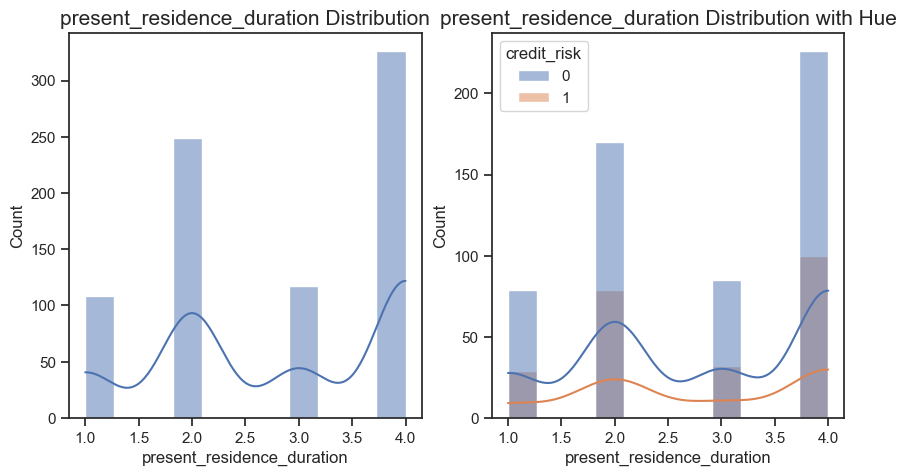

------------------------------------------------------------------------------------------------------------------------------------------------------


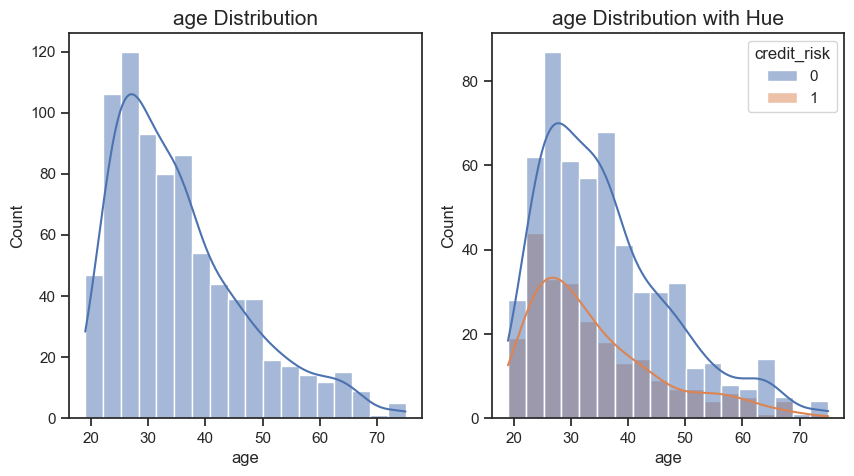

------------------------------------------------------------------------------------------------------------------------------------------------------


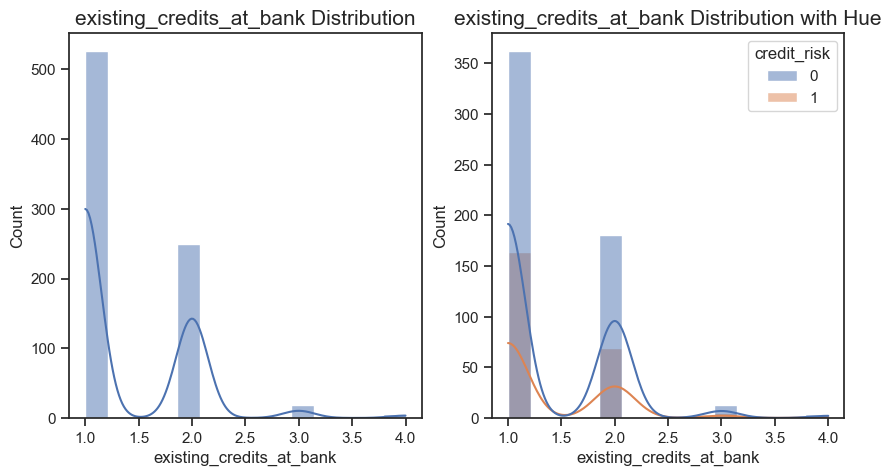

------------------------------------------------------------------------------------------------------------------------------------------------------


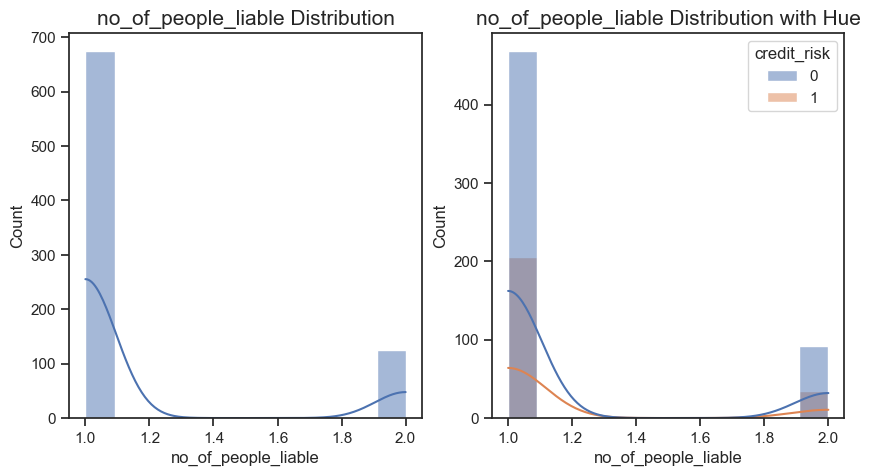

------------------------------------------------------------------------------------------------------------------------------------------------------


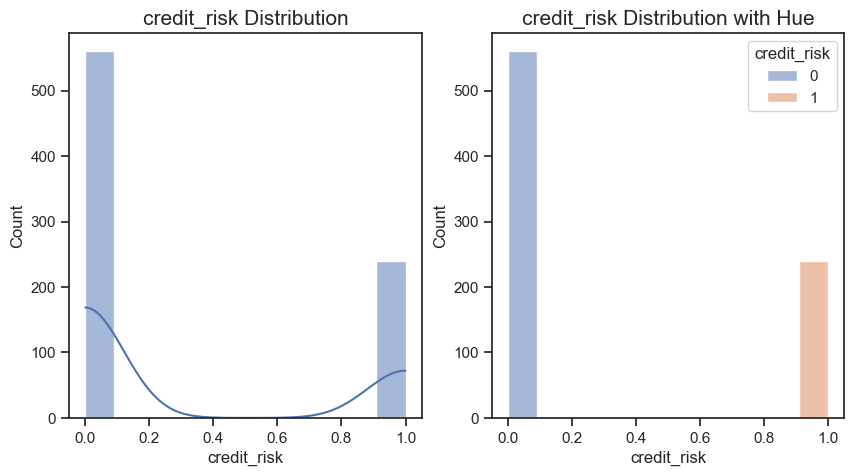

------------------------------------------------------------------------------------------------------------------------------------------------------


In [34]:
for col in numeric_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    sns.histplot(data=train_all_pd, x=col, ax=axes[0], kde=True)
    axes[0].set_title(col + " Distribution", fontsize=15)
    sns.histplot(data=train_all_pd, x=col, hue='credit_risk', ax=axes[1], kde=True)
    axes[1].set_title(col + " Distribution with Hue", fontsize=15)
    plt.show()
    print("-"*150)

<b>Observations: </b>
<ul>
    <li>The distribution of data for duration_months, credit_amt, age, existing_credits_at_bank and no_of_people_liable are right skewed.</li>
    <li>The distribution of data for instalment_rate_% and present_residence_duration are left skewed.</li>
</ul>
This will be confirmed after balancing the train dataset by calculating the skewness.

<hr/>

## 5. Balance the Imbalanced Dataset

In [35]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority', random_state=42)

In [36]:
train_pd = train.as_data_frame()

X_train = train_pd.drop(columns=['credit_risk'])
y_train = train_pd['credit_risk']

X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

train_balanced_pd = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_balanced_pd['credit_risk'] = y_train_resampled

train_balanced_h2o = h2o.H2OFrame(train_balanced_pd)

# Get the frequency table for 'credit_risk' in the balanced training set
credit_risk_counts_balanced = train_balanced_h2o["credit_risk"].table()

# Convert the H2OFrame to a pandas DataFrame
credit_risk_counts_balanced_df = credit_risk_counts_balanced.as_data_frame()

# Calculate the proportions in percentage
credit_risk_counts_balanced_df['Proportion'] = (credit_risk_counts_balanced_df['Count'] / credit_risk_counts_balanced_df['Count'].sum()) * 100

# Display the proportions
print("Proportions in the balanced training set:")
print(credit_risk_counts_balanced_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Proportions in the balanced training set:
   credit_risk  Count  Proportion
0            0    560   49.209139
1            1    578   50.790861


<hr/>

## 6. EDA after Balancing

### 6.1 Proportion of Classes

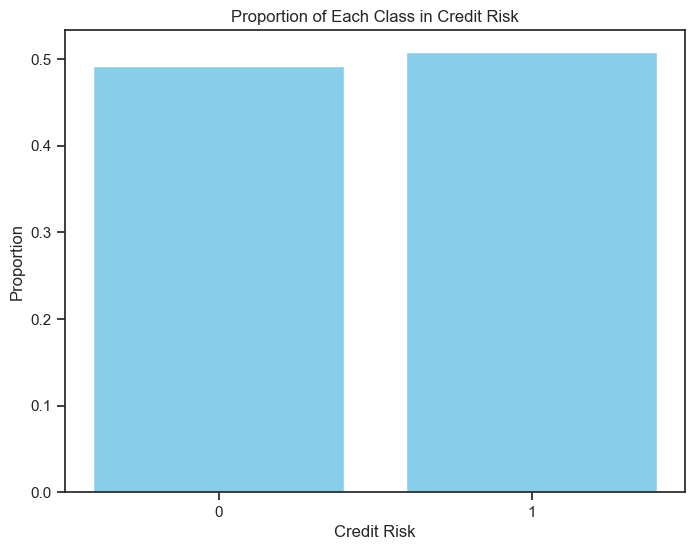

In [37]:
import matplotlib.pyplot as plt

# To Calculate the frequency of each class in the 'credit_risk' column
credit_risk_counts = train_balanced_h2o["credit_risk"].table()

# To Convert the H2O frame to a Pandas DataFrame
credit_risk_counts_pd = credit_risk_counts.as_data_frame()

# To Calculate the proportions
credit_risk_counts_pd['Proportion'] = credit_risk_counts_pd['Count'] / credit_risk_counts_pd['Count'].sum()
# Plot the proportions
plt.figure(figsize=(8, 6))
plt.bar(credit_risk_counts_pd['credit_risk'], credit_risk_counts_pd['Proportion'], color='skyblue')
plt.xlabel('Credit Risk')
plt.ylabel('Proportion')
plt.title('Proportion of Each Class in Credit Risk')
plt.xticks(ticks=credit_risk_counts_pd['credit_risk'], labels=credit_risk_counts_pd['credit_risk'])
plt.show()

<b>Observation: </b>The proportion for each class is approximately the same after balancing.

### 6.2 Correlation Matrix for Numeric Variables

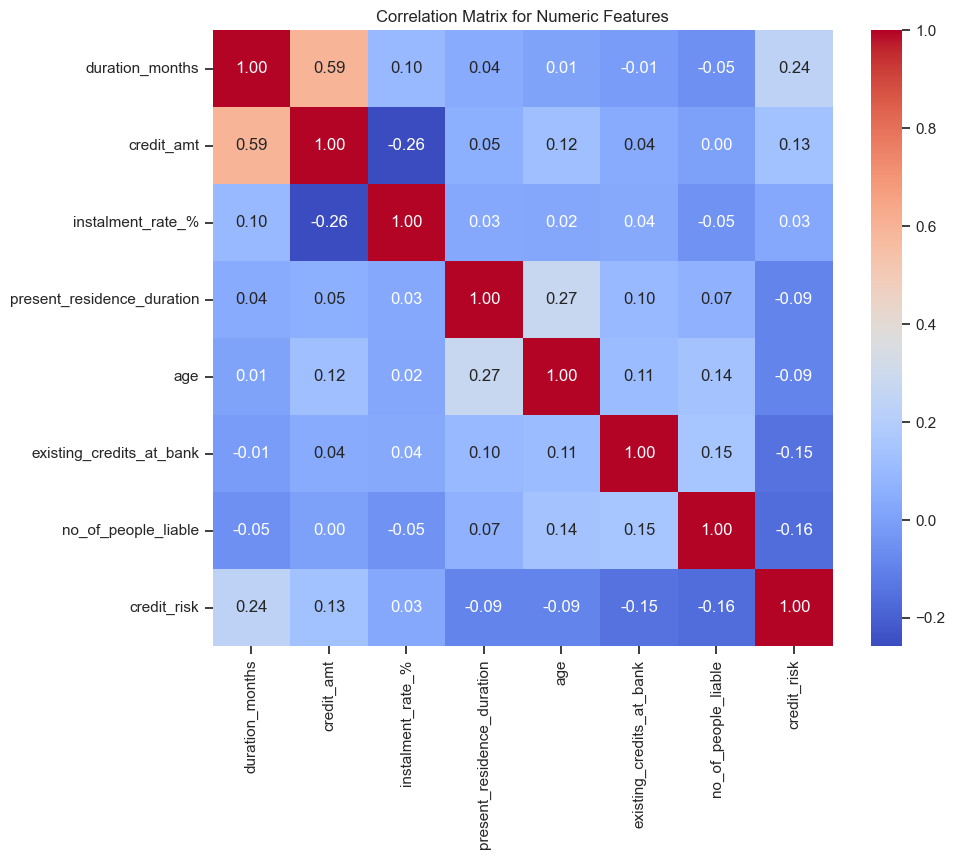

In [38]:
import seaborn as sns
# Assuming 'train' H2O dataframe is already created and contains the required columns
numeric_cols = ['duration_months', 'credit_amt', 'instalment_rate_%', 'present_residence_duration', 'age', 'existing_credits_at_bank', \
                'no_of_people_liable', 'credit_risk']

# Extract the specified columns
train_numeric = train_balanced_h2o[numeric_cols]

# Convert the H2O frame to a Pandas DataFrame
train_numeric_pd = train_numeric.as_data_frame()

# Compute the correlation matrix
corr_matrix = train_numeric_pd.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

<b>Observation: </b>We can observe that most of the variables have weak correlations (0.1 to 0.4 or -0.1 to -0.4) with one another while only a few variables have moderate (0.4 to 0.7 or -0.4 to -0.7) correlations with one another. Since there are no highly correlated variables here, there is none to be removed.

### 6.3 Variables with Noticeable Correlations with Each Other

In [41]:
necessary_cols = train_all_pd.columns
corr_unstacked = train_all_pd[necessary_cols].corr().unstack().abs()
ranked_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
ranked_corr = ranked_corr[ranked_corr != 1]

ranked_corr.head(10)

credit_amt                duration_months             0.594764
duration_months           credit_amt                  0.594764
credit_history            existing_credits_at_bank    0.472106
existing_credits_at_bank  credit_history              0.472106
credit_risk               checking_acct_status        0.460655
checking_acct_status      credit_risk                 0.460655
job_type                  telephone                   0.400633
telephone                 job_type                    0.400633
property                  credit_amt                  0.323873
credit_amt                property                    0.323873
dtype: float64

<b>Observation: </b> This is another way to identify whether there are any highly correlated variables, which are considered to be redundant. Since none of the correlation coefficients are in the range of (0.7 to 0.9), there are no highly correlated variables here.

### 6.4 Pairplots for Numeric Variables (Without Hue as credit_risk)

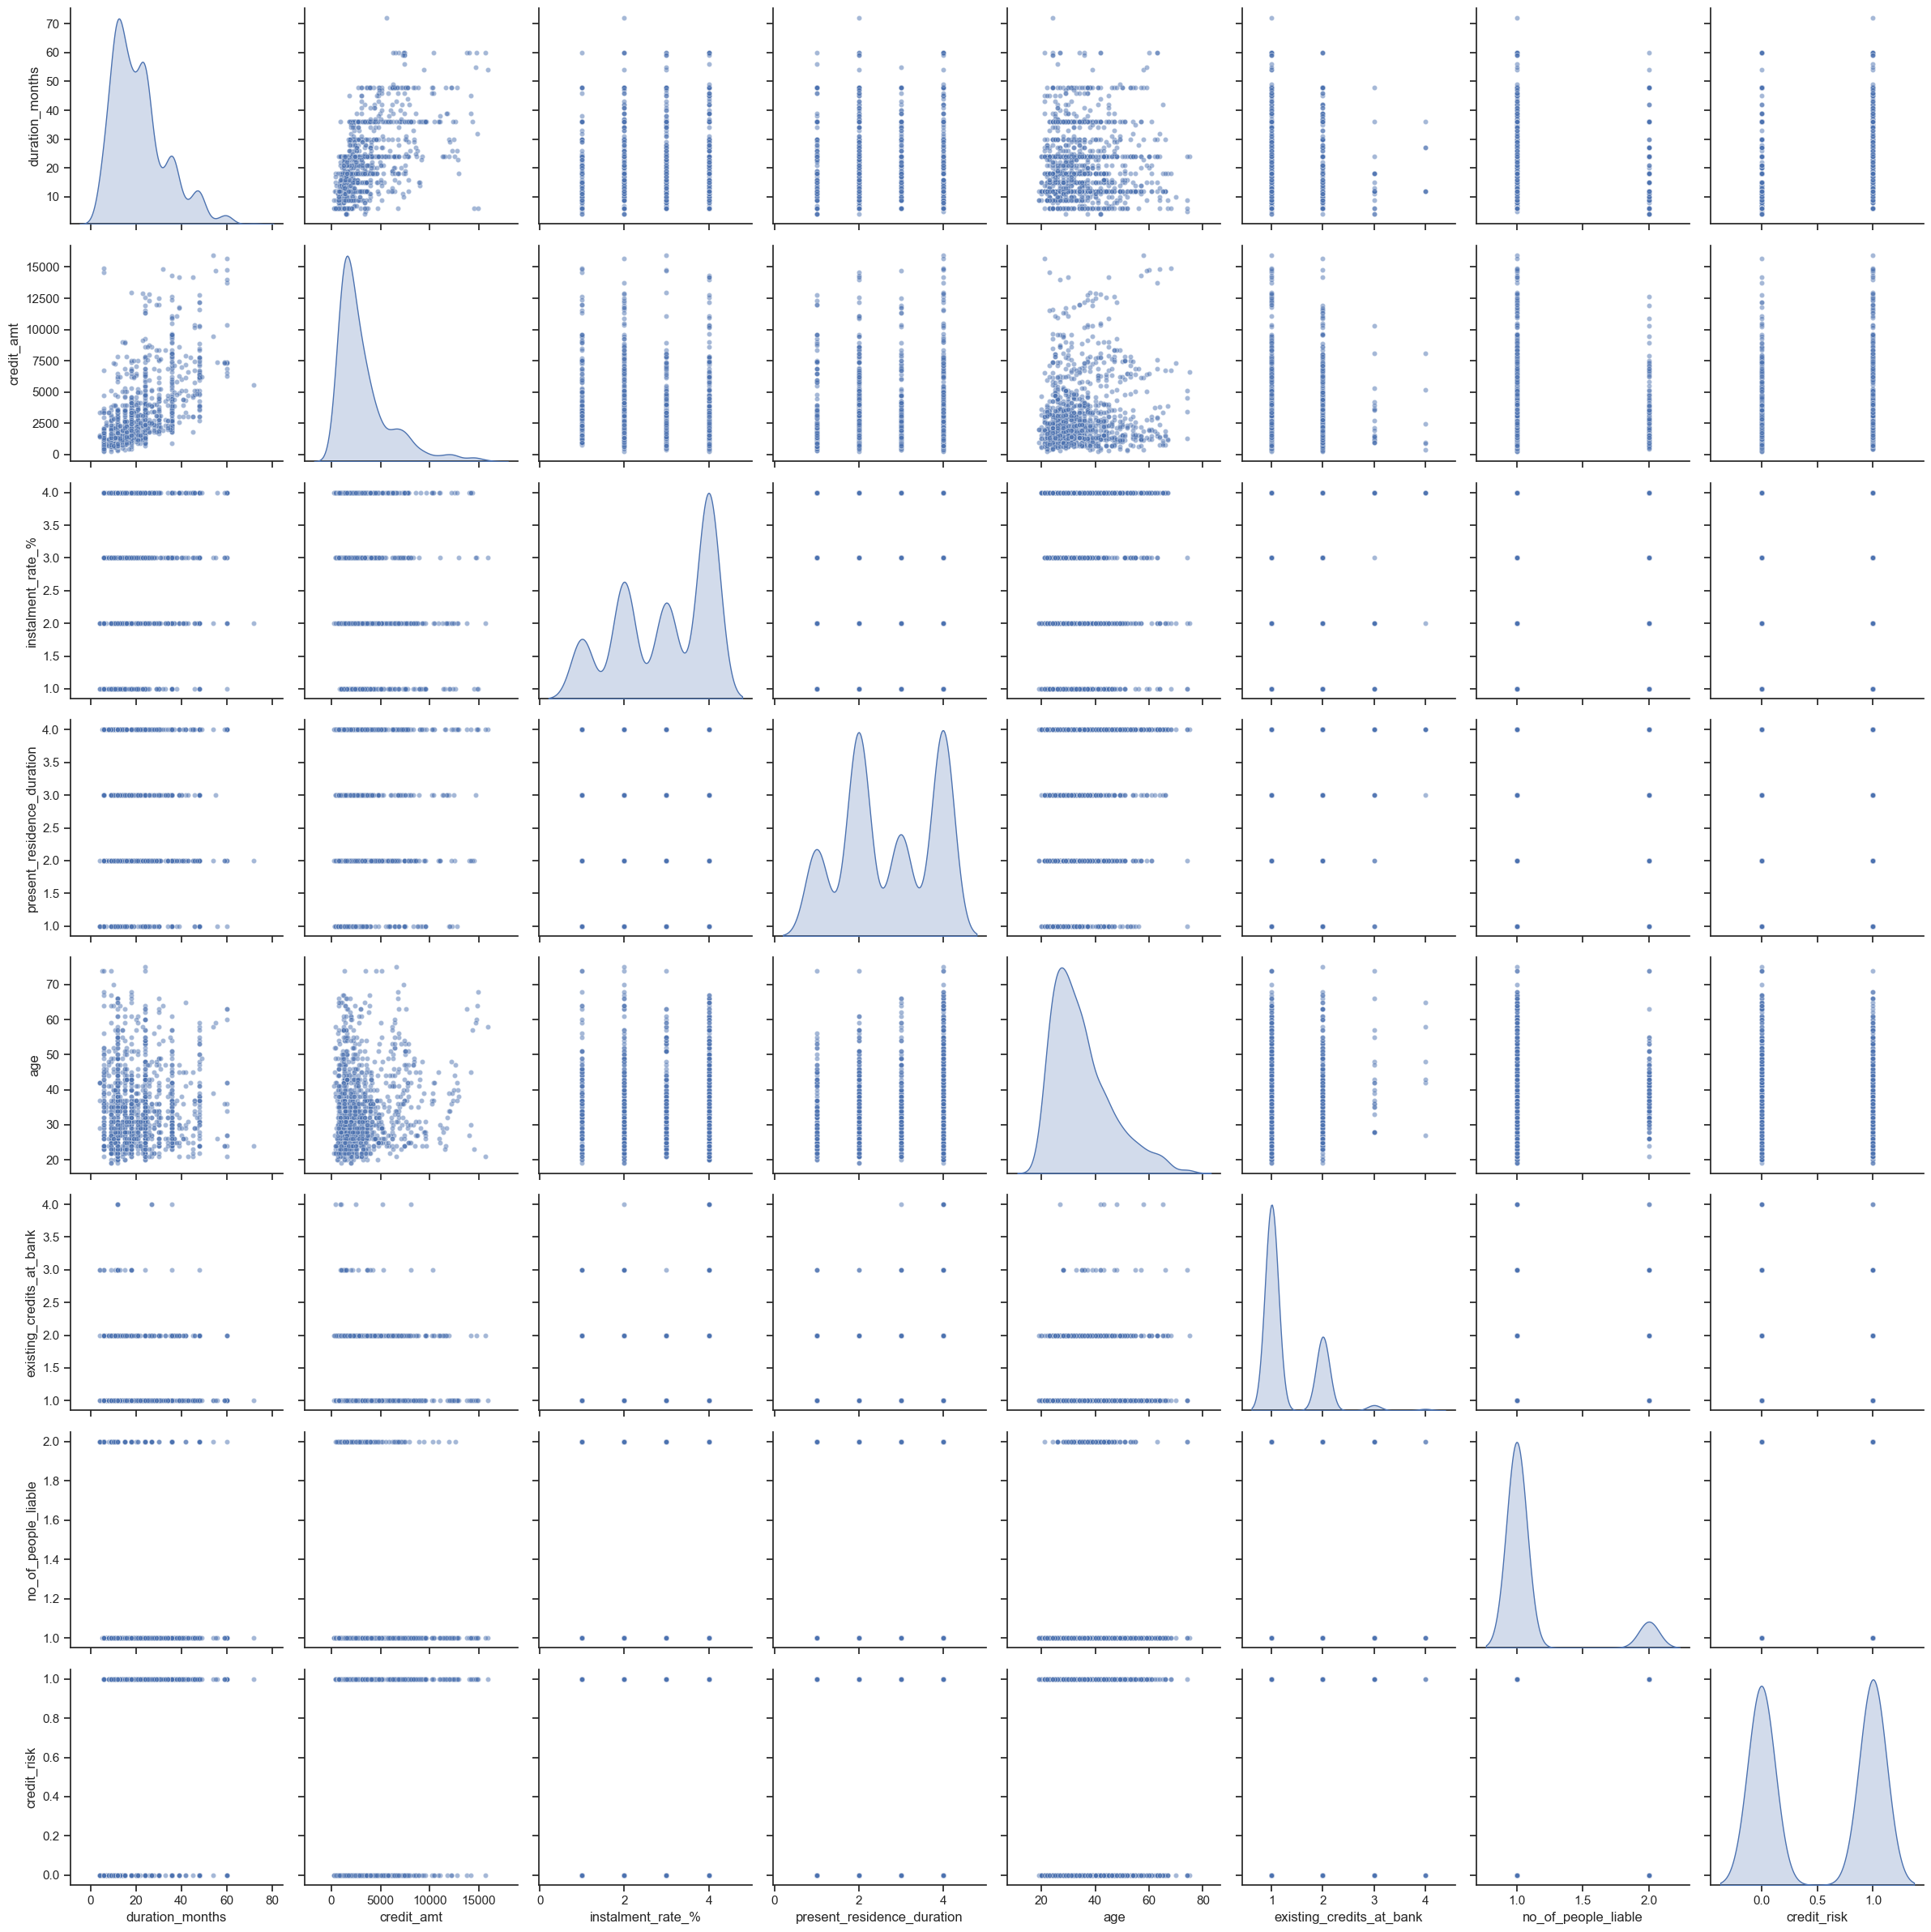

In [42]:
# Set style
sns.set(style="ticks")
# Generate pairplot with custom design and increased vertical spacing
sns.pairplot(train_all_pd[numeric_cols], diag_kind="kde", markers="o", plot_kws={"s": 20, "alpha": 0.5}, height=3)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

<b>Observations: </b>
<ol>
    <li>The distribution of data for almost all the variables here is not normally distributed. They are either left-skewed or right-skewed. However, referring to the bottom right plot, the equal height of the cones at 0 and 1 indicates that the two classes (0 and 1) in the credit_risk variable are approximately equally represented in the training dataset after balancing.</li>
    <li>Referring to the off-diagonal plots, most of the variables have very little correlation with each other, such as 'between present_residence_duration and no_of_people_liable' and 'between existing_credits_at_bank and present_residence_duration'. </li>
    <li>Only a few variables have some correlation with each other, such as 'between duration_months and credit_amt'</li>
</ol>

### 6.5 Pairplots for Numeric Variables (With Hue as credit_risk)

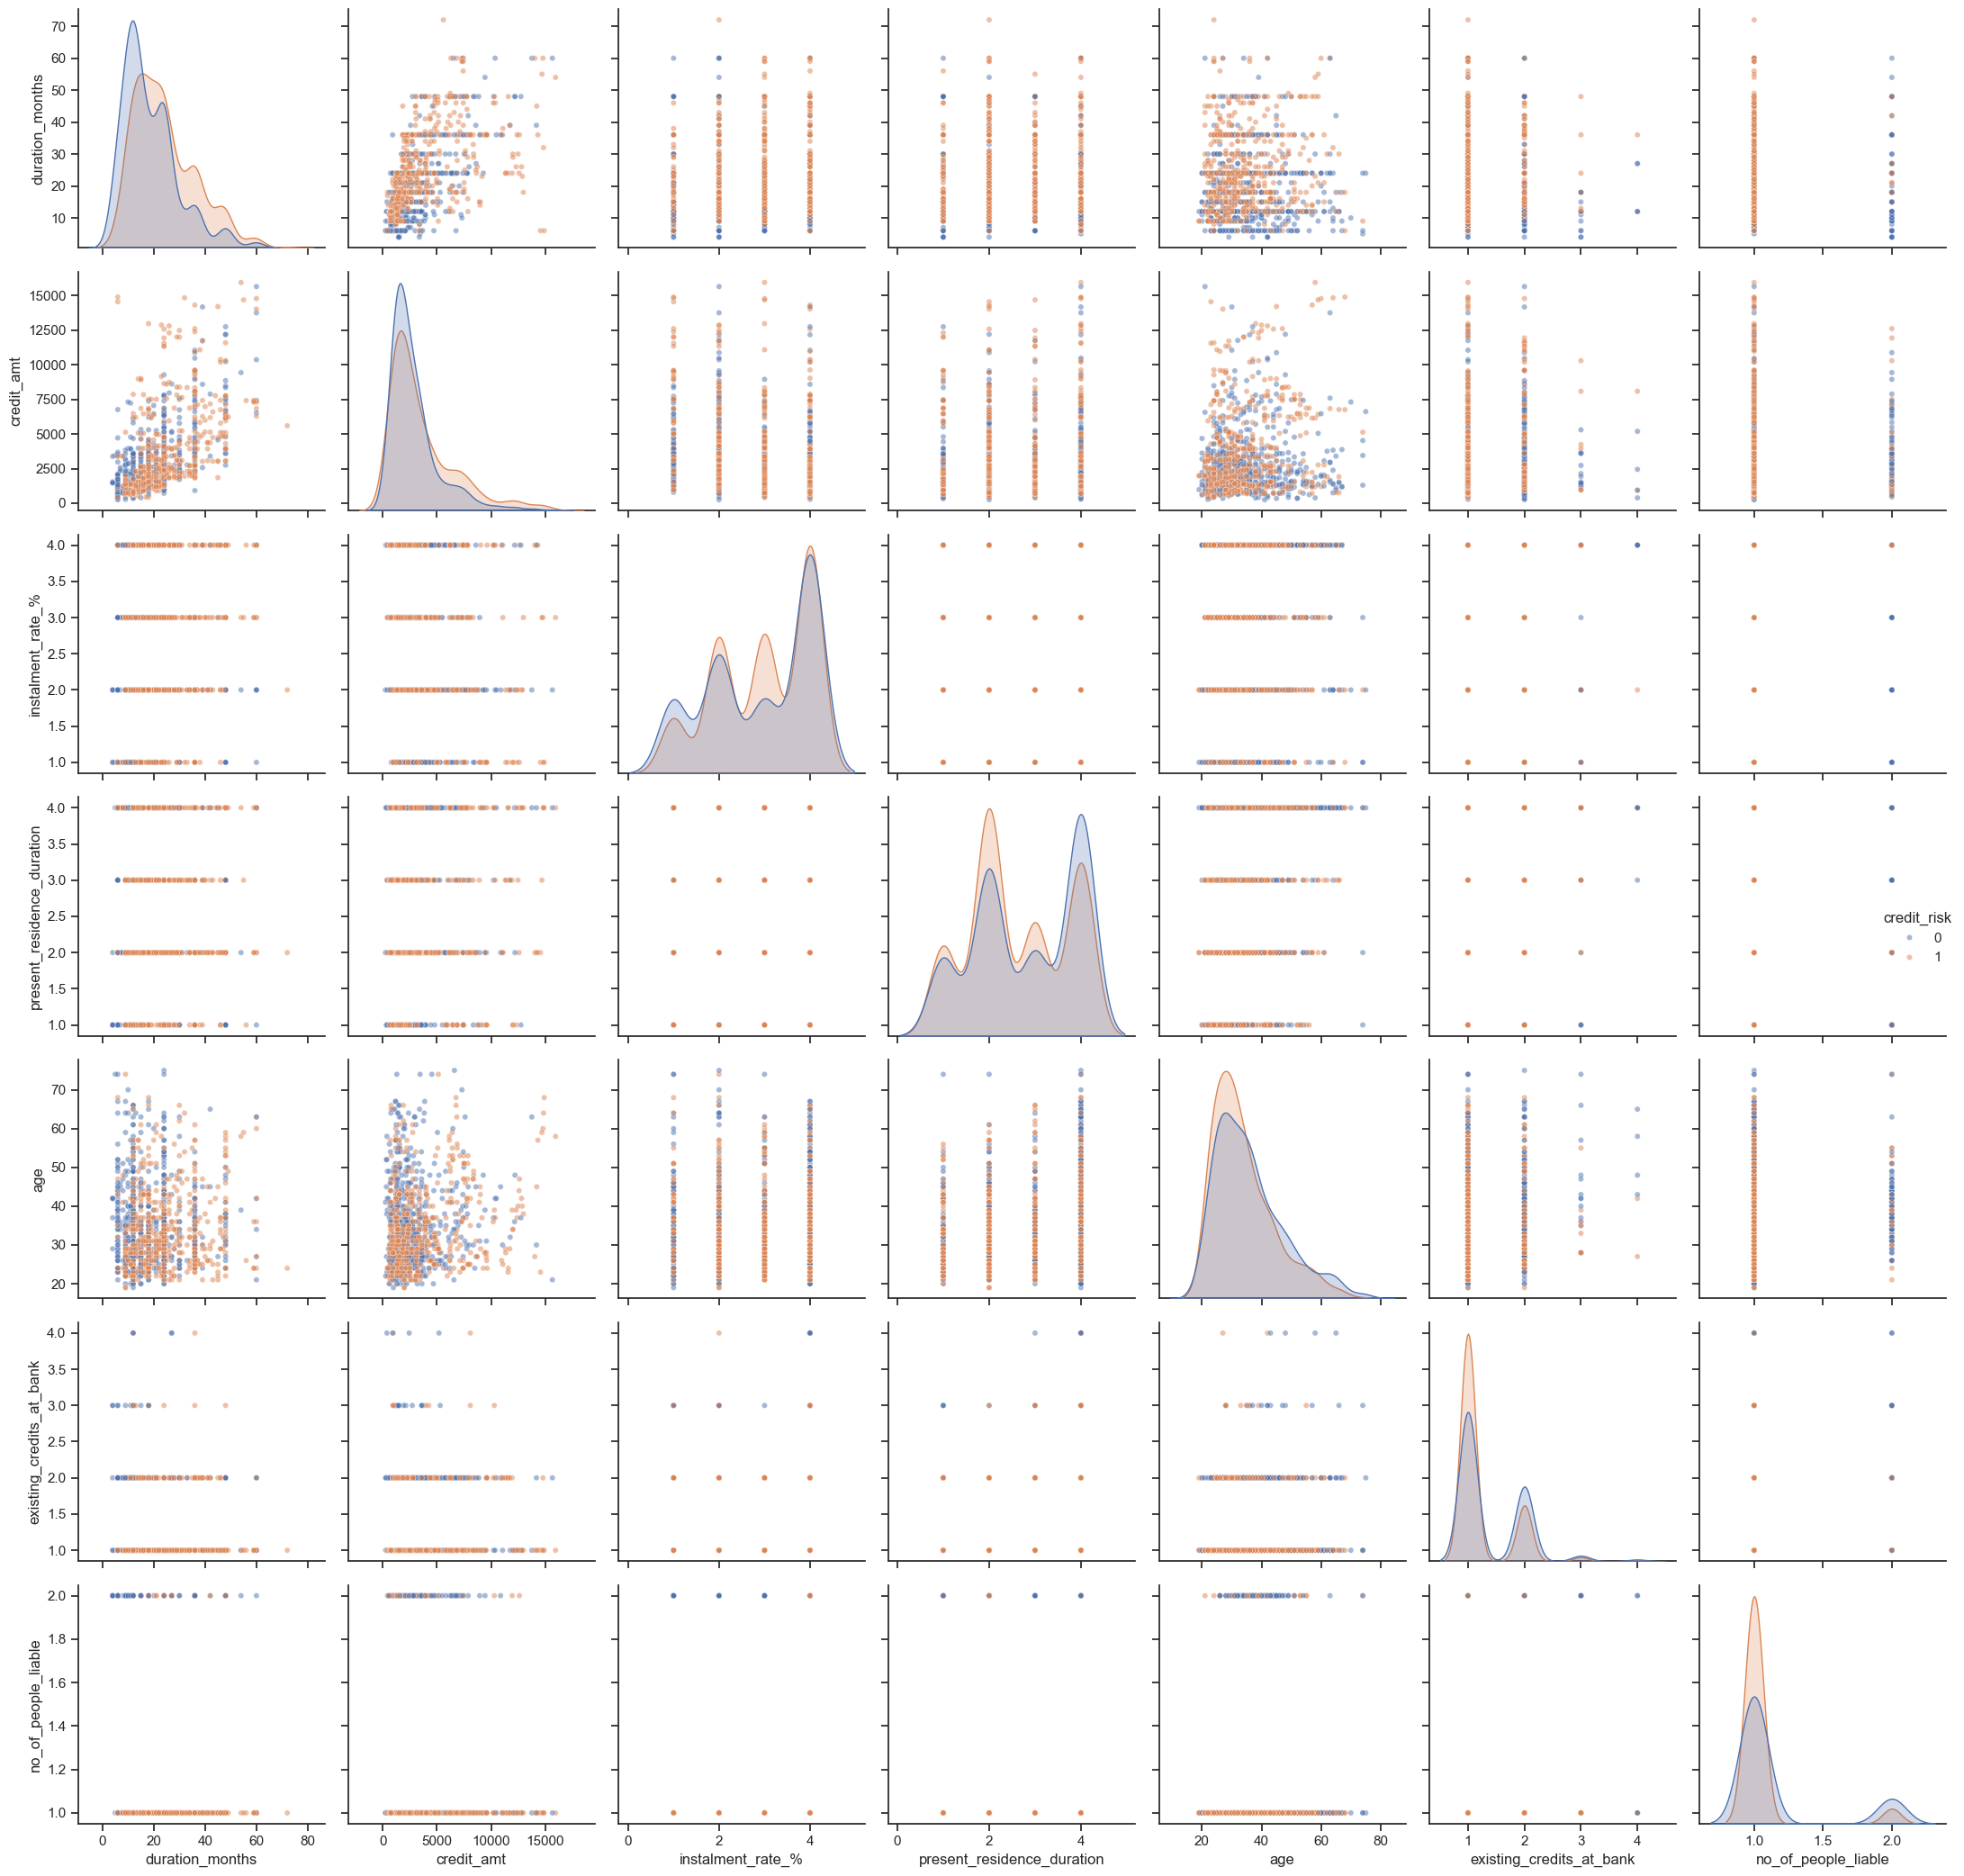

In [43]:
# Set style
sns.set(style="ticks")
# Generate pairplot with custom design, hue based on 'credit_risk', and increased vertical spacing
sns.pairplot(train_all_pd[numeric_cols], diag_kind="kde", markers="o", plot_kws={"s": 20, "alpha": 0.5}, height=3, aspect=1, hue='credit_risk')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

<b>Observations: </b>
<ol>
    <li>The density estimates belonging to class 1 have increased in size and height and most of their distribution has become quite similar to the one belonging to class 0.</li>
    <li>As for the scatter plots, they appear similar to the ones plotted before balancing in terms of pattern & correlation. However, it is obvious that the number of records belonging to class 1 has increased significantly because of the increased number of orange points.</li>
</ol>

### 6.6 Distribution of Categorical Variables

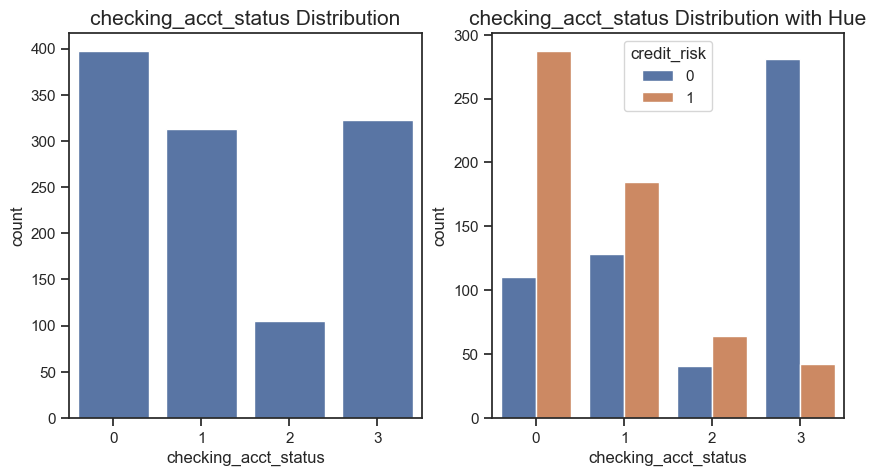

------------------------------------------------------------------------------------------------------------------------------------------------------


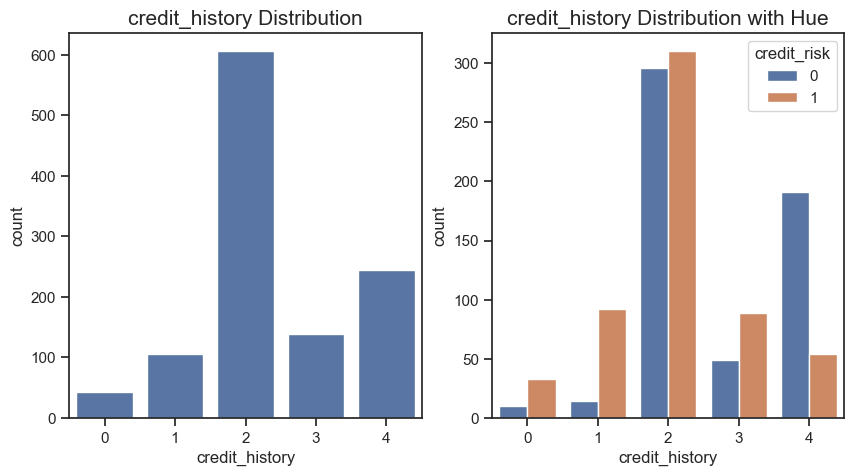

------------------------------------------------------------------------------------------------------------------------------------------------------


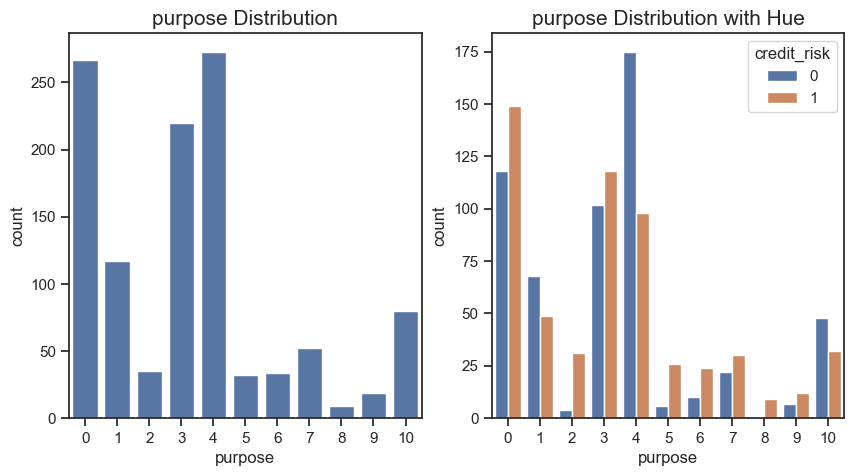

------------------------------------------------------------------------------------------------------------------------------------------------------


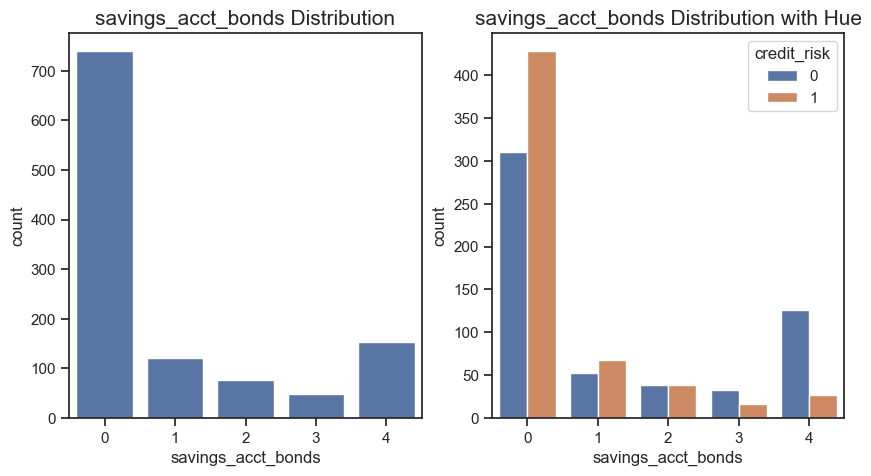

------------------------------------------------------------------------------------------------------------------------------------------------------


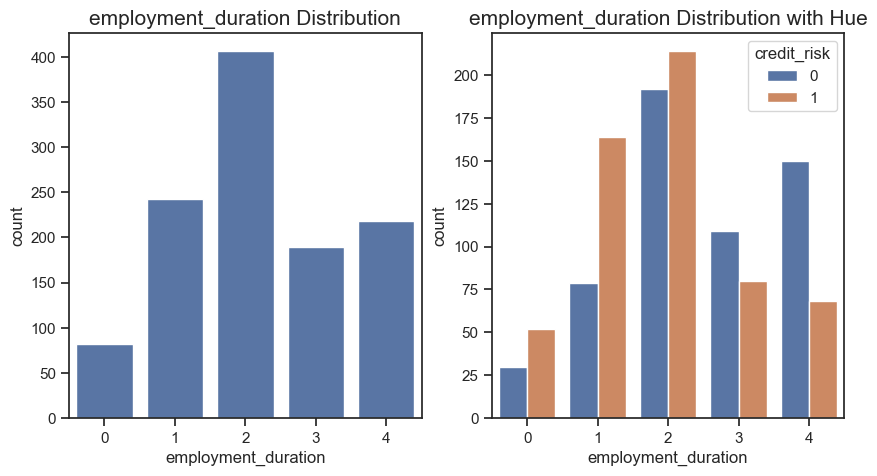

------------------------------------------------------------------------------------------------------------------------------------------------------


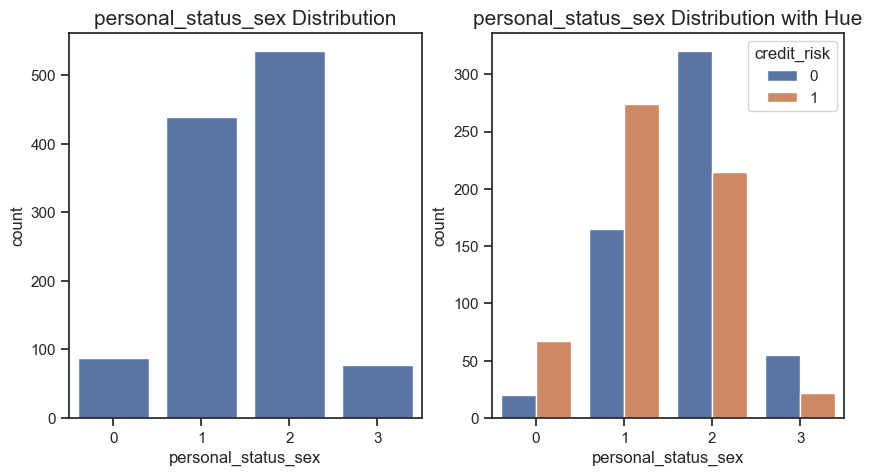

------------------------------------------------------------------------------------------------------------------------------------------------------


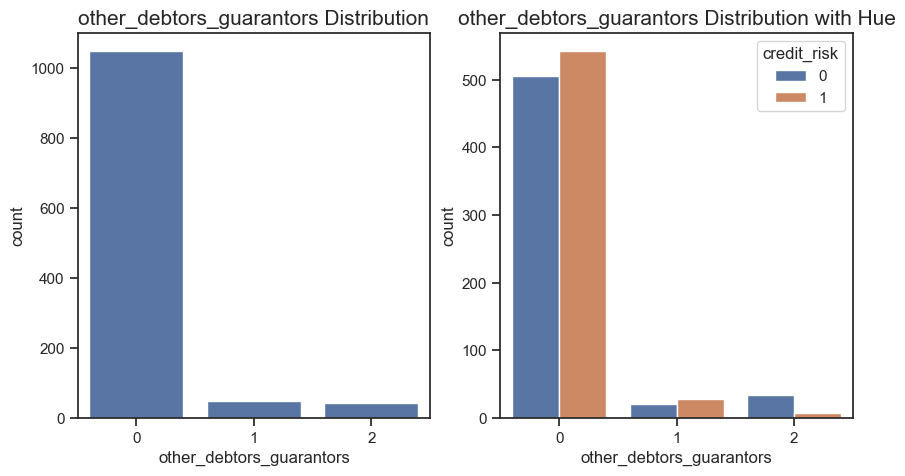

------------------------------------------------------------------------------------------------------------------------------------------------------


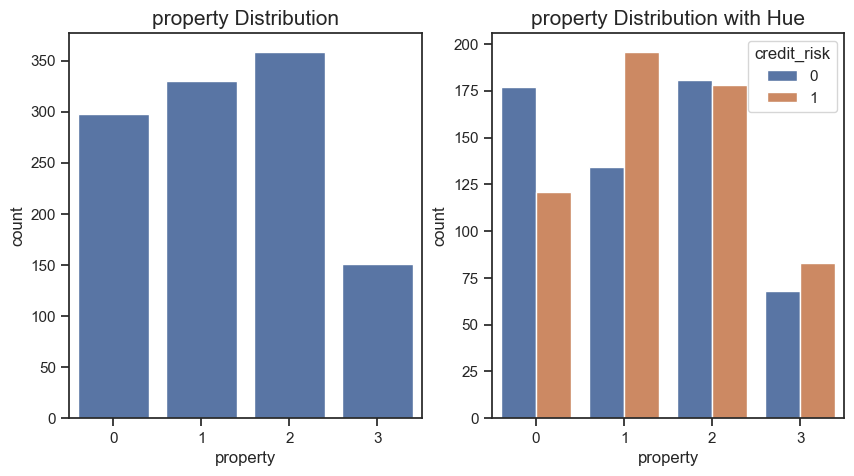

------------------------------------------------------------------------------------------------------------------------------------------------------


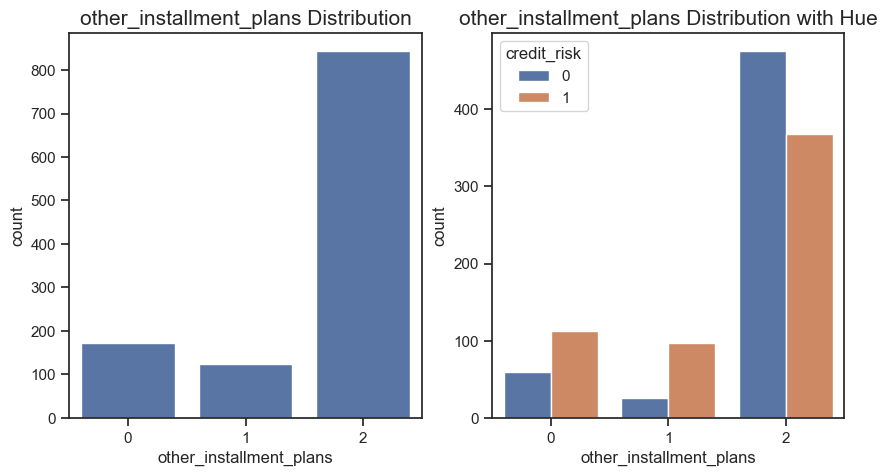

------------------------------------------------------------------------------------------------------------------------------------------------------


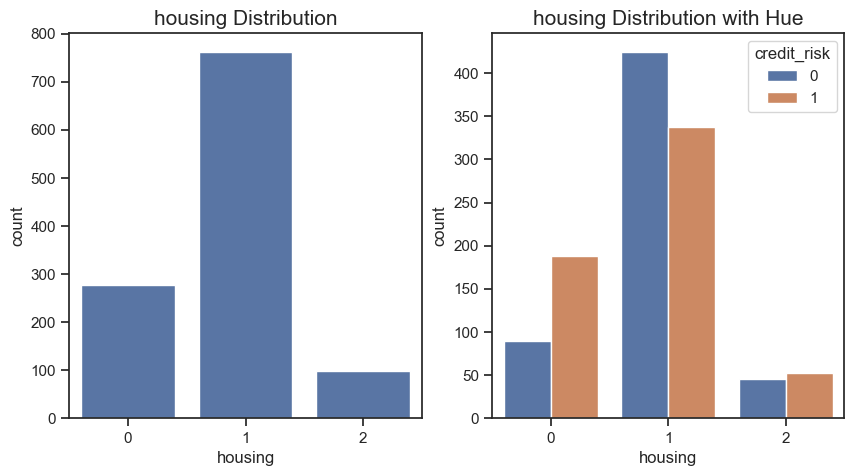

------------------------------------------------------------------------------------------------------------------------------------------------------


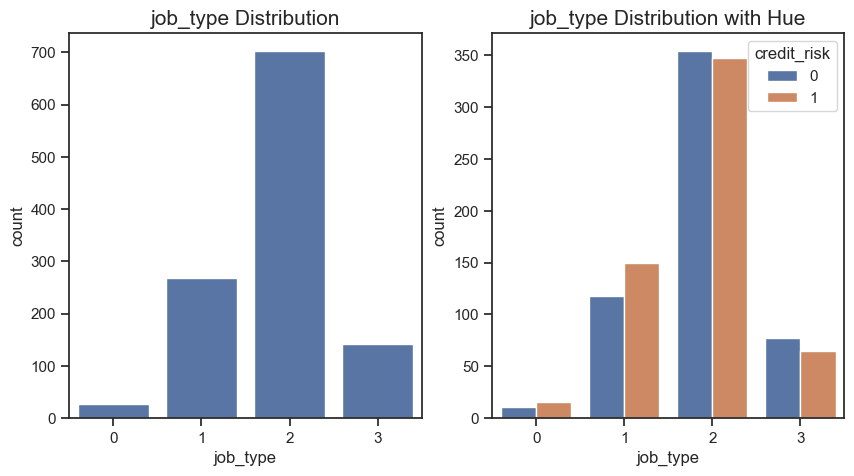

------------------------------------------------------------------------------------------------------------------------------------------------------


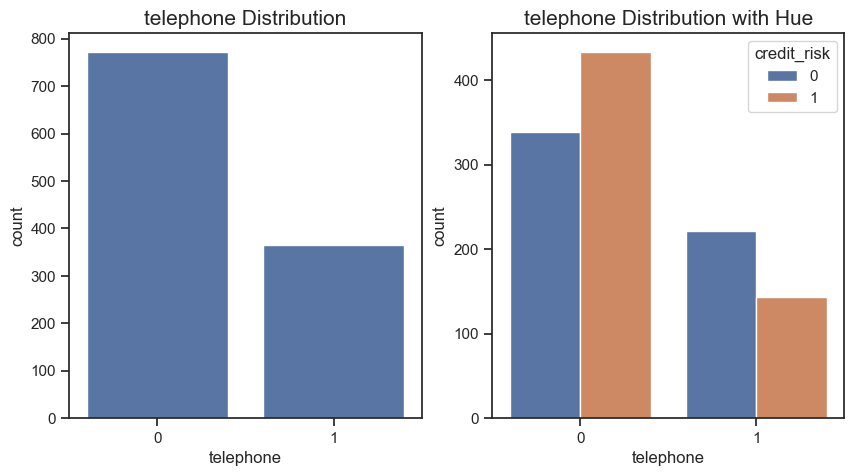

------------------------------------------------------------------------------------------------------------------------------------------------------


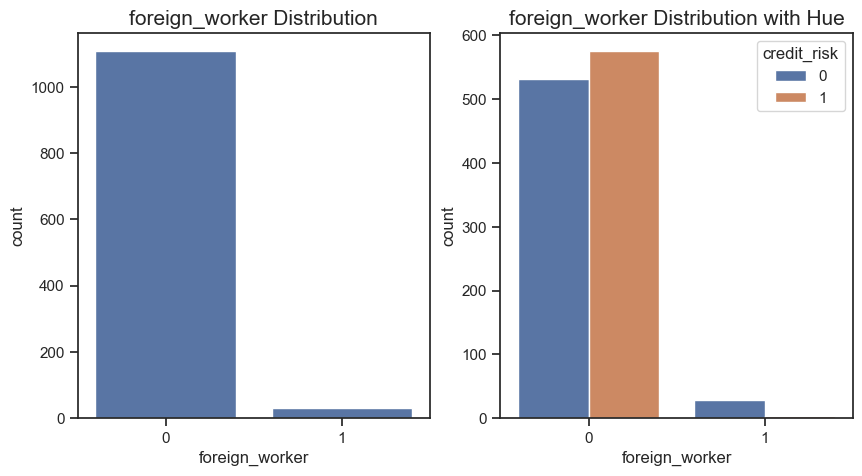

------------------------------------------------------------------------------------------------------------------------------------------------------


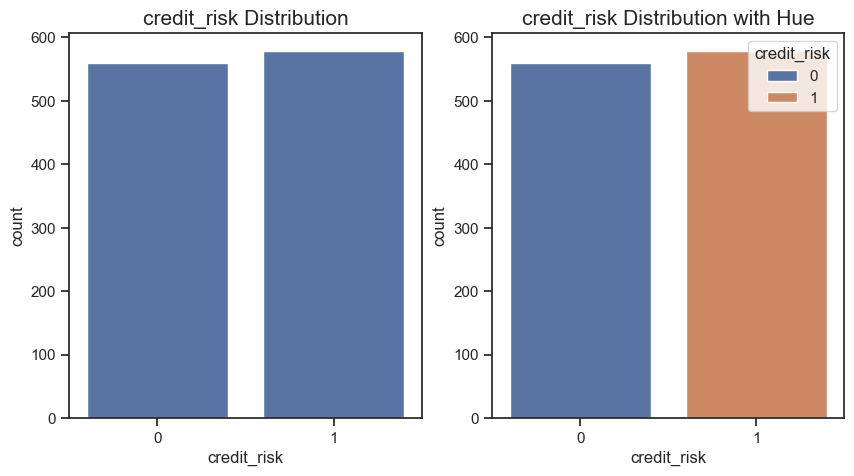

------------------------------------------------------------------------------------------------------------------------------------------------------


In [44]:
cols = ['checking_acct_status', 'credit_history', 'purpose', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', \
                  'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job_type', 'telephone', 'foreign_worker', 'credit_risk']
for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    sns.countplot(data=train_all_pd, x=col, ax=axes[0])
    axes[0].set_title(col + " Distribution", fontsize=15)
    sns.countplot(data=train_all_pd, x=col, hue='credit_risk', ax=axes[1])
    axes[1].set_title(col + " Distribution with Hue", fontsize=15)
    plt.show()
    print("-"*150)

<b>Observations:</b>
<ol>
    <li>With the target put into consideration, for all variables, the distribution of the categories is not the same, such as 'checking_acct_status', 'purpose' and 'employment_duration'. </li>
    <li>The chart of the 'property' column shows that each category has a comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn effectively.</li>
</ol>

### 6.7 Distribution of Numerical Variables

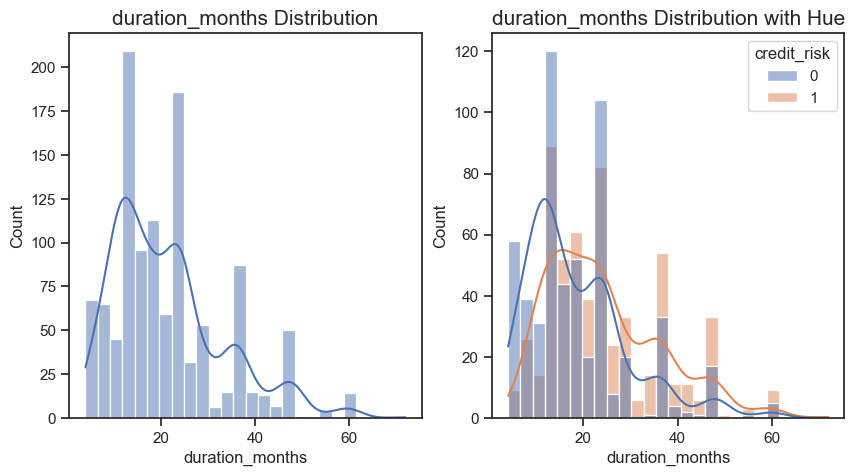

------------------------------------------------------------------------------------------------------------------------------------------------------


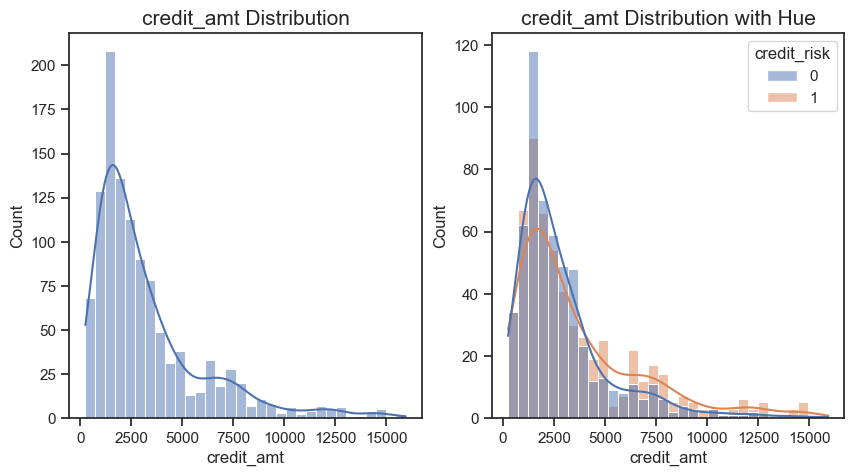

------------------------------------------------------------------------------------------------------------------------------------------------------


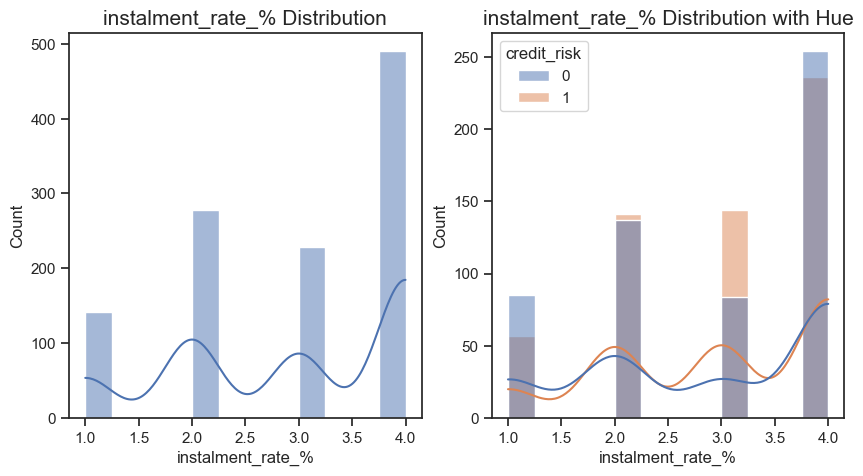

------------------------------------------------------------------------------------------------------------------------------------------------------


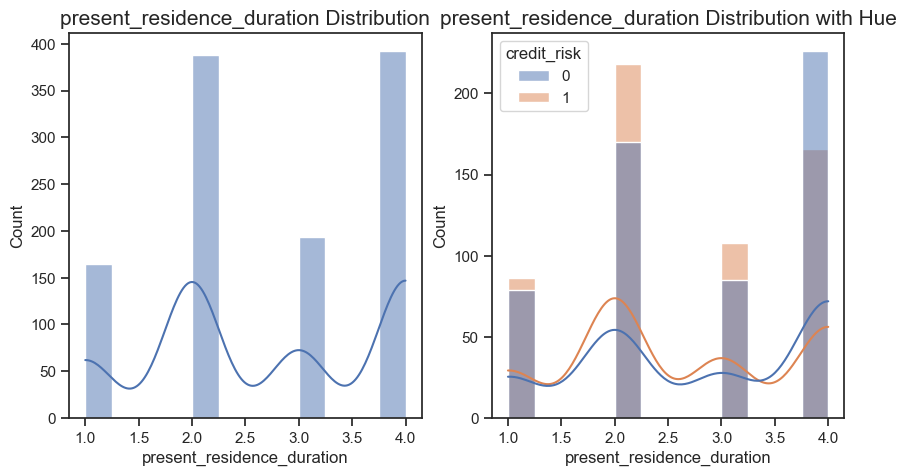

------------------------------------------------------------------------------------------------------------------------------------------------------


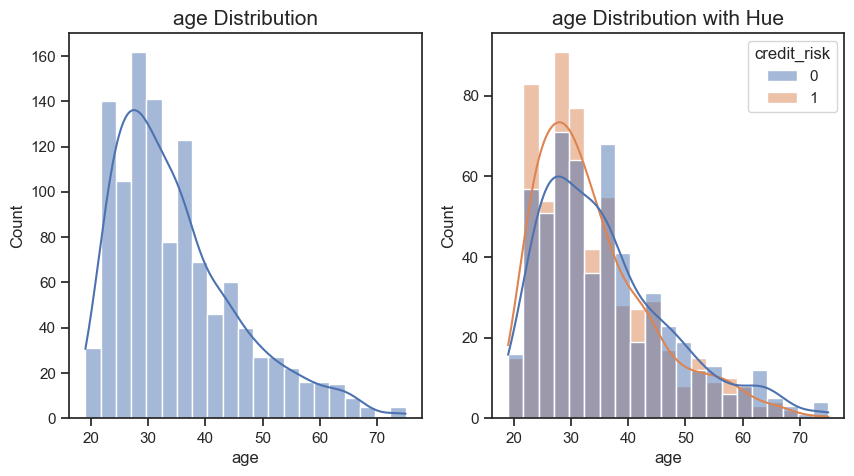

------------------------------------------------------------------------------------------------------------------------------------------------------


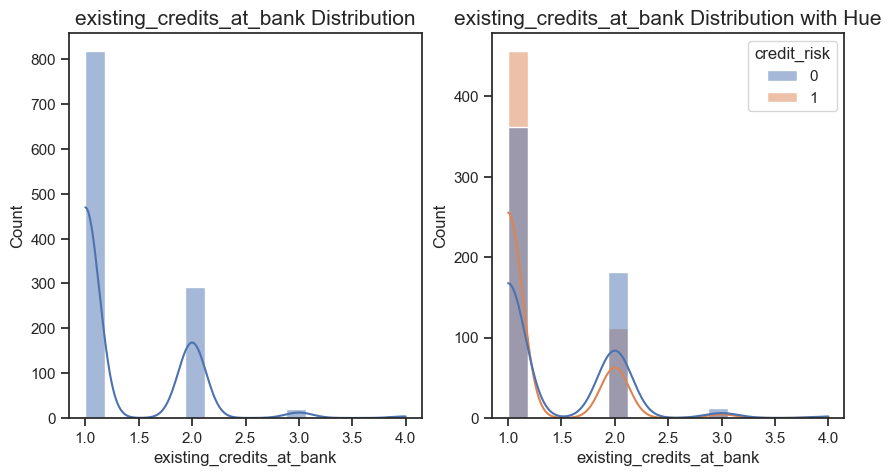

------------------------------------------------------------------------------------------------------------------------------------------------------


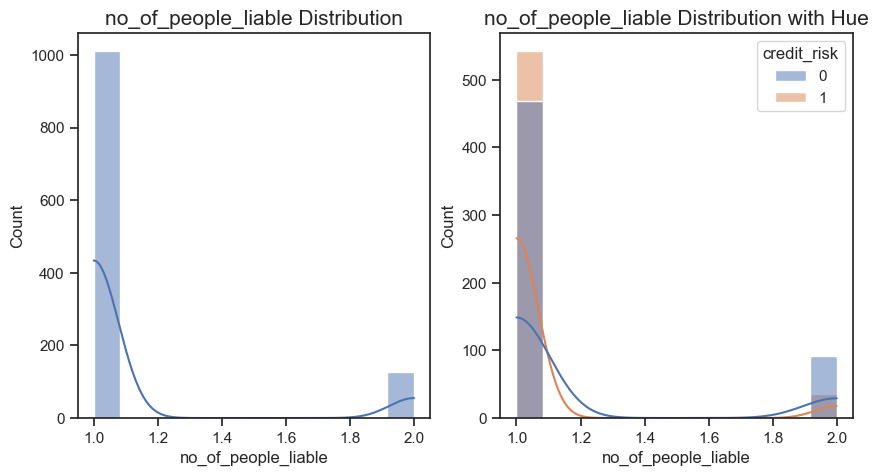

------------------------------------------------------------------------------------------------------------------------------------------------------


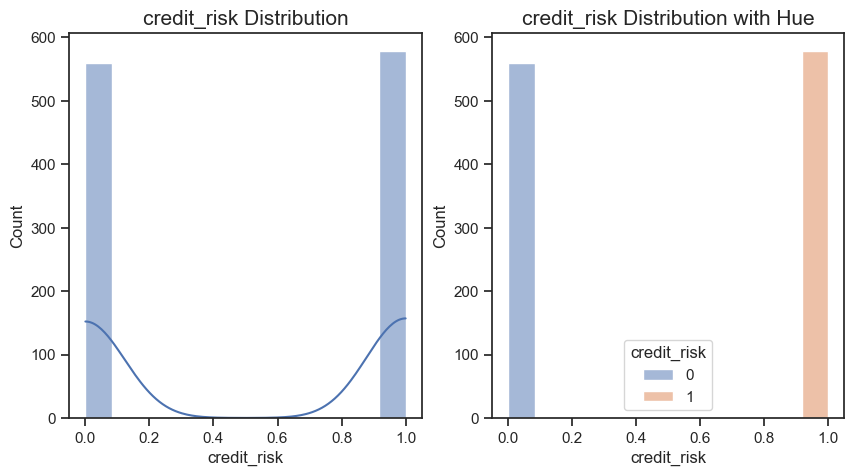

------------------------------------------------------------------------------------------------------------------------------------------------------


In [45]:
for col in numeric_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    sns.histplot(data=train_all_pd, x=col, ax=axes[0], kde=True)
    axes[0].set_title(col + " Distribution", fontsize=15)
    sns.histplot(data=train_all_pd, x=col, hue='credit_risk', ax=axes[1], kde=True)
    axes[1].set_title(col + " Distribution with Hue", fontsize=15)
    plt.show()
    print("-"*150)

<b>Observations: </b>
<ul>
<li>The distribution of data for duration_months, credit_amt, age, existing_credits_at_bank and no_of_people_liable are right skewed.</li>
<li>The distribution of data for instalment_rate_% and present_residence_duration are left skewed.</li>
</ul>
The code below calculates the skewness for each of the numerical columns.

In [46]:
numeric_cols = ['duration_months', 'credit_amt', 'instalment_rate_%', 'present_residence_duration', 'age', 'existing_credits_at_bank', \
                'no_of_people_liable']
def calculate_skewness(df, column_name):
    skewness = df[column_name].skew()
    if skewness < 0:
        desc = 'Negatively-skewed'
    elif skewness > 0:
        desc = 'Positively-skewed'
    else:
        desc = 'Symmetric'
    return skewness, desc

for col in numeric_cols:
    print(col, ":", calculate_skewness(train_all_pd, col))

duration_months : (1.0495667850984092, 'Positively-skewed')
credit_amt : (1.856646524666601, 'Positively-skewed')
instalment_rate_% : (-0.46652893464468465, 'Negatively-skewed')
present_residence_duration : (-0.09020746634613531, 'Negatively-skewed')
age : (1.091281993450699, 'Positively-skewed')
existing_credits_at_bank : (1.6984171324820716, 'Positively-skewed')
no_of_people_liable : (2.4562691033896846, 'Positively-skewed')


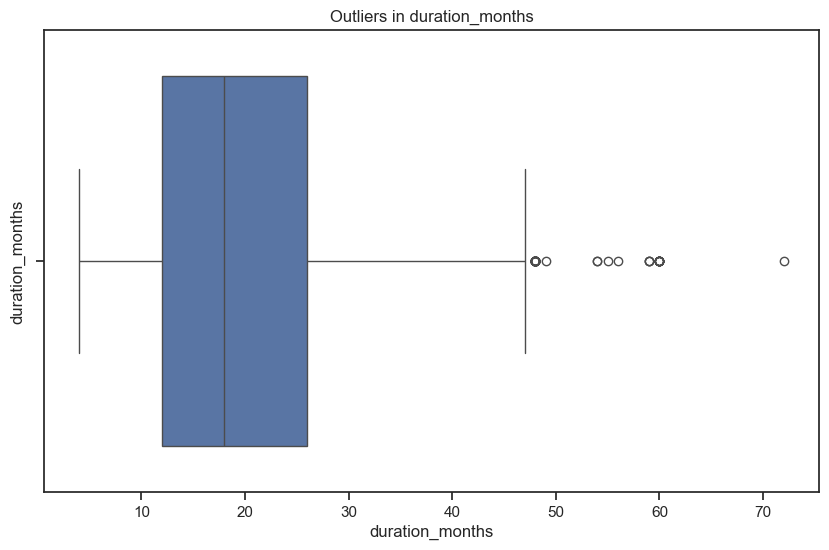

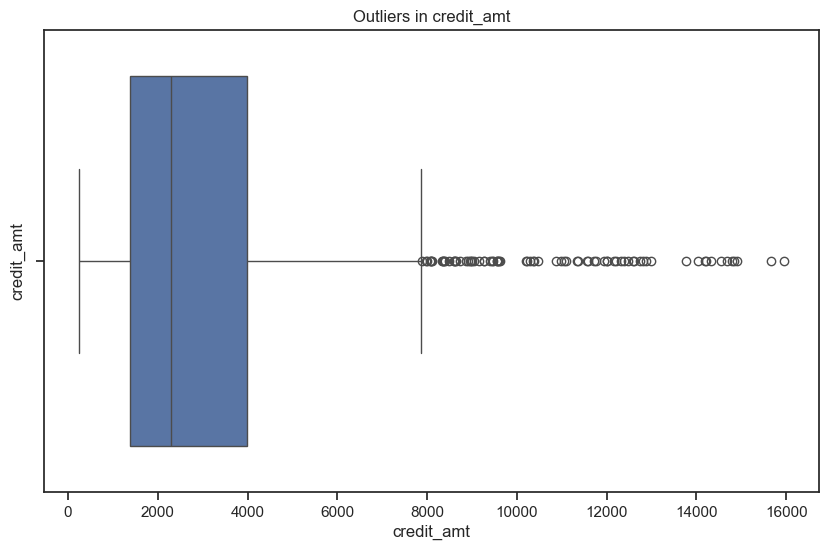

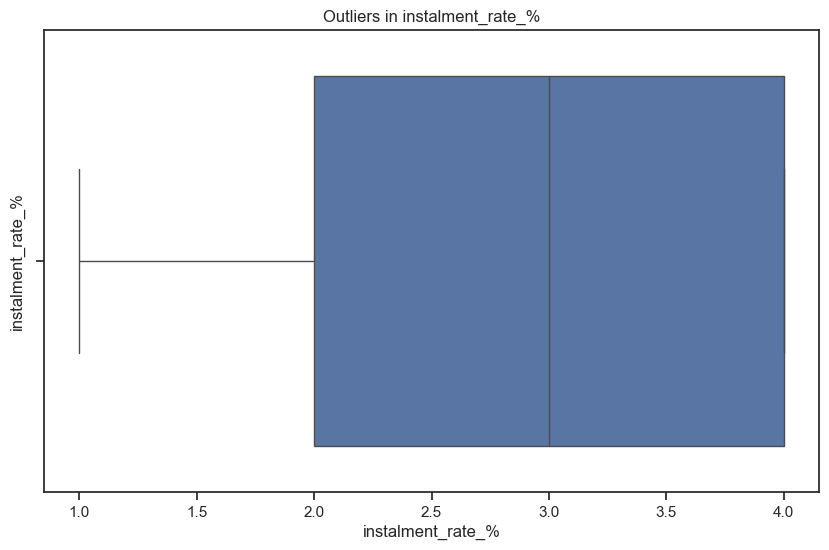

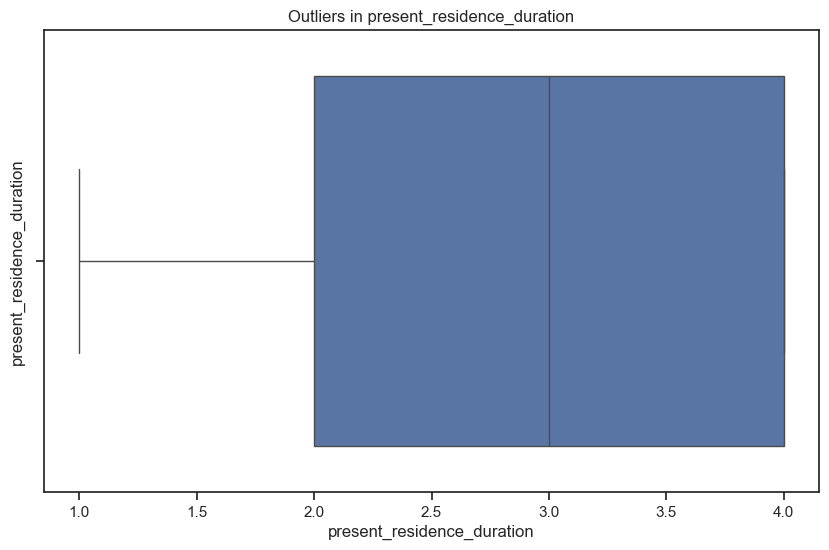

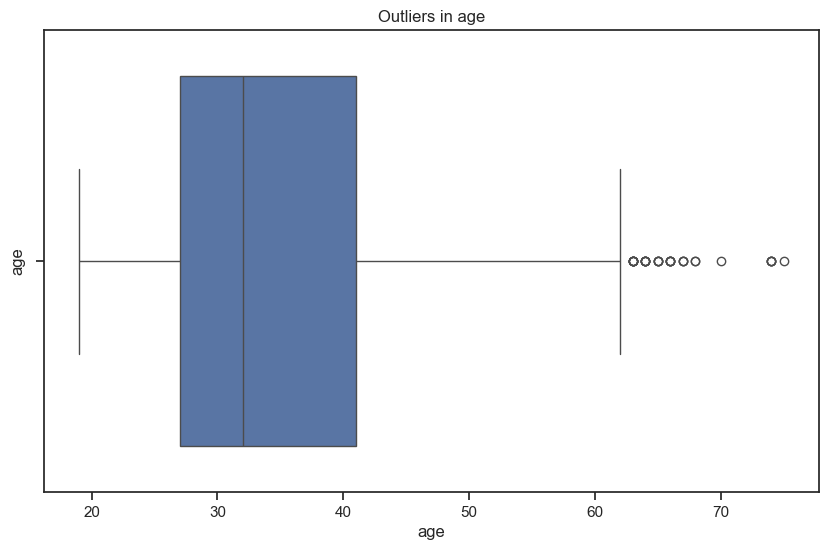

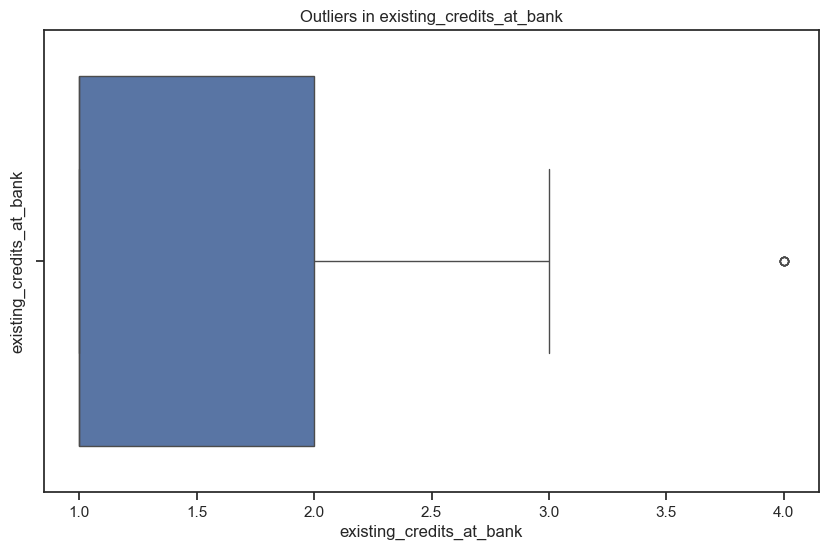

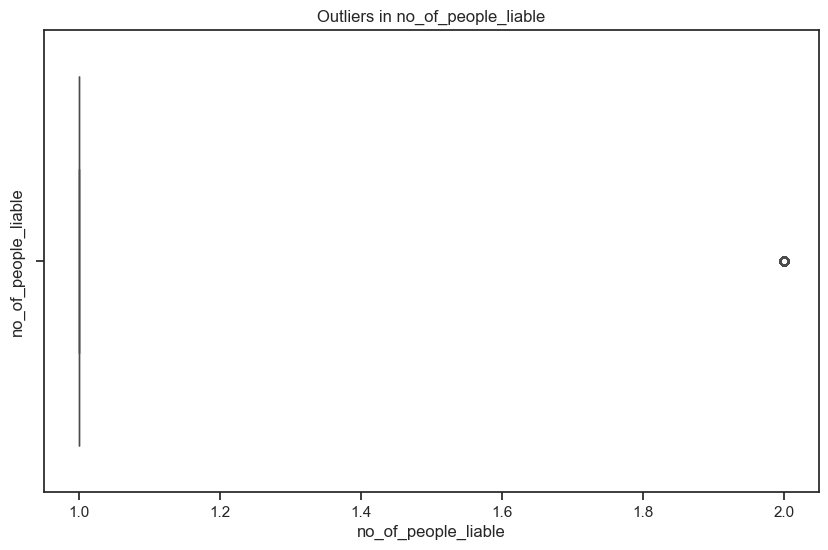

In [47]:
def visualize_outliers(df, column_name):
    # To identify outliers using IQR method
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # To visualize the data and outliers on boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name])
    #sns.scatterplot(x=outliers.index, y=outliers[column_name], color='red', label='Outliers')
    plt.title(f'Outliers in {column_name}')
    plt.xlabel(column_name)
    plt.ylabel(column_name)
    plt.show()

for col in numeric_cols:
    visualize_outliers(train_all_pd, col)

From the boxplots, outliers are found in the columns:
<li>duration_months</li>
<li>credit_amt</li>
<li>age</li>
<li>existing_credits_at_bank</li>
<li>no_of_people_liable</li>

Although the boxplots indicate outliers in some columns, I believe the values are not wrong or out-of-scale. All of the numeric columns have skewed distributions and handling outliers in skewed datasets without careful consideration could result in the loss of important information or lead to incorrect conclusions about the underlying patterns in the data. Therefore, I am not treating any outliers.

<hr/>

## 7. Feature Engineering, Feature Selection and Feature Scaling

In [48]:
train_balanced_h2o.head()

checking_acct_status    duration_months    credit_history    purpose    credit_amt    savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age    other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
                     0                  6                 4          4          1169                     4                      4                    4                      2                           0                             4           0     67                          2          1                           2           2                      1            1                 0              0
                     1                 48                 2          4          5951                     0                      2                    2                      1                           0                             2           0     22                          2          1                           1           2                      1            0                 0              1
                     3                 12                 4          7          2096                     0                      3                    2                      2                           0                             3           0     49                          2          1                           1           1                      2            0                 0              0
                     0                 42                 2          3          7882                     0                      3                    2                      2                           2                             4           1     45                          2          2                           1           2                      2            0                 0              0
                     0                 24                 3          0          4870                     0                      2                    3                      2                           0                             4           3     53                          2          2                           2           2                      2            0                 0              1
                     3                 24                 2          3          2835                     2                      4                    3                      2                           0                             4           1     53                          2          1                           1           2                      1            0                 0              0
                     1                 36                 2          1          6948                     0                      2                    2                      2                           0                             2           2     35                          2          0                           1           3                      1            1                 0              0
                     3                 12                 2          4          3059                     3                      3                    2                      0                           0                             4           0     61                          2          1                           1           1                      1            0                 0              0
                     1

In [49]:
test.head()

checking_acct_status    duration_months    credit_history    purpose    credit_amt    savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property    age    other_installment_plans    housing    existing_credits_at_bank    job_type    no_of_people_liable    telephone    foreign_worker    credit_risk
----------------------  -----------------  ----------------  ---------  ------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ----------  -----  -------------------------  ---------  --------------------------  ----------  ---------------------  -----------  ----------------  -------------
                     3                 36                 2          7          9055                     4                      2                    2                      2                           0                             4           3     35                          2          2                           1           1                      2            1                 0              0
                     0                 30                 0         10          8072                     4                      1                    2                      2                           0                             3           2     25                          0          1                           3           2                      1            0                 0              0
                     3                 24                 2          4          3430                     2                      4                    3                      2                           0                             2           2     31                          2          1                           1           2                      2            1                 0              0
                     0                  6                 2          4          2647                     2                      2                    2                      2                           0                             3           0     44                          2          0                           1           2                      2            0                 0              0
                     0                 10                 4          0          2241                     0                      1                    1                      2                           0                             3           0     48                          2          0                           2           1                      2            0                 1              0
                     1                 18                 2          0          5866                     1                      2                    2                      2                           0                             2           2     30                          2          1                           2           2                      1            1                 0              0
                     2                 18                 2          4          2100                     0                      2                    4                      2                           1                             2           0     37                          1          1                           1           2                      1            0                 0              1
                     3                 11                 4          0          1393                     0                      1                    4                      1                           0                             4           2     35                          2          1                           2           3                      1            0                 0              0
                     1

### 7.1 Feature Engineering

In [50]:
train_balanced_h2o.describe()

Rows:1138
Cols:21

checking_acct_status    duration_months     credit_history      purpose             credit_amt          savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property            age                other_installment_plans    housing             existing_credits_at_bank    job_type            no_of_people_liable    telephone            foreign_worker        credit_risk
-------  ----------------------  ------------------  ------------------  ------------------  ------------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ------------------  -----------------  -------------------------  ------------------  --------------------------  ------------------  ---------------------  -------------------  --------------------  ------------------
type     int                     int                 int                 int                 int                 int                   int                    int                  int                    int                         int                           int                 int                int                        int                 int                         int                 int                    int                  int                   int
mins     0.0                     4.0                 0.0                 0.0                 250.0               0.0                   0.0                    1.0                  0.0                    0.0                         1.0                           0.0                 19.0               0.0                        0.0                 1.0                         0.0                 1.0                    0.0                  0.0                   0.0
mean     1.311072056239014       21.471001757469256  2.383128295254833   3.260105448154659   3248.8409490333934  0.9077328646748681    2.1915641476274175     2.936731107205626    1.5289982425307576     0.1159929701230228          2.7135325131810206            1.3189806678383134  34.92618629173983  1.5896309314586992         0.842706502636203   1.3101933216168724          1.843585237258348   1.1124780316344474     0.32073813708260107  0.027240773286467488  0.507908611599297
maxs     3.0                     72.0                4.0                 10.0                15945.0             4.0                   4.0                    4.0                  3.0                    2.0                         4.0                           3.0                 75.0               2.0                        2.0                 4.0                         3.0                 2.0                    1.0                  1.0                   1.0
sigma    1.216957468924435       11.80818340396472   1.0396518864944042  2.8440882517238917  2747.753502527545   1.4465900068827633    1.1826356593396035     1.0821347024583208   0.7333871360269317     0.42012785249200435         1.0882807397904983            1.003603891898344   10.87385896716232  0.738058045801306          0.5523153981266594  0.5317548299558674          0.6538958226704615  0.31609258514580957    0.46696552181277146  0.16285582388694542   0.5001572509938543
zeros    397                     0                   43                  267                 0                   739                   82                     0                    87                     1048                        0                             298                 0                  172                        277                 0                           26                  0                      773                  1107                  560
missing  0                       0                   0                   0                   0                   0                     0                      0                    0                      0                           0              

<b>1. duration_months</b>
- Short term (0-12 months): Generally, a duration of up to one year is considered short term. (Represented by 1)
- Medium term (13-36 months): Durations from over a year to three years are often considered medium term, capturing a mid-range period. (Represented by 2)
- Long term (37 months and above): Durations longer than three years typically fall into the long-term category, representing more extended periods. (Represented by 3)

In [51]:
# This pandas dataframe will be feature engineered
train_balanced_pd = train_balanced_h2o.as_data_frame()
# Categorize duration_months with string labels (Training Dataset)
train_balanced_pd['duration_category'] = pd.cut(train_balanced_pd['duration_months'], 
                                           bins=[0, 12, 36, float('inf')], 
                                           labels=["Short term", "Medium term", "Long term"])

# Map string labels to integers
duration_mapping = {"Short term": 1, "Medium term": 2, "Long term": 3}
train_balanced_pd['duration_category'] = train_balanced_pd['duration_category'].map(duration_mapping).astype(int)

In [52]:
# This pandas dataframe will be feature engineered
test_pd = test.as_data_frame()
# Categorize duration_months with string labels (Test Dataset)
test_pd['duration_category'] = pd.cut(test_pd['duration_months'], 
                                           bins=[0, 12, 36, float('inf')], 
                                           labels=["Short term", "Medium term", "Long term"])

# Map string labels to integers
duration_mapping = {"Short term": 1, "Medium term": 2, "Long term": 3}
test_pd['duration_category'] = test_pd['duration_category'].map(duration_mapping).astype(int)

<b>2. credit_amt</b>
- Small (0-2000): This range is for relatively small loan amounts. (Represented by 1)
- Medium (2001-5000): Medium-sized loans often fall in this range. (Represented by 2)
- Large (5001 and above): Larger loan amounts exceed 5000. (Represented by 3)

In [53]:
# Categorize credit_amt with string labels (Training Dataset)
train_balanced_pd['credit_category'] = pd.cut(train_balanced_pd['credit_amt'], 
                                         bins=[0, 2000, 5000, float('inf')], 
                                         labels=["Small", "Medium", "Large"])

# Map string labels to integers for credit_category
credit_mapping = {"Small": 1, "Medium": 2, "Large": 3}
train_balanced_pd['credit_category'] = train_balanced_pd['credit_category'].map(credit_mapping).astype(int)

In [54]:
# Categorize credit_amt with string labels (Test Dataset)
test_pd['credit_category'] = pd.cut(test_pd['credit_amt'], 
                                         bins=[0, 2000, 5000, float('inf')], 
                                         labels=["Small", "Medium", "Large"])

# Map string labels to integers for credit_category
credit_mapping = {"Small": 1, "Medium": 2, "Large": 3}
test_pd['credit_category'] = test_pd['credit_category'].map(credit_mapping).astype(int)

<b>3. age</b>
- 20s and lower (0-29): This category includes individuals in their twenties and younger. (Represented by 1)
- 30s (30-39): This category includes individuals in their thirties. (Represented by 2)
- 40s (40-49): This category includes individuals in their forties. (Represented by 3)
- 50s (50-59): This category includes individuals in their fifties. (Represented by 4)
- Seniors (60 and above): This category includes individuals aged 60 and above, typically considered senior citizens. (Represented by 5)

In [55]:
# Categorize age with string labels (Training Dataset)
train_balanced_pd['age_category'] = pd.cut(train_balanced_pd['age'], 
                                      bins=[0, 29, 39, 49, 59, float('inf')], 
                                      labels=["20s and lower", "30s", "40s", "50s", "Seniors"])

# Map string labels to integers for age_category
age_mapping = {"20s and lower": 1, "30s": 2, "40s": 3, "50s": 4, "Seniors": 5}
train_balanced_pd['age_category'] = train_balanced_pd['age_category'].map(age_mapping).astype(int)

In [56]:
# Categorize age with string labels (Test Dataset)
test_pd['age_category'] = pd.cut(test_pd['age'], 
                                      bins=[0, 29, 39, 49, 59, float('inf')], 
                                      labels=["20s and lower", "30s", "40s", "50s", "Seniors"])

# Map string labels to integers for age_category
age_mapping = {"20s and lower": 1, "30s": 2, "40s": 3, "50s": 4, "Seniors": 5}
test_pd['age_category'] = test_pd['age_category'].map(age_mapping).astype(int)

In [57]:
train_balanced_pd[['duration_months', 'duration_category', 'credit_amt', 'credit_category', 'age', 'age_category']].head()

duration_months  duration_category  credit_amt  credit_category  age  \
0                6                  1        1169                1   67   
1               48                  3        5951                3   22   
2               12                  1        2096                2   49   
3               42                  3        7882                3   45   
4               24                  2        4870                2   53   

   age_category  
0             5  
1             1  
2             3  
3             3  
4             4

In [58]:
test_pd[['duration_months', 'duration_category', 'credit_amt', 'credit_category', 'age', 'age_category']].head()

duration_months  duration_category  credit_amt  credit_category  age  \
0               36                  2        9055                3   35   
1               30                  2        8072                3   25   
2               24                  2        3430                2   31   
3                6                  1        2647                2   44   
4               10                  1        2241                2   48   

   age_category  
0             2  
1             1  
2             2  
3             3  
4             3

In [59]:
train_balanced_pd['purpose'].value_counts()

purpose
4     273
0     267
3     220
1     117
10     80
7      52
2      35
6      34
5      32
9      19
8       9
Name: count, dtype: int64

<b>4. purpose</b>
- Combine A48 (9) and A47 (8) with A410 (2) since the frequencies for A48 and A47 are low.

In [60]:
# Treat values 9 and 8 as 2 in the purpose column (Training Dataset)
train_balanced_pd['purpose'] = train_balanced_pd['purpose'].replace({9: 2, 8: 2})

In [61]:
# Treat values 9 and 8 as 2 in the purpose column (Test Dataset)
test_pd['purpose'] = test_pd['purpose'].replace({9: 2, 8: 2})

In [62]:
train_balanced_pd.columns

Index(['checking_acct_status', 'duration_months', 'credit_history', 'purpose',
       'credit_amt', 'savings_acct_bonds', 'employment_duration',
       'instalment_rate_%', 'personal_status_sex', 'other_debtors_guarantors',
       'present_residence_duration', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits_at_bank',
       'job_type', 'no_of_people_liable', 'telephone', 'foreign_worker',
       'credit_risk', 'duration_category', 'credit_category', 'age_category'],
      dtype='object')

In [63]:
test_pd.columns

Index(['checking_acct_status', 'duration_months', 'credit_history', 'purpose',
       'credit_amt', 'savings_acct_bonds', 'employment_duration',
       'instalment_rate_%', 'personal_status_sex', 'other_debtors_guarantors',
       'present_residence_duration', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits_at_bank',
       'job_type', 'no_of_people_liable', 'telephone', 'foreign_worker',
       'credit_risk', 'duration_category', 'credit_category', 'age_category'],
      dtype='object')

In [64]:
train_balanced_pd = train_balanced_pd.drop(columns=['duration_months', 'credit_amt', 'age'])

In [65]:
test_pd = test_pd.drop(columns=['duration_months', 'credit_amt', 'age'])

In [66]:
train_balanced_pd.columns

Index(['checking_acct_status', 'credit_history', 'purpose',
       'savings_acct_bonds', 'employment_duration', 'instalment_rate_%',
       'personal_status_sex', 'other_debtors_guarantors',
       'present_residence_duration', 'property', 'other_installment_plans',
       'housing', 'existing_credits_at_bank', 'job_type',
       'no_of_people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'duration_category', 'credit_category', 'age_category'],
      dtype='object')

In [67]:
test_pd.columns

Index(['checking_acct_status', 'credit_history', 'purpose',
       'savings_acct_bonds', 'employment_duration', 'instalment_rate_%',
       'personal_status_sex', 'other_debtors_guarantors',
       'present_residence_duration', 'property', 'other_installment_plans',
       'housing', 'existing_credits_at_bank', 'job_type',
       'no_of_people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'duration_category', 'credit_category', 'age_category'],
      dtype='object')

### 7.2 Feature Selection

In [68]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from h2o.estimators import H2ORandomForestEstimator

In [69]:
train_balanced_h2o_2 = h2o.H2OFrame(train_balanced_pd)
test_h2o = h2o.H2OFrame(test_pd)
X_train_balanced_h2o = train_balanced_h2o_2.drop('credit_risk')
y_train_balanced_h2o = train_balanced_h2o_2['credit_risk']

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [70]:
train_balanced_h2o_2['credit_risk'] = train_balanced_h2o_2['credit_risk'].asfactor()
test_h2o['credit_risk'] = test_h2o['credit_risk'].asfactor()

In [71]:
train_balanced_h2o_2.describe()

Rows:1138
Cols:21

checking_acct_status    credit_history      purpose             savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property            other_installment_plans    housing             existing_credits_at_bank    job_type            no_of_people_liable    telephone            foreign_worker        credit_risk    duration_category    credit_category     age_category
-------  ----------------------  ------------------  ------------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ------------------  -------------------------  ------------------  --------------------------  ------------------  ---------------------  -------------------  --------------------  -------------  -------------------  ------------------  ------------------
type     int                     int                 int                 int                   int                    int                  int                    int                         int                           int                 int                        int                 int                         int                 int                    int                  int                   enum           int                  int                 int
mins     0.0                     0.0                 0.0                 0.0                   0.0                    1.0                  0.0                    0.0                         1.0                           0.0                 0.0                        0.0                 1.0                         0.0                 1.0                    0.0                  0.0                                  1.0                  1.0                 1.0
mean     1.311072056239014       2.383128295254833   3.095782073813706   0.9077328646748681    2.1915641476274175     2.936731107205626    1.5289982425307576     0.1159929701230228          2.7135325131810206            1.3189806678383134  1.5896309314586992         0.842706502636203   1.3101933216168724          1.843585237258348   1.1124780316344474     0.32073813708260107  0.027240773286467488                 1.7864674868189812   1.7513181019332182  2.0386643233743404
maxs     3.0                     4.0                 10.0                4.0                   4.0                    4.0                  3.0                    2.0                         4.0                           3.0                 2.0                        2.0                 4.0                         3.0                 2.0                    1.0                  1.0                                  3.0                  3.0                 5.0
sigma    1.216957468924435       1.0396518864944042  2.7152392104668346  1.4465900068827633    1.1826356593396035     1.0821347024583208   0.7333871360269317     0.42012785249200435         1.0882807397904983            1.003603891898344   0.738058045801306          0.5523153981266594  0.5317548299558674          0.6538958226704615  0.31609258514580957    0.46696552181277146  0.16285582388694542                  0.5998472389065048   0.747098181578174   1.0921881282319328
zeros    397                     43                  267                 739                   82                     0                    87                     1048                        0                             298                 172                        277                 0                           26                  0                      773                  1107                                 0                    0                   0
missing  0                       0                   0                   0                     0                      0                    0                      0                           0                             0                   0                          0 

In [72]:
test_h2o.describe()

Rows:200
Cols:21

checking_acct_status    credit_history      purpose             savings_acct_bonds    employment_duration    instalment_rate_%    personal_status_sex    other_debtors_guarantors    present_residence_duration    property            other_installment_plans    housing             existing_credits_at_bank    job_type            no_of_people_liable    telephone            foreign_worker       credit_risk    duration_category    credit_category     age_category
-------  ----------------------  ------------------  ------------------  --------------------  ---------------------  -------------------  ---------------------  --------------------------  ----------------------------  ------------------  -------------------------  ------------------  --------------------------  ------------------  ---------------------  -------------------  -------------------  -------------  -------------------  ------------------  ------------------
type     int                     int                 int                 int                   int                    int                  int                    int                         int                           int                 int                        int                 int                         int                 int                    int                  int                  enum           int                  int                 int
mins     0.0                     0.0                 0.0                 0.0                   0.0                    1.0                  0.0                    0.0                         1.0                           0.0                 0.0                        0.0                 1.0                         0.0                 1.0                    0.0                  0.0                                 1.0                  1.0                 1.0
mean     1.4949999999999994      2.455000000000002   3.4150000000000005  1.105000000000001     2.419999999999999      2.975000000000002    1.705                  0.13499999999999995         2.9200000000000004            1.3449999999999995  1.605                      0.9599999999999999  1.515                       1.8850000000000007  1.145000000000001      0.45                 0.03                                1.8250000000000004   1.85                2.1700000000000017
maxs     3.0                     4.0                 10.0                4.0                   4.0                    4.0                  3.0                    2.0                         4.0                           3.0                 2.0                        2.0                 3.0                         3.0                 2.0                    1.0                  1.0                                 3.0                  3.0                 5.0
sigma    1.2877369031204668      1.1979777768259494  3.029631717174308   1.5640351754838362    1.2333718134247897     1.1047521834939604   0.700305030453439      0.46675938298875164         1.0814098372869119            1.0684958666674507  0.782326770524566          0.5476308039979464  0.5929019002470667          0.6510717874104278  0.3529844046834771     0.49874213637205833  0.17101529509309654                 0.6133973275186606   0.7877836092959647  1.1078069240190378
zeros    64                      15                  47                  120                   13                     0                    10                     183                         0                             60                  37                         34                  0                           6                   0                      110                  194                                 0                    0                   0
missing  0                       0                   0                   0                     0                      0                    0                      0                           0                             0                   0                          0         

In [73]:
X_train = X_train_balanced_h2o.as_data_frame()
y_train = y_train_balanced_h2o.as_data_frame()

### 1. Correlation Analysis

In [74]:
import numpy as np
def correlation_analysis(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

X_corr = correlation_analysis(X_train)

### 2. ANOVA

In [75]:
anova_selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_anova = anova_selector.fit_transform(X_train, y_train)

### 3. Chi-Square

In [76]:
chi2_selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_chi2 = chi2_selector.fit_transform(X_train, y_train)

### 4. Feature Importance

In [77]:
target = 'credit_risk'
features = train_balanced_h2o_2.columns
features.remove(target)

rf_model = H2ORandomForestEstimator(ntrees=100, seed=42)
rf_model.train(x=features, y=target, training_frame=train_balanced_h2o_2)

# Get variable importance
variable_importance = rf_model.varimp(use_pandas=True)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


### 5. Results

In [78]:
# Combine results
selected_features = {
    'correlation': X_corr.columns.tolist(),
    'anova': X_train.columns[anova_selector.get_support()].tolist(),
    'chi2': X_train.columns[chi2_selector.get_support()].tolist()
}

print("Selected features by method:")
for method, features in selected_features.items():
    print(f"\nMethod: {method}")
    print(f"Number of features selected: {len(features)}")
    print(f"Selected features: {features}")
print("\nMethod: Random Forest Variable Importance")
print("Number of features selected: ", 10)
print(variable_importance.head(10))

Selected features by method:

Method: correlation
Number of features selected: 20
Selected features: ['checking_acct_status', 'credit_history', 'purpose', 'savings_acct_bonds', 'employment_duration', 'instalment_rate_%', 'personal_status_sex', 'other_debtors_guarantors', 'present_residence_duration', 'property', 'other_installment_plans', 'housing', 'existing_credits_at_bank', 'job_type', 'no_of_people_liable', 'telephone', 'foreign_worker', 'duration_category', 'credit_category', 'age_category']

Method: anova
Number of features selected: 10
Selected features: ['checking_acct_status', 'credit_history', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', 'other_installment_plans', 'existing_credits_at_bank', 'no_of_people_liable', 'telephone', 'duration_category']

Method: chi2
Number of features selected: 10
Selected features: ['checking_acct_status', 'credit_history', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', 'other_debtors_guarantors', 'othe

<b> Columns to be kept</b>
- 'checking_acct_status' - Selected by all methods.
- 'credit_history' - Selected by all methods.
- 'purpose' - Selected by correlation & Feature Importance
- 'savings_acct_bonds' - Selected by all methods.
- 'employment_duration' - Selected by all methods.
- 'personal_status_sex' - Selected by all methods.
- 'other_debtors_guarantors' - Selected by Correlation & Chi-square
- 'other_installment_plans' - Selected by all methods.
- 'existing_credits_at_bank' - Selected by Correlation & Anova
- 'no_of_people_liable' - Selected by Correlation & Anova
- 'telephone' - Selected by Correlation, Anova & Chi-square
- 'foreign_worker' - Selected by Correlation & Chi-square
- 'duration_category' - Selected by Correlation, Anova & Chi-square
- 'age_category' - Selected by Correlation & Feature Importance

In [79]:
keepCols = ['checking_acct_status', 'credit_history', 'purpose', 'savings_acct_bonds', 'employment_duration', 'personal_status_sex', 'other_debtors_guarantors', 'other_installment_plans', 'existing_credits_at_bank', 'no_of_people_liable', 'telephone', 'foreign_worker', 'duration_category', 'age_category', 'credit_risk']
train_balanced_h2o_2 = train_balanced_h2o_2[keepCols]
test_h2o = test_h2o[keepCols]

In [80]:
train_balanced_h2o_2.head()

checking_acct_status    credit_history    purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category    credit_risk
----------------------  ----------------  ---------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------  -------------
                     0                 4          4                     4                      4                      2                           0                          2                           2                      1            1                 0                    1               5              0
                     1                 2          4                     0                      2                      1                           0                          2                           1                      1            0                 0                    3               1              1
                     3                 4          7                     0                      3                      2                           0                          2                           1                      2            0                 0                    1               3              0
                     0                 2          3                     0                      3                      2                           2                          2                           1                      2            0                 0                    3               3              0
                     0                 3          0                     0                      2                      2                           0                          2                           2                      2            0                 0                    2               4              1
                     3                 2          3                     2                      4                      2                           0                          2                           1                      1            0                 0                    2               4              0
                     1                 2          1                     0                      2                      2                           0                          2                           1                      1            1                 0                    2               2              0
                     3                 2          4                     3                      3                      0                           0                          2                           1                      1            0                 0                    1               5              0
                     1                 4          0                     0                      0                      3                           0                          2                           2                      1            0                 0                    2               1              1
                     1                 2          0                     0                      1                      1                           0                          2                           1                      1            0                 0                    1               1              1
[10 rows x 15 columns]

In [81]:
train_balanced_h2o_2.describe()

Rows:1138
Cols:15

checking_acct_status    credit_history      purpose             savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone            foreign_worker        duration_category    age_category        credit_risk
-------  ----------------------  ------------------  ------------------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -------------------  --------------------  -------------------  ------------------  -------------
type     int                     int                 int                 int                   int                    int                    int                         int                        int                         int                    int                  int                   int                  int                 enum
mins     0.0                     0.0                 0.0                 0.0                   0.0                    0.0                    0.0                         0.0                        1.0                         1.0                    0.0                  0.0                   1.0                  1.0
mean     1.311072056239014       2.383128295254833   3.095782073813706   0.9077328646748681    2.1915641476274175     1.5289982425307576     0.1159929701230228          1.5896309314586992         1.3101933216168724          1.1124780316344474     0.32073813708260107  0.027240773286467488  1.7864674868189812   2.0386643233743404
maxs     3.0                     4.0                 10.0                4.0                   4.0                    3.0                    2.0                         2.0                        4.0                         2.0                    1.0                  1.0                   3.0                  5.0
sigma    1.216957468924435       1.0396518864944042  2.7152392104668346  1.4465900068827633    1.1826356593396035     0.7333871360269317     0.42012785249200435         0.738058045801306          0.5317548299558674          0.31609258514580957    0.46696552181277146  0.16285582388694542   0.5998472389065048   1.0921881282319328
zeros    397                     43                  267                 739                   82                     87                     1048                        172                        0                           0                      773                  1107                  0                    0
missing  0                       0                   0                   0                     0                      0                      0                           0                          0                           0                      0                    0                     0                    0                   0
0        0.0                     4.0                 4.0                 4.0                   4.0                    2.0                    0.0                         2.0                        2.0                         1.0                    1.0                  0.0                   1.0                  5.0                 0
1        1.0                     2.0                 4.0                 0.0                   2.0                    1.0                    0.0                         2.0                        1.0                         1.0                    0.0                  0.0                   3.0                  1.0                 1
2        3.0                     4.0                 7.0                 0.0                   3.0                    2.0                    0.0                         2.0                        1.0                         2.0                    0.0                  0.0                   1.0                  3.0                 0
3        0.0                     2.0              

In [82]:
test_h2o.head()

checking_acct_status    credit_history    purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category    credit_risk
----------------------  ----------------  ---------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------  -------------
                     3                 2          7                     4                      2                      2                           0                          2                           1                      2            1                 0                    2               2              0
                     0                 0         10                     4                      1                      2                           0                          0                           3                      1            0                 0                    2               1              0
                     3                 2          4                     2                      4                      2                           0                          2                           1                      2            1                 0                    2               2              0
                     0                 2          4                     2                      2                      2                           0                          2                           1                      2            0                 0                    1               3              0
                     0                 4          0                     0                      1                      2                           0                          2                           2                      2            0                 1                    1               3              0
                     1                 2          0                     1                      2                      2                           0                          2                           2                      1            1                 0                    2               2              0
                     2                 2          4                     0                      2                      2                           1                          1                           1                      1            0                 0                    2               2              1
                     3                 4          0                     0                      1                      1                           0                          2                           2                      1            0                 0                    1               2              0
                     1                 3          1                     0                      4                      2                           0                          2                           2                      1            1                 0                    2               2              0
                     3                 2          4                     0                      2                      2                           0                          2                           1                      1            0                 0                    1               1              0
[10 rows x 15 columns]

In [83]:
test_h2o.describe()

Rows:200
Cols:15

checking_acct_status    credit_history      purpose             savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone            foreign_worker       duration_category    age_category        credit_risk
-------  ----------------------  ------------------  ------------------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -------------------  -------------------  -------------------  ------------------  -------------
type     int                     int                 int                 int                   int                    int                    int                         int                        int                         int                    int                  int                  int                  int                 enum
mins     0.0                     0.0                 0.0                 0.0                   0.0                    0.0                    0.0                         0.0                        1.0                         1.0                    0.0                  0.0                  1.0                  1.0
mean     1.4949999999999994      2.455000000000002   3.4150000000000005  1.105000000000001     2.419999999999999      1.705                  0.13499999999999995         1.605                      1.515                       1.145000000000001      0.45                 0.03                 1.8250000000000004   2.1700000000000017
maxs     3.0                     4.0                 10.0                4.0                   4.0                    3.0                    2.0                         2.0                        3.0                         2.0                    1.0                  1.0                  3.0                  5.0
sigma    1.2877369031204668      1.1979777768259494  3.029631717174308   1.5640351754838362    1.2333718134247897     0.700305030453439      0.46675938298875164         0.782326770524566          0.5929019002470667          0.3529844046834771     0.49874213637205833  0.17101529509309654  0.6133973275186606   1.1078069240190378
zeros    64                      15                  47                  120                   13                     10                     183                         37                         0                           0                      110                  194                  0                    0
missing  0                       0                   0                   0                     0                      0                      0                           0                          0                           0                      0                    0                    0                    0                   0
0        3.0                     2.0                 7.0                 4.0                   2.0                    2.0                    0.0                         2.0                        1.0                         2.0                    1.0                  0.0                  2.0                  2.0                 0
1        0.0                     0.0                 10.0                4.0                   1.0                    2.0                    0.0                         0.0                        3.0                         1.0                    0.0                  0.0                  2.0                  1.0                 0
2        3.0                     2.0                 4.0                 2.0                   4.0                    2.0                    0.0                         2.0                        1.0                         2.0                    1.0                  0.0                  2.0                  2.0                 0
3        0.0                     2.0                 4.0      

### 7.3 Feature Scaling

Standardization for numeric features offers a robust solution for feature scaling in credit risk analysis. By centering features around their mean and scaling them based on their standard deviation, Standardization ensures that outliers, which may exist in credit-related data, do not disproportionately influence the scaling process. This method preserves the distribution of original data, aiding in the interpretation of feature importance, and is effective across a variety of machine learning algorithms commonly employed in credit risk modeling, ensuring consistent and reliable performance.</br>

While normalization rescales features to a predetermined range (typically [0, 1]), it's more sensitive to outliers compared to Standardization, potentially skewing the scaled features when dealing with variables prone to extreme values, such as credit amounts or durations. Additionally, normalization alters the distribution of features, which might affect the interpretation of their importance and relationships in credit risk analysis. 

Therefore, Standardization is chosen.

In [84]:
train_balanced_h2o_2.columns

['checking_acct_status',
 'credit_history',
 'purpose',
 'savings_acct_bonds',
 'employment_duration',
 'personal_status_sex',
 'other_debtors_guarantors',
 'other_installment_plans',
 'existing_credits_at_bank',
 'no_of_people_liable',
 'telephone',
 'foreign_worker',
 'duration_category',
 'age_category',
 'credit_risk']

In [85]:
test_h2o.columns

['checking_acct_status',
 'credit_history',
 'purpose',
 'savings_acct_bonds',
 'employment_duration',
 'personal_status_sex',
 'other_debtors_guarantors',
 'other_installment_plans',
 'existing_credits_at_bank',
 'no_of_people_liable',
 'telephone',
 'foreign_worker',
 'duration_category',
 'age_category',
 'credit_risk']

In [86]:
train_pd = train_balanced_h2o_2.as_data_frame()
test_pd = test_h2o.as_data_frame()

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_pd.iloc[:, :-1] = scaler.fit_transform(train_pd.iloc[:, :-1])
test_pd.iloc[:, :-1] = scaler.transform(test_pd.iloc[:, :-1])

In [88]:
from pickle import dump
dump(scaler, open('standard_scaler.pkl', 'wb'))

In [89]:
train_pd.head(10)

checking_acct_status  credit_history   purpose  savings_acct_bonds  \
0             -1.077810        1.555889  0.333162            2.138565   
1             -0.255727       -0.368678  0.333162           -0.627774   
2              1.388438        1.555889  1.438523           -0.627774   
3             -1.077810       -0.368678 -0.035291           -0.627774   
4             -1.077810        0.593605 -1.140652           -0.627774   
5              1.388438       -0.368678 -0.035291            0.755395   
6             -0.255727       -0.368678 -0.772198           -0.627774   
7              1.388438       -0.368678  0.333162            1.446980   
8             -0.255727        1.555889 -1.140652           -0.627774   
9             -0.255727       -0.368678 -1.140652           -0.627774   

   employment_duration  personal_status_sex  other_debtors_guarantors  \
0             1.529830             0.642510                 -0.276211   
1            -0.162052            -0.721625                 -0.276211   
2             0.683889             0.642510                 -0.276211   
3             0.683889             0.642510                  4.486338   
4            -0.162052             0.642510                 -0.276211   
5             1.529830             0.642510                 -0.276211   
6            -0.162052             0.642510                 -0.276211   
7             0.683889            -2.085761                 -0.276211   
8            -1.853933             2.006646                 -0.276211   
9            -1.007993            -0.721625                 -0.276211   

   other_installment_plans  existing_credits_at_bank  no_of_people_liable  \
0                 0.556256                  1.297797            -0.355995   
1                 0.556256                 -0.583595            -0.355995   
2                 0.556256                 -0.583595             2.809026   
3                 0.556256                 -0.583595             2.809026   
4                 0.556256                  1.297797             2.809026   
5                 0.556256                 -0.583595            -0.355995   
6                 0.556256                 -0.583595            -0.355995   
7                 0.556256                 -0.583595            -0.355995   
8                 0.556256                  1.297797            -0.355995   
9                 0.556256                 -0.583595            -0.355995   

   telephone  foreign_worker  duration_category  age_category  credit_risk  
0   1.455269       -0.167343          -1.311689      2.712571            0  
1  -0.687158       -0.167343           2.023959     -0.951412            1  
2  -0.687158       -0.167343          -1.311689      0.880579            0  
3  -0.687158       -0.167343           2.023959      0.880579            0  
4  -0.687158       -0.167343           0.356135      1.796575            1  
5  -0.687158       -0.167343           0.356135      1.796575            0  
6   1.455269       -0.167343           0.356135     -0.035416            0  
7  -0.687158       -0.167343          -1.311689      2.712571            0  
8  -0.687158       -0.167343           0.356135     -0.951412            1  
9  -0.687158       -0.167343          -1.311689     -0.951412            1

In [90]:
test_pd.head(10)

checking_acct_status  credit_history   purpose  savings_acct_bonds  \
0              1.388438       -0.368678  1.438523            2.138565   
1             -1.077810       -2.293245  2.543884            2.138565   
2              1.388438       -0.368678  0.333162            0.755395   
3             -1.077810       -0.368678  0.333162            0.755395   
4             -1.077810        1.555889 -1.140652           -0.627774   
5             -0.255727       -0.368678 -1.140652            0.063811   
6              0.566356       -0.368678  0.333162           -0.627774   
7              1.388438        1.555889 -1.140652           -0.627774   
8             -0.255727        0.593605 -0.772198           -0.627774   
9              1.388438       -0.368678  0.333162           -0.627774   

   employment_duration  personal_status_sex  other_debtors_guarantors  \
0            -0.162052             0.642510                 -0.276211   
1            -1.007993             0.642510                 -0.276211   
2             1.529830             0.642510                 -0.276211   
3            -0.162052             0.642510                 -0.276211   
4            -1.007993             0.642510                 -0.276211   
5            -0.162052             0.642510                 -0.276211   
6            -0.162052             0.642510                  2.105063   
7            -1.007993            -0.721625                 -0.276211   
8             1.529830             0.642510                 -0.276211   
9            -0.162052             0.642510                 -0.276211   

   other_installment_plans  existing_credits_at_bank  no_of_people_liable  \
0                 0.556256                 -0.583595             2.809026   
1                -2.154749                  3.179190            -0.355995   
2                 0.556256                 -0.583595             2.809026   
3                 0.556256                 -0.583595             2.809026   
4                 0.556256                  1.297797             2.809026   
5                 0.556256                  1.297797            -0.355995   
6                -0.799246                 -0.583595            -0.355995   
7                 0.556256                  1.297797            -0.355995   
8                 0.556256                  1.297797            -0.355995   
9                 0.556256                 -0.583595            -0.355995   

   telephone  foreign_worker  duration_category  age_category  credit_risk  
0   1.455269       -0.167343           0.356135     -0.035416            0  
1  -0.687158       -0.167343           0.356135     -0.951412            0  
2   1.455269       -0.167343           0.356135     -0.035416            0  
3  -0.687158       -0.167343          -1.311689      0.880579            0  
4  -0.687158        5.975757          -1.311689      0.880579            0  
5   1.455269       -0.167343           0.356135     -0.035416            0  
6  -0.687158       -0.167343           0.356135     -0.035416            1  
7  -0.687158       -0.167343          -1.311689     -0.035416            0  
8   1.455269       -0.167343           0.356135     -0.035416            0  
9  -0.687158       -0.167343          -1.311689     -0.951412            0

In [91]:
train_final = h2o.H2OFrame(train_pd)
test_final = h2o.H2OFrame(test_pd)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [92]:
train_final.head()

checking_acct_status    credit_history     purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category    credit_risk
----------------------  ----------------  ----------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------  -------------
             -1.07781           1.55589    0.333162               2.13856                1.52983                0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343            -1.31169        2.71257                0
             -0.255727         -0.368678   0.333162              -0.627774              -0.162052              -0.721625                   -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343             2.02396       -0.951412               1
              1.38844           1.55589    1.43852               -0.627774               0.683889               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903     -0.687158         -0.167343            -1.31169        0.880579               0
             -1.07781          -0.368678  -0.0352912             -0.627774               0.683889               0.64251                     4.48634                    0.556256                   -0.583595               2.80903     -0.687158         -0.167343             2.02396        0.880579               0
             -1.07781           0.593605  -1.14065               -0.627774              -0.162052               0.64251                    -0.276211                   0.556256                    1.2978                 2.80903     -0.687158         -0.167343             0.356135       1.79658                1
              1.38844          -0.368678  -0.0352912              0.755395               1.52983                0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343             0.356135       1.79658                0
             -0.255727         -0.368678  -0.772198              -0.627774              -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995     1.45527          -0.167343             0.356135      -0.0354164              0
              1.38844          -0.368678   0.333162               1.44698                0.683889              -2.08576                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169        2.71257                0
             -0.255727          1.55589   -1.14065               -0.627774              -1.85393                2.00665                    -0.276211                   0.556256                    1.2978                -0.355995    -0.687158         -0.167343             0.356135      -0.951412               1
             -0.255727         -0.368678  -1.14065               -0.627774              -1.00799               -0.721625                   -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169       -0.951412               1
[10 rows x 15 columns]

In [93]:
test_final.head()

checking_acct_status    credit_history    purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category    credit_risk
----------------------  ----------------  ---------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------  -------------
              1.38844          -0.368678   1.43852              2.13856                -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903      1.45527          -0.167343             0.356135      -0.0354164              0
             -1.07781          -2.29324    2.54388              2.13856                -1.00799                0.64251                    -0.276211                  -2.15475                     3.17919               -0.355995    -0.687158         -0.167343             0.356135      -0.951412               0
              1.38844          -0.368678   0.333162             0.755395                1.52983                0.64251                    -0.276211                   0.556256                   -0.583595               2.80903      1.45527          -0.167343             0.356135      -0.0354164              0
             -1.07781          -0.368678   0.333162             0.755395               -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903     -0.687158         -0.167343            -1.31169        0.880579               0
             -1.07781           1.55589   -1.14065             -0.627774               -1.00799                0.64251                    -0.276211                   0.556256                    1.2978                 2.80903     -0.687158          5.97576             -1.31169        0.880579               0
             -0.255727         -0.368678  -1.14065              0.0638105              -0.162052               0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343             0.356135      -0.0354164              0
              0.566356         -0.368678   0.333162            -0.627774               -0.162052               0.64251                     2.10506                   -0.799246                   -0.583595              -0.355995    -0.687158         -0.167343             0.356135      -0.0354164              1
              1.38844           1.55589   -1.14065             -0.627774               -1.00799               -0.721625                   -0.276211                   0.556256                    1.2978                -0.355995    -0.687158         -0.167343            -1.31169       -0.0354164              0
             -0.255727          0.593605  -0.772198            -0.627774                1.52983                0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343             0.356135      -0.0354164              0
              1.38844          -0.368678   0.333162            -0.627774               -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169       -0.951412               0
[10 rows x 15 columns]

In [94]:
X_train_final = train_final.drop('credit_risk')
y_train_final = train_final['credit_risk']
X_test_final = test_final.drop('credit_risk')
y_test_final = test_final['credit_risk']

In [95]:
X_train_final.head()

checking_acct_status    credit_history     purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category
----------------------  ----------------  ----------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------
             -1.07781           1.55589    0.333162               2.13856                1.52983                0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343            -1.31169        2.71257
             -0.255727         -0.368678   0.333162              -0.627774              -0.162052              -0.721625                   -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343             2.02396       -0.951412
              1.38844           1.55589    1.43852               -0.627774               0.683889               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903     -0.687158         -0.167343            -1.31169        0.880579
             -1.07781          -0.368678  -0.0352912             -0.627774               0.683889               0.64251                     4.48634                    0.556256                   -0.583595               2.80903     -0.687158         -0.167343             2.02396        0.880579
             -1.07781           0.593605  -1.14065               -0.627774              -0.162052               0.64251                    -0.276211                   0.556256                    1.2978                 2.80903     -0.687158         -0.167343             0.356135       1.79658
              1.38844          -0.368678  -0.0352912              0.755395               1.52983                0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343             0.356135       1.79658
             -0.255727         -0.368678  -0.772198              -0.627774              -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995     1.45527          -0.167343             0.356135      -0.0354164
              1.38844          -0.368678   0.333162               1.44698                0.683889              -2.08576                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169        2.71257
             -0.255727          1.55589   -1.14065               -0.627774              -1.85393                2.00665                    -0.276211                   0.556256                    1.2978                -0.355995    -0.687158         -0.167343             0.356135      -0.951412
             -0.255727         -0.368678  -1.14065               -0.627774              -1.00799               -0.721625                   -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169       -0.951412
[10 rows x 14 columns]

In [96]:
y_train_final.head()

credit_risk
-------------
            0
            1
            0
            0
            1
            0
            0
            0
            1
            1
[10 rows x 1 column]

In [97]:
X_test_final.head()

checking_acct_status    credit_history    purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category
----------------------  ----------------  ---------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------
              1.38844          -0.368678   1.43852              2.13856                -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903      1.45527          -0.167343             0.356135      -0.0354164
             -1.07781          -2.29324    2.54388              2.13856                -1.00799                0.64251                    -0.276211                  -2.15475                     3.17919               -0.355995    -0.687158         -0.167343             0.356135      -0.951412
              1.38844          -0.368678   0.333162             0.755395                1.52983                0.64251                    -0.276211                   0.556256                   -0.583595               2.80903      1.45527          -0.167343             0.356135      -0.0354164
             -1.07781          -0.368678   0.333162             0.755395               -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595               2.80903     -0.687158         -0.167343            -1.31169        0.880579
             -1.07781           1.55589   -1.14065             -0.627774               -1.00799                0.64251                    -0.276211                   0.556256                    1.2978                 2.80903     -0.687158          5.97576             -1.31169        0.880579
             -0.255727         -0.368678  -1.14065              0.0638105              -0.162052               0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343             0.356135      -0.0354164
              0.566356         -0.368678   0.333162            -0.627774               -0.162052               0.64251                     2.10506                   -0.799246                   -0.583595              -0.355995    -0.687158         -0.167343             0.356135      -0.0354164
              1.38844           1.55589   -1.14065             -0.627774               -1.00799               -0.721625                   -0.276211                   0.556256                    1.2978                -0.355995    -0.687158         -0.167343            -1.31169       -0.0354164
             -0.255727          0.593605  -0.772198            -0.627774                1.52983                0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343             0.356135      -0.0354164
              1.38844          -0.368678   0.333162            -0.627774               -0.162052               0.64251                    -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343            -1.31169       -0.951412
[10 rows x 14 columns]

In [98]:
y_test_final.head()

credit_risk
-------------
            0
            0
            0
            0
            0
            0
            1
            0
            0
            0
[10 rows x 1 column]

In [99]:
y_train_final.describe()

Rows:1138
Cols:1

credit_risk
-------  ------------------
type     int
mins     0.0
mean     0.507908611599297
maxs     1.0
sigma    0.5001572509938543
zeros    560
missing  0
0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
5        0.0
6        0.0
7        0.0
8        1.0
9        1.0
[1138 rows x 1 column]

In [100]:
y_test_final.describe()

Rows:200
Cols:1

credit_risk
-------  ------------------
type     int
mins     0.0
mean     0.3
maxs     1.0
sigma    0.4594075275633928
zeros    140
missing  0
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        1.0
7        0.0
8        0.0
9        0.0
[200 rows x 1 column]

In [101]:
y_train_final = y_train_final.asfactor()

In [102]:
y_test_final = y_test_final.asfactor()

In [103]:
y_train_final.describe()

Rows:1138
Cols:1

credit_risk
-------  -------------
type     enum
mins
mean
maxs
sigma
zeros
missing  0
0        0
1        1
2        0
3        0
4        1
5        0
6        0
7        0
8        1
9        1
[1138 rows x 1 column]

In [104]:
y_test_final.describe()

Rows:200
Cols:1

credit_risk
-------  -------------
type     enum
mins
mean
maxs
sigma
zeros
missing  0
0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        0
8        0
9        0
[200 rows x 1 column]

In [105]:
train_final['credit_risk'] = train_final['credit_risk'].asfactor()
test_final['credit_risk'] = test_final['credit_risk'].asfactor()

In [106]:
train_final.describe()

Rows:1138
Cols:15

checking_acct_status    credit_history          purpose                 savings_acct_bonds      employment_duration     personal_status_sex     other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable      telephone               foreign_worker          duration_category      age_category           credit_risk
-------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  --------------------------  -------------------------  --------------------------  -----------------------  ----------------------  ----------------------  ---------------------  ---------------------  -------------
type     real                    real                    real                    real                    real                    real                    real                        real                       real                        real                     real                    real                    real                   real                   enum
mins     -1.077809629223633      -2.293244580685925      -1.140652044360808      -0.6277742494712903     -1.8539333454266504     -2.0857612607355116     -0.27621107852350396        -2.1547489835160114        -0.5835954519404227         -0.35599532759198804     -0.6871581238643371     -0.16734280196490986    -1.3116893965519314    -0.9514120806175422
mean     2.2876665839444144e-17  -2.704542319265091e-16  -8.277883586926826e-17  -5.106592232406726e-17  -8.326672684688674e-17  -6.591949208711867e-17  3.732365978781349e-17       7.936359902593892e-17      -5.2692225582795515e-17     -2.4362022815749285e-16  -3.935653886122381e-17  2.1277467635028025e-17  5.854691731421724e-18  6.884683795282953e-18
maxs     1.388438409763956       1.555888653562722       2.5438839377073137      2.1385649408416945      1.5298295208051509      2.00664617843175        4.486337517836307           0.5562563710900926         5.060582658327574           2.8090256317805284       1.4552691225948835      5.975757476617909       2.0239587225008013     2.7125708220652434
sigma    1.0004396570887286      1.0004396570887286      1.0004396570887284      1.000439657088729       1.00043965708873        1.0004396570887288      1.0004396570887277          1.0004396570887288         1.0004396570887297          1.0004396570887293       1.0004396570887282      1.0004396570887284      1.000439657088729      1.000439657088729
zeros    0                       0                       0                       0                       0                       0                       0                           0                          0                           0                        0                       0                       0                      0
missing  0                       0                       0                       0                       0                       0                       0                           0                          0                           0                        0                       0                       0                      0                      0
0        -1.077809629223633      1.555888653562722       0.3331623484664409      2.1385649408416945      1.5298295208051509      0.6425103653759966      -0.27621107852350396        0.5562563710900926         1.297797251482243           -0.35599532759198804     1.4552691225948835      -0.16734280196490986    -1.3116893965519314    2.7125708220652434     0
1        -0.2557269495611033     -0.3686779635616017     0.3331623484664409      -0.6277742494712903     -0.16205191231074975    -0.7216254476797576     -0.27621107852350396        0.5562563710900926         -0.5835954519404227         -0.35599532759198804     -0.6871581238643371     -0.16734280196490986    2.0239587225008013     -0.9514120806175422    1
2        1.388438409763956       1.555888653562722       1.4385231430868777      -0.6277742494712903 

In [107]:
test_final.describe()

Rows:200
Cols:15

checking_acct_status    credit_history       purpose              savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone            foreign_worker        duration_category    age_category           credit_risk
-------  ----------------------  -------------------  -------------------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -------------------  --------------------  -------------------  ---------------------  -------------
type     real                    real                 real                 real                  real                   real                   real                        real                       real                        real                   real                 real                  real                 real                   enum
mins     -1.077809629223633      -2.293244580685925   -1.140652044360808   -0.6277742494712903   -1.8539333454266504    -2.0857612607355116    -0.27621107852350396        -2.1547489835160114        -0.5835954519404227         -0.35599532759198804   -0.6871581238643371  -0.16734280196490986  -1.3116893965519314  -0.9514120806175422
mean     0.1512039768718488      0.06916094183418198  0.11761699351545571  0.13642695185267179   0.19324318864358941    0.2400903005245492     0.045260951730783275        0.02083281355538711        0.3853217903222502          0.10293271151702685    0.2769341370423122   0.016950206392574708  0.06426545255732082  0.12030291841717243
maxs     1.388438409763956       1.555888653562722    2.5438839377073137   2.1385649408416945    1.5298295208051509     2.00664617843175       4.486337517836307           0.5562563710900926         3.1791899549049085          2.8090256317805284     1.4552691225948835   5.975757476617909     2.0239587225008013   2.7125708220652434
sigma    1.058626204017601       1.1527940186680177   1.1162787074343565   1.0816629502422452    1.0433594356309452     0.9553111721046365     1.1114821221454252          1.0604460319718998         1.1154813089702649          1.1172030391548355     1.068518741920778    1.0505641069283245    1.0230388208847971   1.0147464072698407
zeros    0                       0                    0                    0                     0                      0                      0                           0                          0                           0                      0                    0                     0                    0
missing  0                       0                    0                    0                     0                      0                      0                           0                          0                           0                      0                    0                     0                    0                      0
0        1.388438409763956       -0.3686779635616017  1.4385231430868777   2.1385649408416945    -0.16205191231074975   0.6425103653759966     -0.27621107852350396        0.5562563710900926         -0.5835954519404227         2.8090256317805284     1.4552691225948835   -0.16734280196490986  0.3561346629744349   -0.035416354946845856  0
1        -1.077809629223633      -2.293244580685925   2.5438839377073137   2.1385649408416945    -1.0079926288687       0.6425103653759966     -0.27621107852350396        -2.1547489835160114        3.1791899549049085          -0.35599532759198804   -0.6871581238643371  -0.16734280196490986  0.3561346629744349   -0.9514120806175422    0
2        1.388438409763956       -0.3686779635616017  0.3331623484664409   0.7553953456852021    1.5298295208051509     0.6425103653759966     -0.27621107852350396        0.5562563710900926         -0.5835954519404227         2.8090256317805284     1.4552691225948835   -0.16734280196490986  0.3561346629744349 

<hr/>

## 8. AutoML Machine Learning Algorithms

In [108]:
from h2o.automl import H2OAutoML

### 8.1 Setting Up an AutoML experiment with H2O

- max_models=15: Specifies the maximum number of models that AutoML will train and evaluate during its run. In this case, it will train up to 15 models.
- seed=1: Sets the random seed for reproducibility. It ensures that if the same seed and data are used, the results (such as model selection and evaluation metrics) will be the same each time.
- nfolds=5: Defines the number of folds for cross-validation during the model training process. Cross-validation helps assess the model's performance and generalization ability by splitting the data into multiple subsets (folds) for training and validation.
- sort_metric="AUC": Specifies the metric used to sort and select the best model. In this case, it sorts models based on the Area Under the ROC Curve (AUC), a common metric used to evaluate binary classification models. A higher AUC indicates better model performance in distinguishing between positive and negative classes.

In [109]:
# To initialize H2O AutoML with AUC as the sort metric
aml = H2OAutoML(max_models=15, seed=1, nfolds=5, sort_metric="AUC")

In [110]:
features = X_train_final.columns
label = 'credit_risk'

### 8.2 Training of AutoML Model

In [111]:
aml.train(x=features, y=label, training_frame=train_final)

AutoML progress: |
20:03:07.200: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240728_200307


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06895509562419774
RMSE: 0.2625930228018211
LogLoss: 0.24341963104723094
AUC: 0.9774221453287197
AUCPR: 0.9786894469415999
Gini: 0.9548442906574395
Null degrees of freedom: 1137
Residual degrees of freedom: 1133
Null deviance: 1577.3182610640472
Residual deviance: 554.0230802634976
AIC: 564.0230802634976

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44346873772134054
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      495  65   0.1161   (65.0/560.0)
1      31   547  0.0536   (31.0/578.0)
Total  526  612  0.0844   (96.0/1138.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.443469     0.919328  218
max f2                       0.353053     0.950371  240
max f0point5                 0.672004     0.933711  146
max accuracy                 0.443469     0.915641  218
max precision                0.998873     1         0
max recall                   0.16463      1         315
max specificity              0.998873     1         0
max absolute_mcc             0.443469     0.832572  218
max min_per_class_accuracy   0.507057     0.910035  199
max mean_per_class_accuracy  0.443469     0.915148  218
max tns                      0.998873     560       0
max fns                      0.998873     565       0
max fps                      0.000983382  560       399
max tps                      0.16463      578       315
max tnr                      0.998873     1         0
max fnr                      0.998873     0.977509  0
max fpr                      0.000983382  1         399
max tpr                      0.16463      1         315

Gains/Lift Table: Avg response rate: 50.79 %, avg score: 49.67 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105448                   0.99878            1.96886   1.96886            1                0.998968   1                           0.998968            0.0207612       0.0207612                  96.8858   96.8858            0.0207612
2        0.0202109                   0.998265           1.96886   1.96886            1                0.998552   1                           0.998769            0.0190311       0.0397924                  96.8858   96.8858            0.0397924
3        0.0307557                   0.998032           1.96886   1.96886            1                0.998147   1                           0.998556            0.0207612       0.0605536                  96.8858   96.8858            0.0605536
4        0.0404218                   0.997561           1.96886   1.96886    

### 8.3 Leaderboard of Models Generated by AutoML

In [112]:
model_leaderboard = aml.leaderboard

In [113]:
model_leaderboard.head(rows=model_leaderboard.nrows)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240728_200307  0.893375   0.412627  0.897242                0.186728  0.362643  0.13151
StackedEnsemble_AllModels_1_AutoML_1_20240728_200307     0.89327    0.412792  0.897374                0.183882  0.36273   0.131573
GBM_3_AutoML_1_20240728_200307                           0.892483   0.415773  0.895395                0.185418  0.365128  0.133319
GBM_grid_1_AutoML_1_20240728_200307_model_1              0.890277   0.420063  0.897345                0.18776   0.367165  0.13481
GBM_5_AutoML_1_20240728_200307                           0.890172   0.422298  0.896696                0.185109  0.367599  0.135129
GBM_4_AutoML_1_20240728_200307                           0.889658   0.420305  0.897309                0.192196  0.368332  0.135669
GBM_2_AutoML_1_20240728_200307                           0.888676   0.422926  0.888446                0.190549  0.368513  0.135802
GBM_grid_1_AutoML_1_20240728_200307_model_2              0.885637   0.42915   0.885156                0.198835  0.370499  0.13727
GBM_grid_1_AutoML_1_20240728_200307_model_3              0.884698   0.428425  0.884414                0.190969  0.370445  0.137229
XRT_1_AutoML_1_20240728_200307                           0.883047   0.435332  0.88752                 0.186199  0.371845  0.138268
DRF_1_AutoML_1_20240728_200307                           0.882056   0.465358  0.884235                0.194457  0.373276  0.139335
GLM_1_AutoML_1_20240728_200307                           0.868844   0.455396  0.8604                  0.20224   0.381683  0.145682
GBM_1_AutoML_1_20240728_200307                           0.865296   0.46097   0.852797                0.20439   0.3859    0.148919
DeepLearning_1_AutoML_1_20240728_200307                  0.865046   0.494023  0.855762                0.204696  0.401902  0.161525
DeepLearning_grid_1_AutoML_1_20240728_200307_model_1     0.858899   0.537059  0.847994                0.226653  0.394528  0.155653
DeepLearning_grid_2_AutoML_1_20240728_200307_model_1     0.847962   0.592429  0.836292                0.23226   0.414253  0.171605
DeepLearning_grid_3_AutoML_1_20240728_200307_model_1     0.844734   0.601547  0.826159                0.224867  0.417249  0.174097
[17 rows x 7 columns]

Although I set the maximum number of models trained by AutoML to be 15, there are 17 here because H2O AutoML will train Stacked Ensemble Models by default. The models are sorted based on the AUC metric, which is the default metric to evaluate binary classification models.

### 8.4 Testing the Top 5 Models

Here, I retrieve the top 5 models by their IDs.

In [114]:
model1 = h2o.get_model("StackedEnsemble_BestOfFamily_1_AutoML_1_20240728_200307")
model2 = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20240728_200307")
model3 = h2o.get_model("GBM_3_AutoML_1_20240728_200307")
model4 = h2o.get_model("GBM_grid_1_AutoML_1_20240728_200307_model_1")
model5 = h2o.get_model("GBM_5_AutoML_1_20240728_200307")

<dl>
    <dt><b>1. Accuracy</b></dt>
    <dd>This shows the number of correct predictions made as a ratio of all predictions made</dd>
    <dd>The <i>left value</i> is the threshold that provides the best balance between precision and recall</dd>
    <dd>The <i>right value</i> shows the accuracy of the model.</dd>
    <dt><b>2. Logloss</b></dt>
    <dd>It evaluates how close the model’s predicted value is to the actual target value</dd>
    <dd>The lower the logloss value, the better the model's performance.</dd>
    <dt><b>3. AUC</b></dt>
    <dd>This evaluate how well the model is able to distinguish between true positives and false positives. An AUC of 1 indicates a perfect classifier whereas an AUC of 0.5 indicates a poor classifier.</dd>
    <dt><b>4. AUCPR</b></dt>
    <dd>This evaluates how well the model is able to distinguish between precision recall pairs or points. Higher values indicating better model performance. It provides insights into the model's ability to correctly identify positive instances and the reliability of those positive predictions.</dd>
    <dt><b>5. F1</b></dt>
    <dd>It measures how well a binary classifier can classify positive cases (given a threshold value).</dd>
    <dd>The <i>left value</i> represents the threshold value at which the model's predicted probabilities are converted into binary class labels</dd>
    <dd>The <i>right value</i> represents the F1 score corresponding to the given threshold</dd>
    <dt><b>6. Precision</b></dt>
    <dd>It measures how often predictions for the positive class are correct.</dd>
    <dt><b>7. Recall</b></dt>
    <dd>It measures how well the model finds all positive instances in the dataset.</dd>
</dl>

#### Model 1

1. Without Specifying Any Threshold

In [121]:
performance1 = model1.model_performance(test_data=test_final)
print("Accuracy:", performance1.accuracy())
print("Logloss:", performance1.logloss())
print("AUC:", performance1.auc())
print("AUCPR:", performance1.aucpr())
print("F1:", performance1.F1())
print("Recall:", performance1.recall())
print("Precision:", performance1.precision())

Accuracy: [[0.6374980478541594, 0.765]]
Logloss: 0.6036705412082064
AUC: 0.7558333333333334
AUCPR: 0.4967562204903981
F1: [[0.28018749740997856, 0.6075949367088609]]
Recall: [[0.014297159465255926, 1.0]]
Precision: [[0.7127529213535179, 0.6304347826086957]]


2. Specifying Threshold

In [142]:
print("Accuracy:", performance1.accuracy(thresholds=[0.5]))
print("F1:", performance1.F1(thresholds=[0.5]))
print("Recall:", performance1.recall(thresholds=[0.3]))
print("Precision:", performance1.precision(thresholds=[0.5]))

Could not find exact threshold 0.5; using closest threshold found 0.5080388876033111.
Accuracy: [[0.5, 0.715]]
Could not find exact threshold 0.5; using closest threshold found 0.5080388876033111.
F1: [[0.5, 0.564885496183206]]
Could not find exact threshold 0.3; using closest threshold found 0.29824985155166805.
Recall: [[0.3, 0.7333333333333333]]
Could not find exact threshold 0.5; using closest threshold found 0.5080388876033111.
Precision: [[0.5, 0.5211267605633803]]


#### Model 2

1. Without Specifying Any Threshold

In [122]:
performance2 = model2.model_performance(test_data=test_final)
print("Accuracy:", performance2.accuracy())
print("Logloss:", performance2.logloss())
print("AUC:", performance2.auc())
print("AUCPR:", performance2.aucpr())
print("F1:", performance2.F1())
print("Recall:", performance2.recall())
print("Precision:", performance2.precision())

Accuracy: [[0.655742951202315, 0.765]]
Logloss: 0.6022007963434401
AUC: 0.7553571428571428
AUCPR: 0.4882404308995357
F1: [[0.6301874694497971, 0.6]]
Recall: [[0.009491105628572208, 1.0]]
Precision: [[0.7509781888456646, 0.627906976744186]]


2. Specifying Threshold

In [143]:
threshold2 = 0.3
print("Accuracy:", performance2.accuracy(thresholds=[0.5]))
print("F1:", performance2.F1(thresholds=[0.5]))
print("Recall:", performance2.recall(thresholds=[0.3]))
print("Precision:", performance2.precision(thresholds=[0.5]))

Could not find exact threshold 0.5; using closest threshold found 0.5015512876522759.
Accuracy: [[0.5, 0.73]]
Could not find exact threshold 0.5; using closest threshold found 0.5015512876522759.
F1: [[0.5, 0.578125]]
Could not find exact threshold 0.3; using closest threshold found 0.2938479007068555.
Recall: [[0.3, 0.75]]
Could not find exact threshold 0.5; using closest threshold found 0.5015512876522759.
Precision: [[0.5, 0.5441176470588235]]


#### Model 3

1. Without Specifying Any Threshold

In [123]:
performance3 = model3.model_performance(test_data=test_final)
print("Accuracy:", performance3.accuracy())
print("Logloss:", performance3.logloss())
print("AUC:", performance3.auc())
print("AUCPR:", performance3.aucpr())
print("F1:", performance3.F1())
print("Recall:", performance3.recall())
print("Precision:", performance3.precision())

Accuracy: [[0.7121179540928125, 0.77]]
Logloss: 0.625238488267492
AUC: 0.7461904761904762
AUCPR: 0.4843461881076938
F1: [[0.6705023914374125, 0.591304347826087]]
Recall: [[0.021229468996670383, 1.0]]
Precision: [[0.7121179540928125, 0.64]]


2. Specifying Threshold

In [144]:
threshold3 = 0.3
print("Accuracy:", performance3.accuracy(thresholds=[0.5]))
print("F1:", performance3.F1(thresholds=[0.5]))
print("Recall:", performance3.recall(thresholds=[0.3]))
print("Precision:", performance3.precision(thresholds=[0.5]))

Could not find exact threshold 0.5; using closest threshold found 0.4989156537559571.
Accuracy: [[0.5, 0.69]]
Could not find exact threshold 0.5; using closest threshold found 0.4989156537559571.
F1: [[0.5, 0.5373134328358209]]
Could not find exact threshold 0.3; using closest threshold found 0.2948596060102434.
Recall: [[0.3, 0.75]]
Could not find exact threshold 0.5; using closest threshold found 0.4989156537559571.
Precision: [[0.5, 0.4864864864864865]]


#### Model 4

1. Without Specifying Any Threshold

In [124]:
performance4 = model4.model_performance(test_data=test_final)
print("Accuracy:", performance4.accuracy())
print("Logloss:", performance4.logloss())
print("AUC:", performance4.auc())
print("AUCPR:", performance4.aucpr())
print("F1:", performance4.F1())
print("Recall:", performance4.recall())
print("Precision:", performance4.precision())

Accuracy: [[0.7184173371916613, 0.745]]
Logloss: 0.6012578731779863
AUC: 0.7492857142857143
AUCPR: 0.4777132975065078
F1: [[0.34611405987529975, 0.6103896103896105]]
Recall: [[0.022602637315128238, 1.0]]
Precision: [[0.7764228717953401, 0.6]]


2. Specifying Threshold

In [145]:
threshold4 = 0.3
print("Accuracy:", performance4.accuracy(thresholds=[0.5]))
print("F1:", performance4.F1(thresholds=[0.5]))
print("Recall:", performance4.recall(thresholds=[0.3]))
print("Precision:", performance4.precision(thresholds=[0.5]))

Could not find exact threshold 0.5; using closest threshold found 0.4930113361860386.
Accuracy: [[0.5, 0.715]]
Could not find exact threshold 0.5; using closest threshold found 0.4930113361860386.
F1: [[0.5, 0.5777777777777778]]
Could not find exact threshold 0.3; using closest threshold found 0.3017102170470256.
Recall: [[0.3, 0.7833333333333333]]
Could not find exact threshold 0.5; using closest threshold found 0.4930113361860386.
Precision: [[0.5, 0.52]]


#### Model 5

1. Without Specifying Any Threshold

In [125]:
performance5 = model5.model_performance(test_data=test_final)
print("Accuracy:", performance5.accuracy())
print("Logloss:", performance5.logloss())
print("AUC:", performance5.auc())
print("AUCPR:", performance5.aucpr())
print("F1:", performance5.F1())
print("Recall:", performance5.recall())
print("Precision:", performance5.precision())

Accuracy: [[0.7681406942327219, 0.745]]
Logloss: 0.625239187542161
AUC: 0.7452380952380953
AUCPR: 0.47482424373280463
F1: [[0.42190740787162767, 0.6153846153846154]]
Recall: [[0.02133167672783498, 1.0]]
Precision: [[0.7681406942327219, 0.6097560975609756]]


2. Specifying Threshold

In [146]:
threshold5 = 0.3
print("Accuracy:", performance5.accuracy(thresholds=[0.5]))
print("F1:", performance5.F1(thresholds=[0.5]))
print("Recall:", performance5.recall(thresholds=[0.3]))
print("Precision:", performance5.precision(thresholds=[0.5]))

Could not find exact threshold 0.5; using closest threshold found 0.50601889117696.
Accuracy: [[0.5, 0.72]]
Could not find exact threshold 0.5; using closest threshold found 0.50601889117696.
F1: [[0.5, 0.5882352941176471]]
Could not find exact threshold 0.3; using closest threshold found 0.30222103305136183.
Recall: [[0.3, 0.7666666666666667]]
Could not find exact threshold 0.5; using closest threshold found 0.50601889117696.
Precision: [[0.5, 0.5263157894736842]]


<b>Observation: </b>
I determine the best model based on the Recall score since I assume that the cost of false negative is significant. So, to compare the recalls of the 3rd, 4th and 5th models fairly, I set the threshold for Recall to be 0.3. By doing this, I can observe that the 4th model has the highest recall of 78.33%. So, I will select GBM_grid_1_AutoML_1_20240728_200307_model_1 as the best model. I left out the Stacked Ensemble Models because interpreting the overall behavior of stacked ensemble models can indeed be challenging due to their complexity as they combine multiple models.

In [147]:
best_single_model = h2o.get_model("GBM_grid_1_AutoML_1_20240728_200307_model_1")

### 8.5 Model Details

The follwing code displays the Model Type, Model ID, Hyperparameters, Performance Metrics, Training Summary, Variable Importance and Model Parameters based on the training and validation data.

In [148]:
print(best_single_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240728_200307_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    57                 57                          27320                  7            14           9.21053       15            44            33.3158

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09194964444202466
RMSE: 0.3032319977212574
LogLoss: 0.31012385520231217
Mean Per-Class Error: 0.12455820563519525
AUC: 0.95457859614434
AUCPR: 0.9578902667892383
Gini: 0.9091571922886801

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43924555089773043
       0    1    Error    Rate
-----  ---  ---  -------  -------------

### 8.6 Predicting using the Best Model

The following code generates the predictions for the model based on the testing dataset.
For binary models, labels are derived based on the maximum F1 threshold from the model.
For classification tasks, the threshold for predictions is chosen as follows:</br>
<ul>
    <li>If I only use training data, the threshold comes from the train data model</li>
    <li>If I train the model with training and validation data, the threshold comes from the validation data model.</li>
    <li>If I train the model with training data and set a parameter called nfolds, the threshold comes from the training data model.</li>
    <li>If I train the model with the training and validation data and also set a parameter called nfolds, the threshold from the validation data model is used</li>
</ul>
Since I trained the model with training data and set the nfolds parameter, the maximum F1 threshold is coming from the training data model, which is 0.433389. If the value under the p1 column is greater than the max F1 threshold value, then the predicted class would indeed be class 1. Conversely, if the value is less than or equal to the threshold, the predicted class would be 0.</br>is used.

In [149]:
predictions = best_single_model.predict(test_final)
predictions

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict        p0         p1
---------  --------  ---------
        0  0.784087  0.215913
        1  0.348784  0.651216
        0  0.965219  0.0347809
        1  0.492535  0.507465
        0  0.961289  0.0387106
        1  0.390389  0.609611
        1  0.129687  0.870313
        0  0.922504  0.077496
        0  0.705182  0.294818
        0  0.847681  0.152319
[200 rows x 3 columns]

The code below computes the GBM model’s performance on the test dataset. For binary classification problems like this one, H2O uses the model and the given dataset to compute the threshold that will give the maximum F1 for the given dataset.

In [150]:
#actual = test_final["credit_risk"]
#metrics = h2o.make_metrics(predictions, actual)
performance = best_single_model.model_performance(test_data=test_final)
print(performance)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.19730799569335994
RMSE: 0.4441936466152571
LogLoss: 0.6012578731779863
Mean Per-Class Error: 0.2761904761904762
AUC: 0.7492857142857143
AUCPR: 0.4777132975065078
Gini: 0.49857142857142867

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34611405987529975
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      93   47   0.3357   (47.0/140.0)
1      13   47   0.2167   (13.0/60.0)
Total  106  94   0.3      (60.0/200.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.346114     0.61039   92
max f2                       0.125701     0.74026   143
max f0point5                 0.619745     0.568182  60
max accuracy                 0.718417     0.745     45
max precision                0.776423     0.6       33
max recall                   0.022

### 8.7 Explanation of how the Model Makes Predictions

The code below displays a collection of plots and tables that summarise the model's characteristics and performance.
<dl>
    <dt><b>1. Feature Importance Plot</b></dt>
    <dd>They show the relative importance of each feature in making predictions. This helps identify which features the model relies on the most.</dd>
    <dt><b>2. Partial Dependence Plots</b></dt>
    <dd>They show the relationship between a feature and the predicted outcome, averaged over the dataset. They help in understanding how the model's predictions change with changes in individual features.</dd>
    <dt><b>3. SHAP Summary Plot</b></dt>
    <dd>It shows an overview of feature importance and their contributions to individual predictions. Each point represents a SHAP value for a feature and instance in the dataset, providing insights into feature interactions and non-linear effects.</dd>
    <dt><b>4. Model Metrics Table</b></dt>
    <dd>It displays various performance metrics, providing a quick summary of the model's overall performance.</dd>
    <dt><b>5. Residual Analysis</b></dt>
    <dd>It shows the differences between actual and predicted values (residuals) to identify patterns that might suggest issues like heteroscedasticity or model bias.</dd>
    <dt><b>6. Confusion Matrix</b></dt>
    <dd>It shows the counts of true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of model predictions.</dd>
</dl>


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240728_200307_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34611405987529975
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      93   47   0.3357   (47.0/140.0)
1      13   47   0.2167   (13.0/60.0)
Total  106  94   0.3      (60.0/200.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

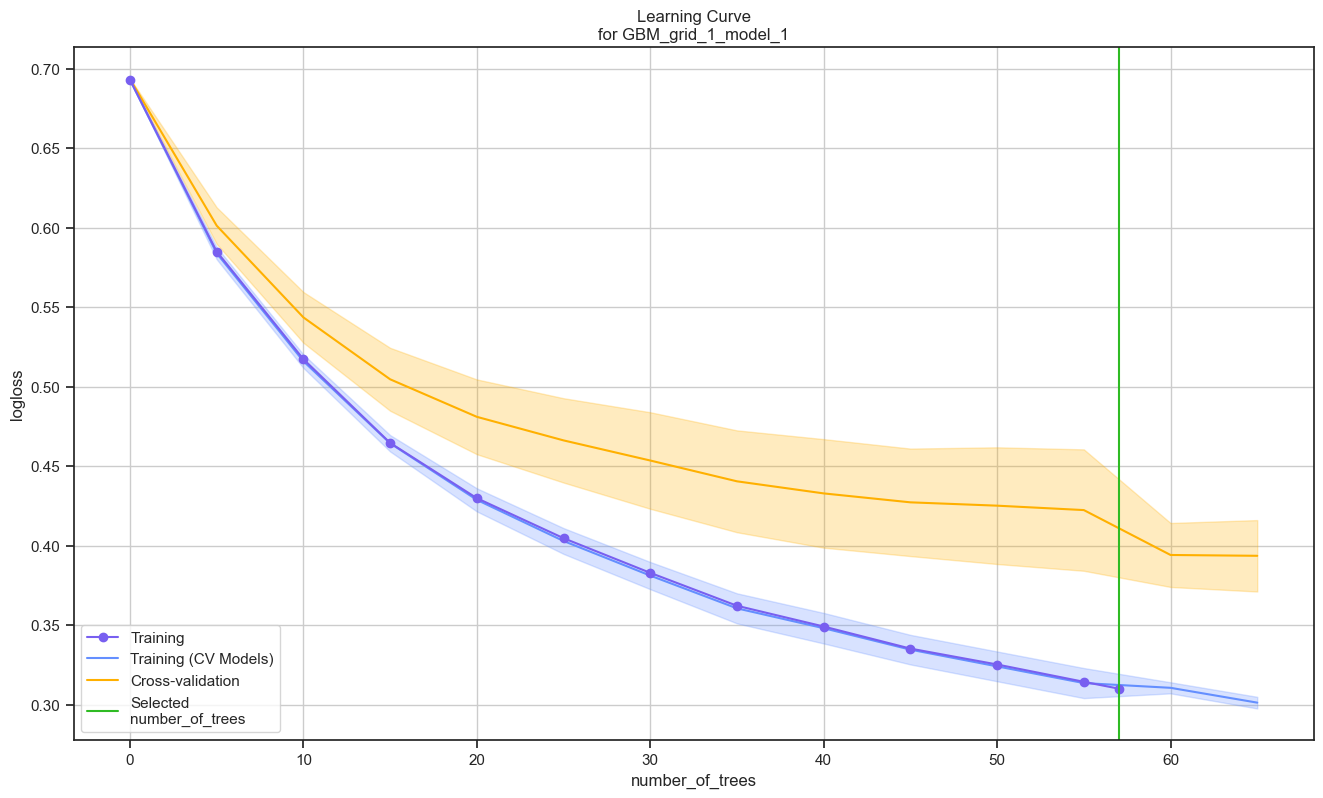

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

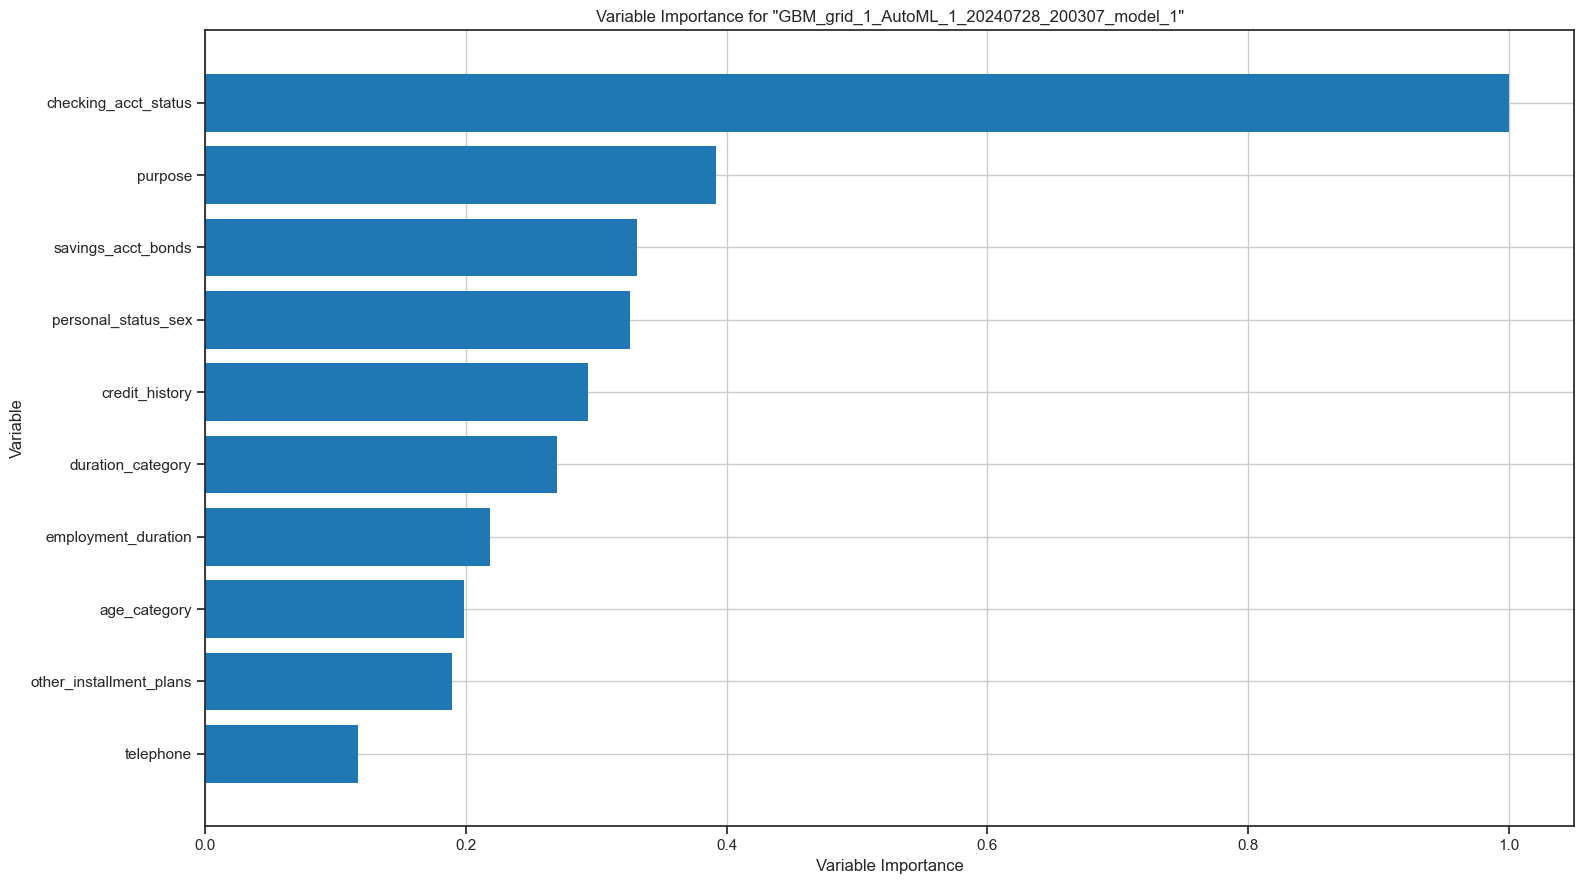

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

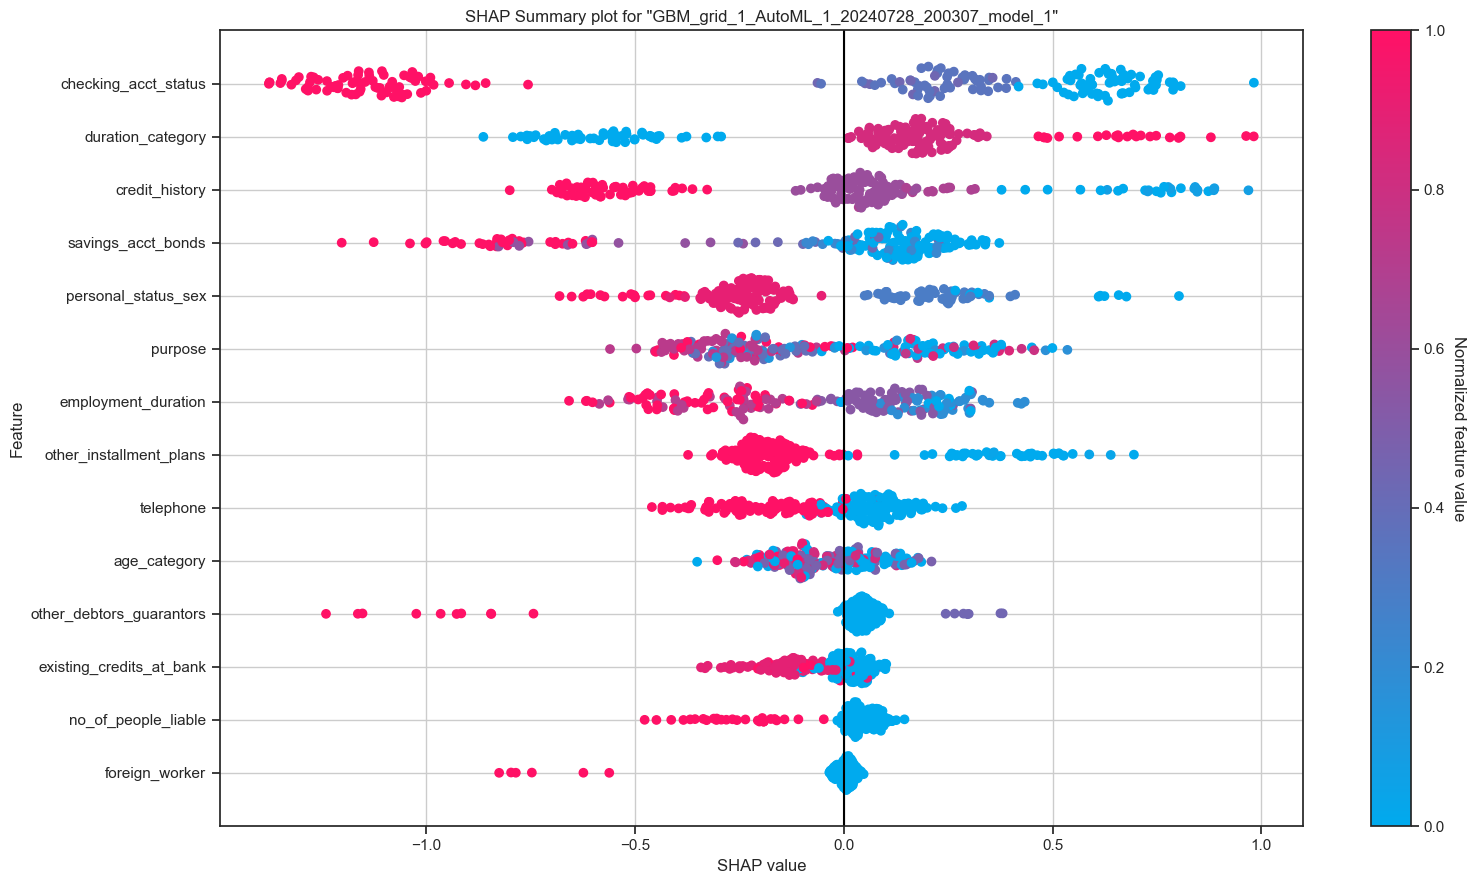

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

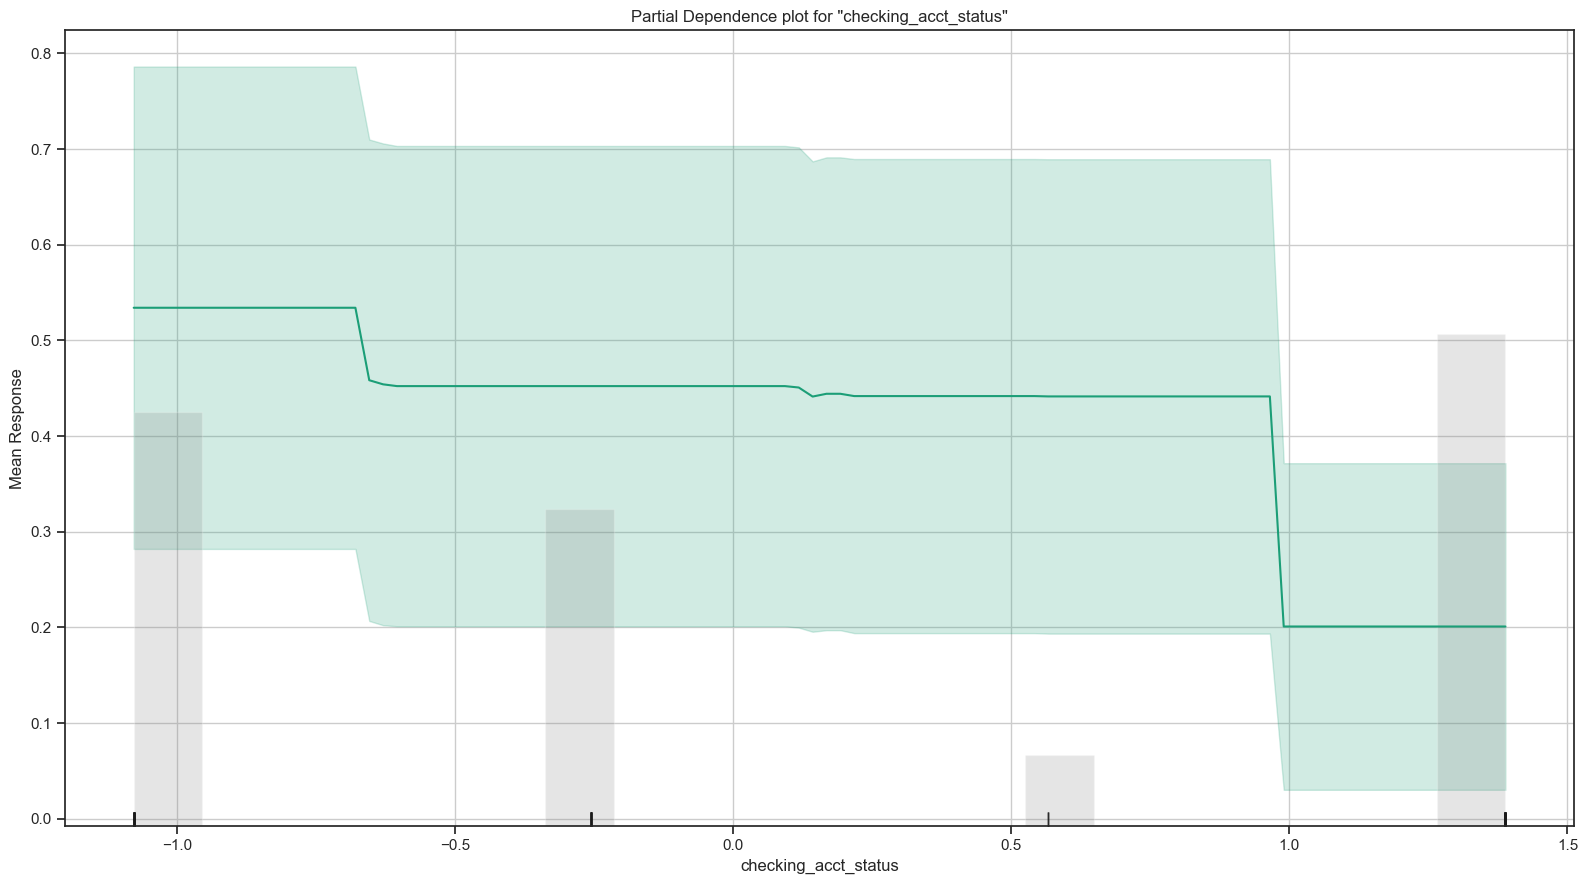

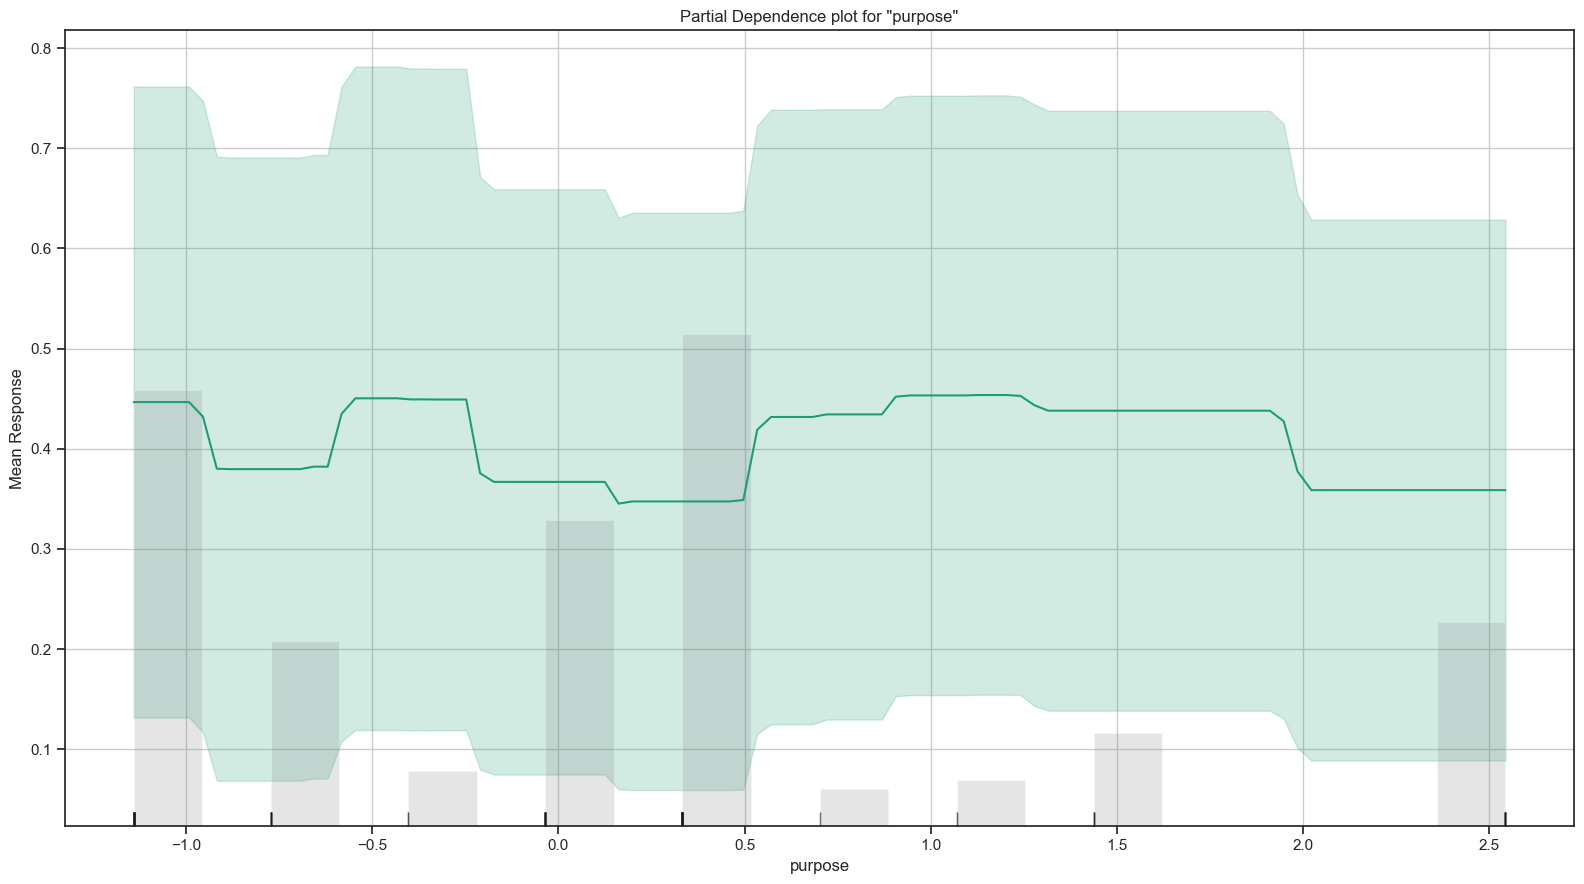

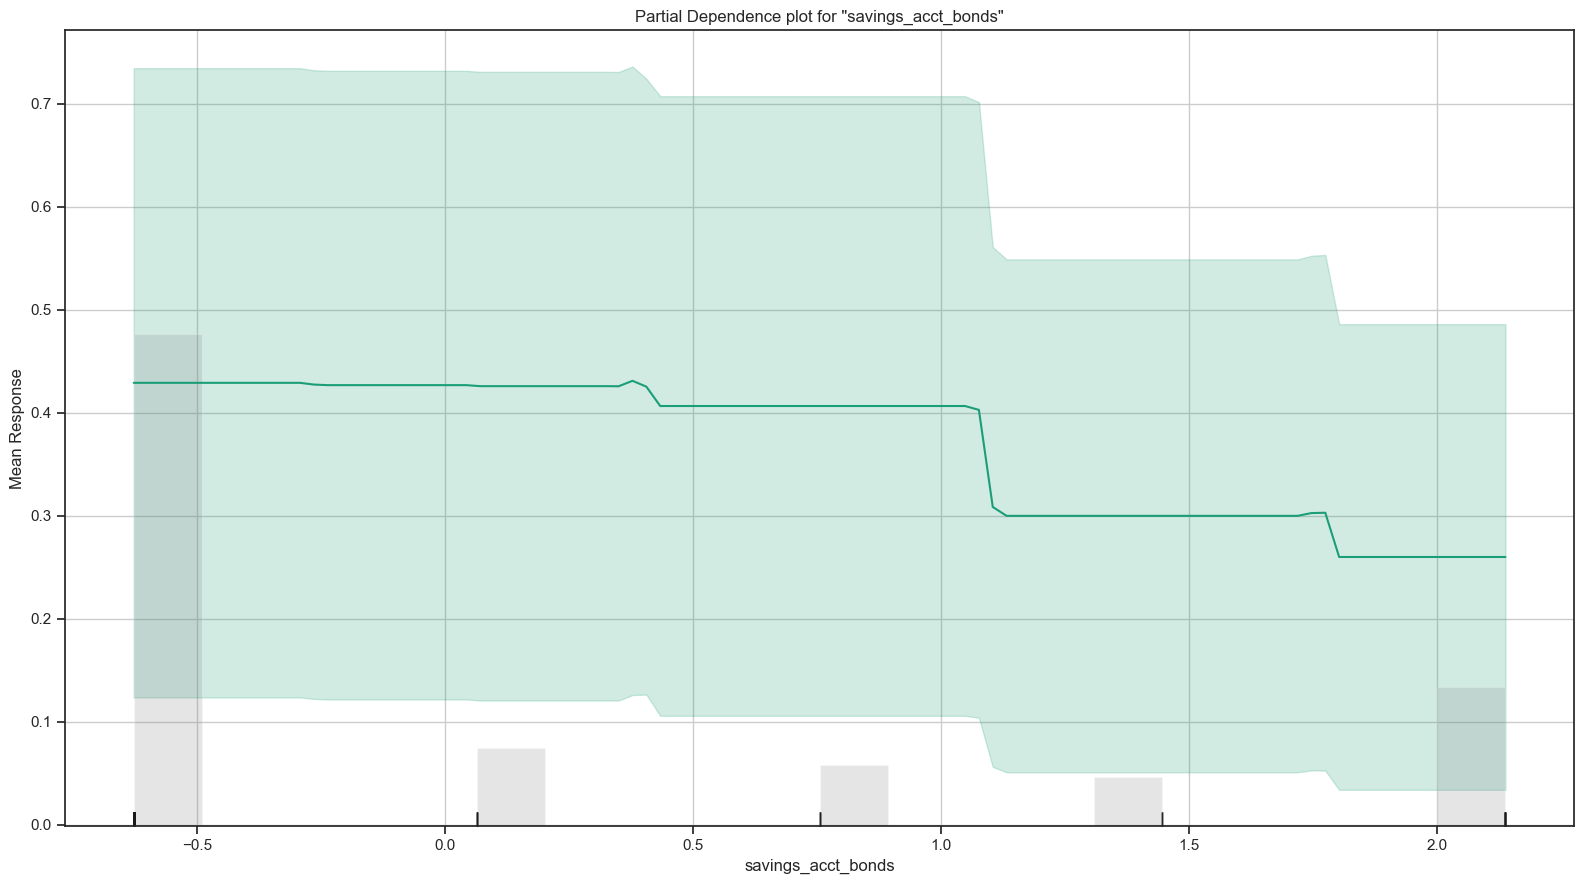

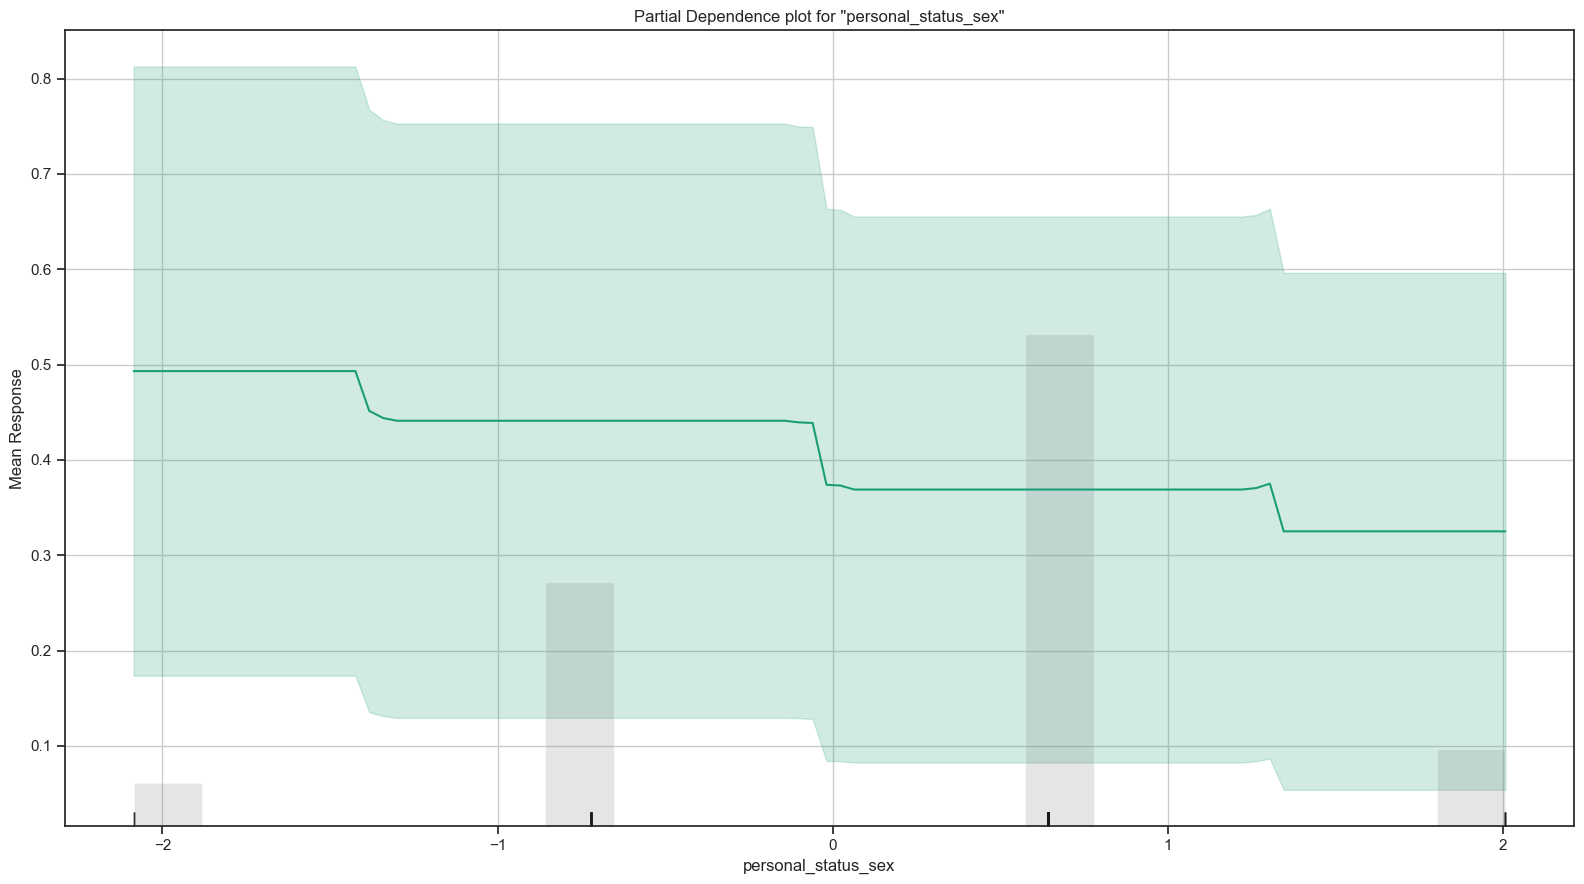

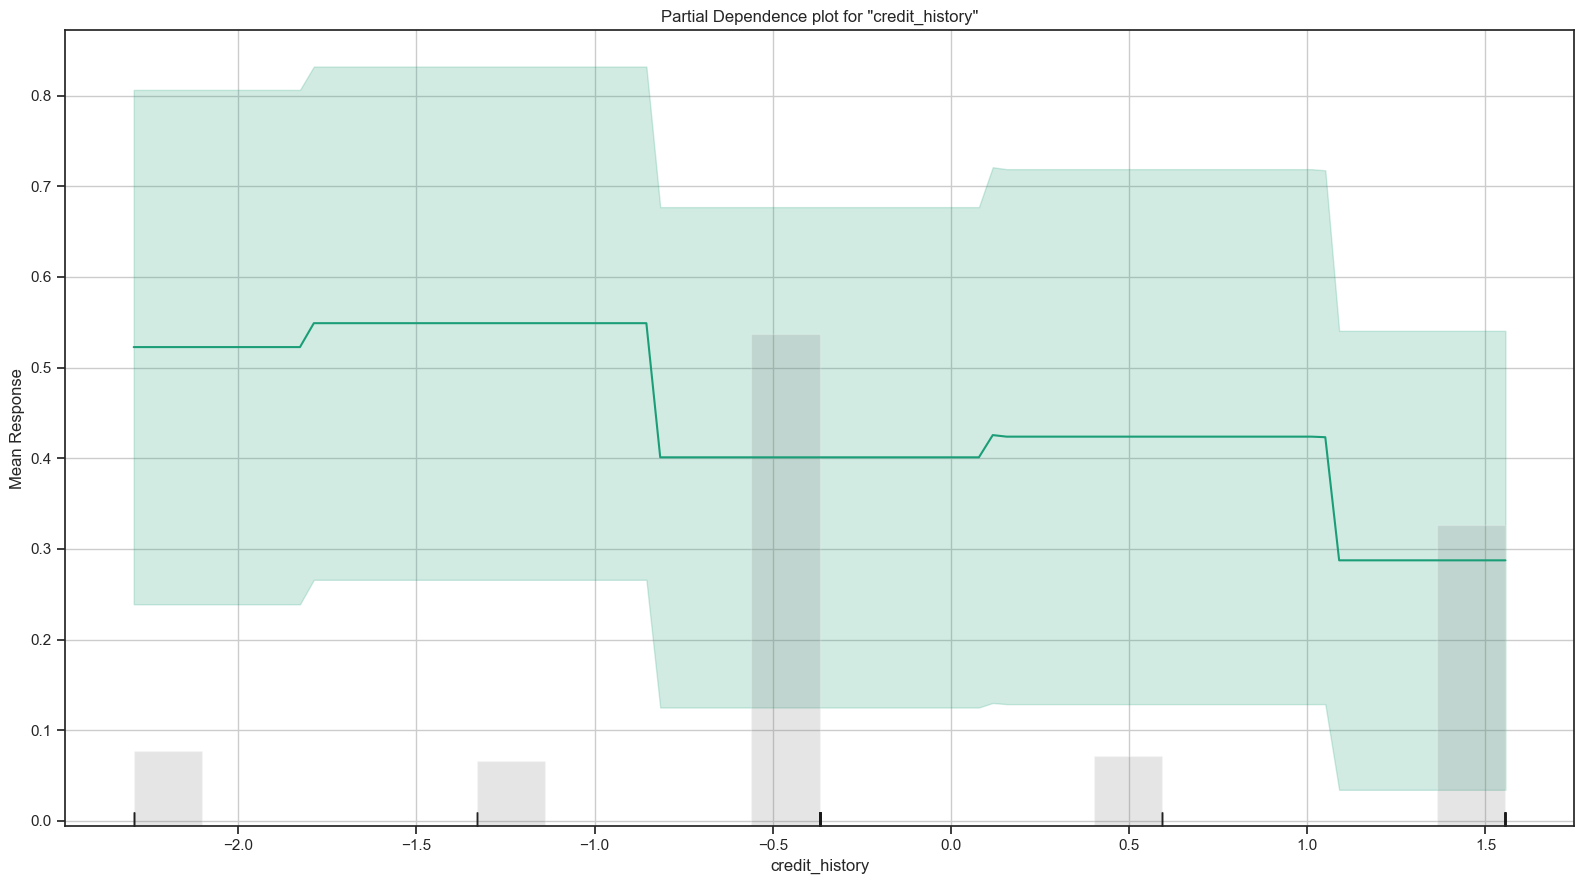

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240728_200307_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34611405987529975
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      93   47   0.3357   (47.0/140.0)
1      13   47   0.2167   (13.0/60.0)
Total  106  94   0.3      (60.0/200.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

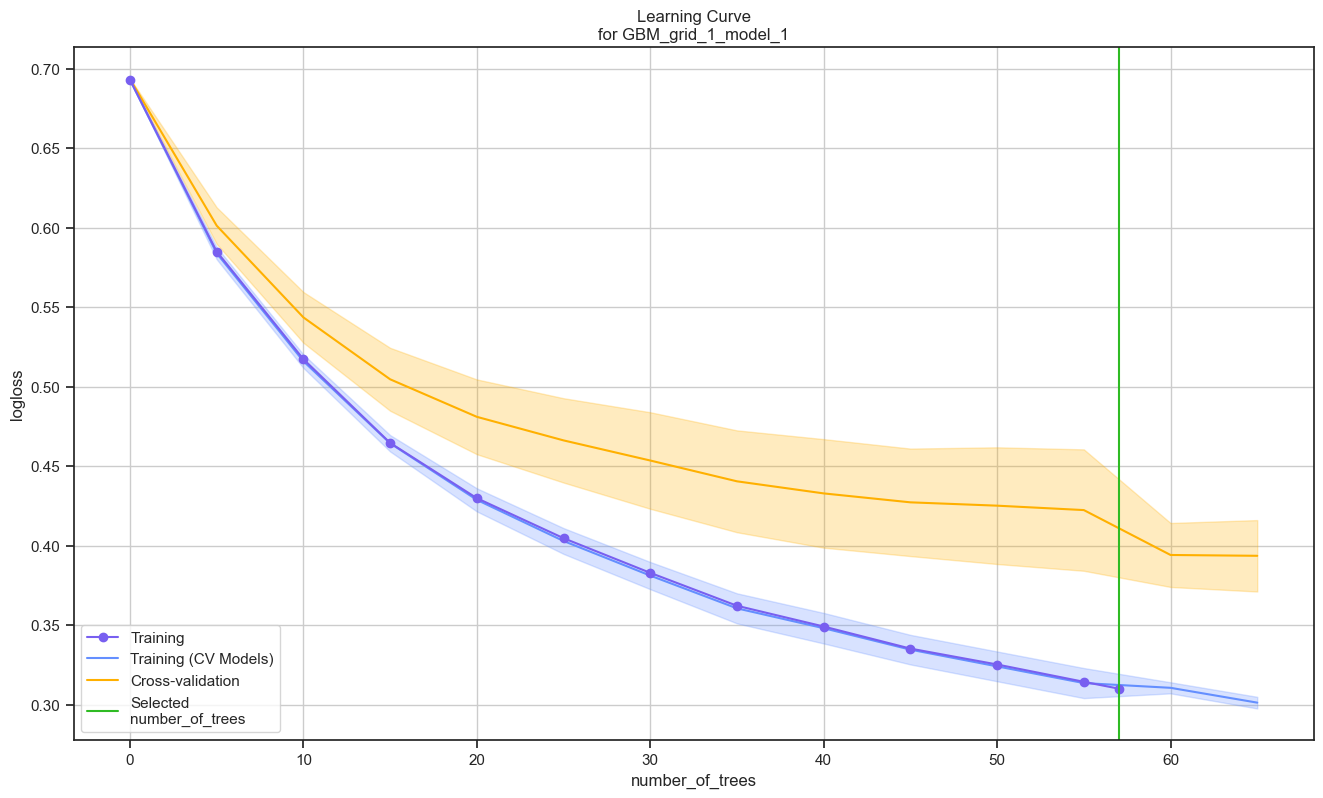

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

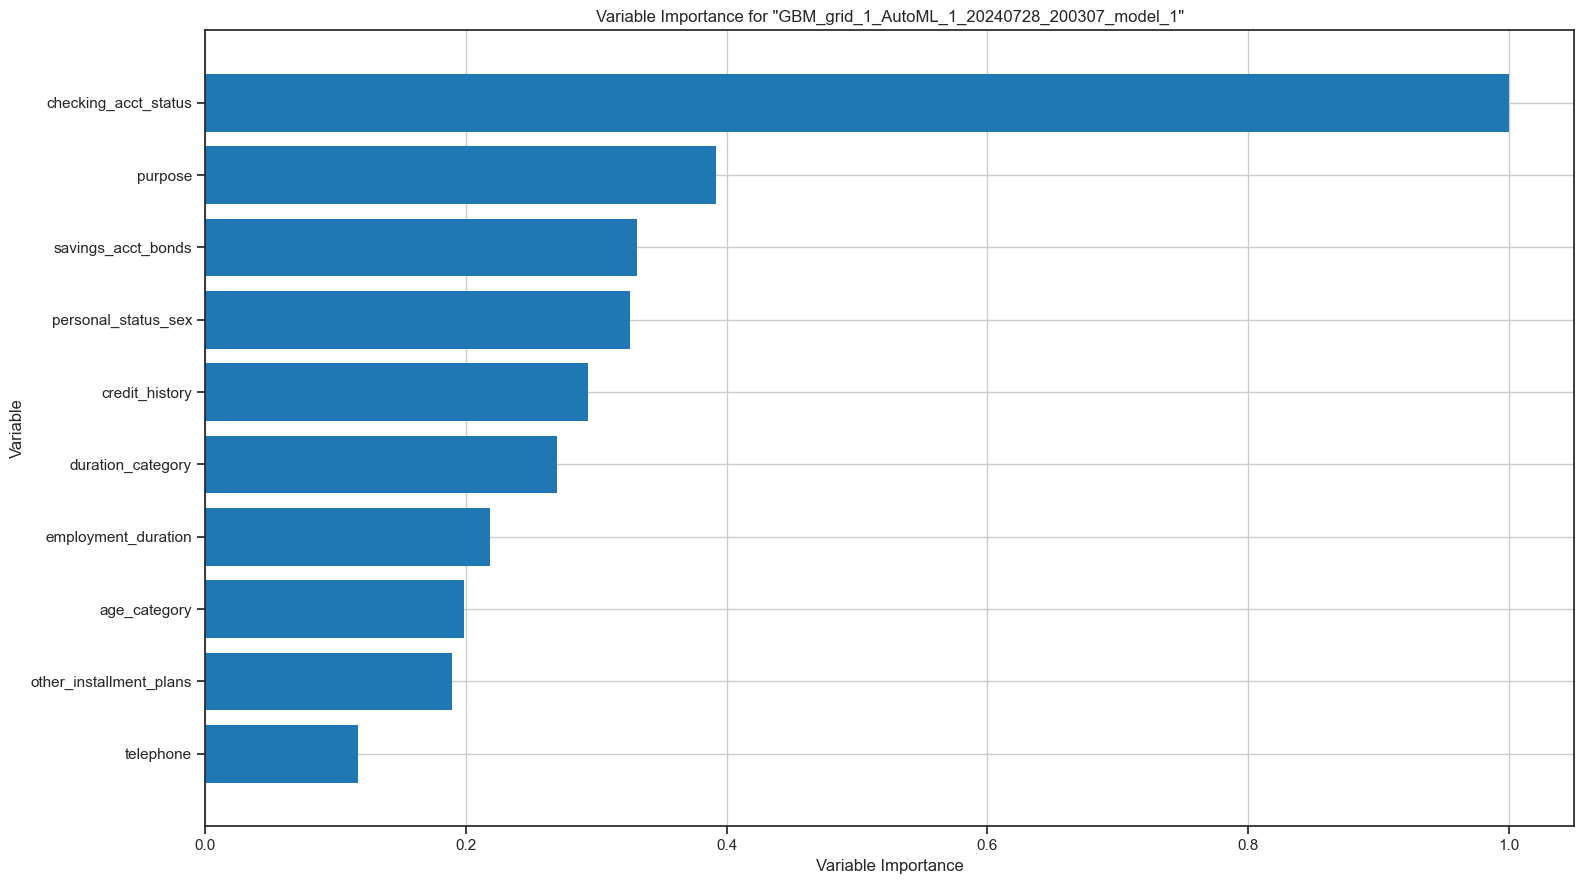

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

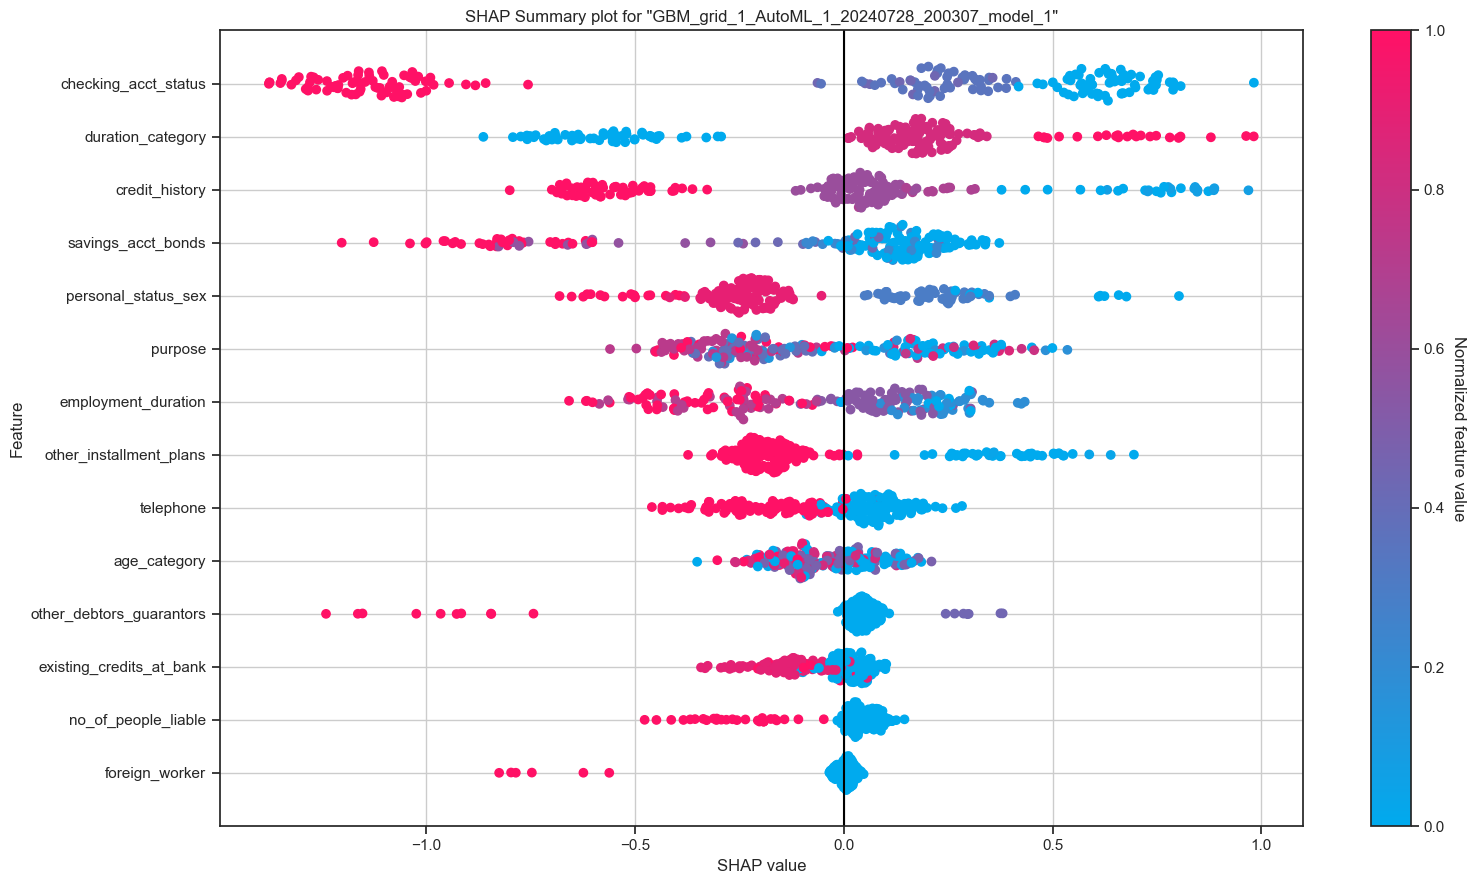

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

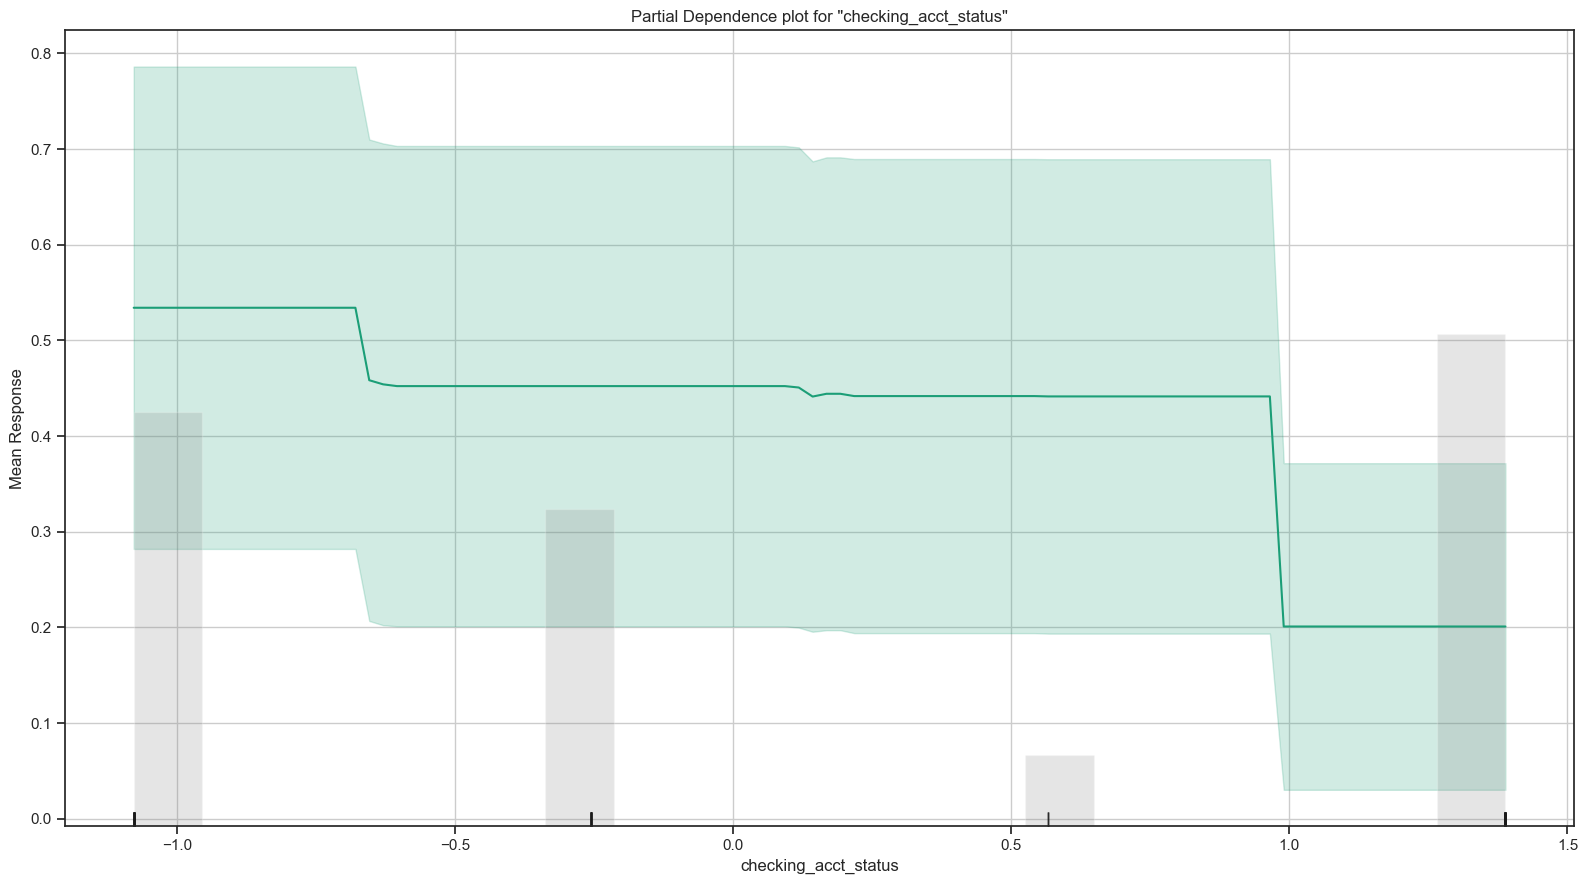

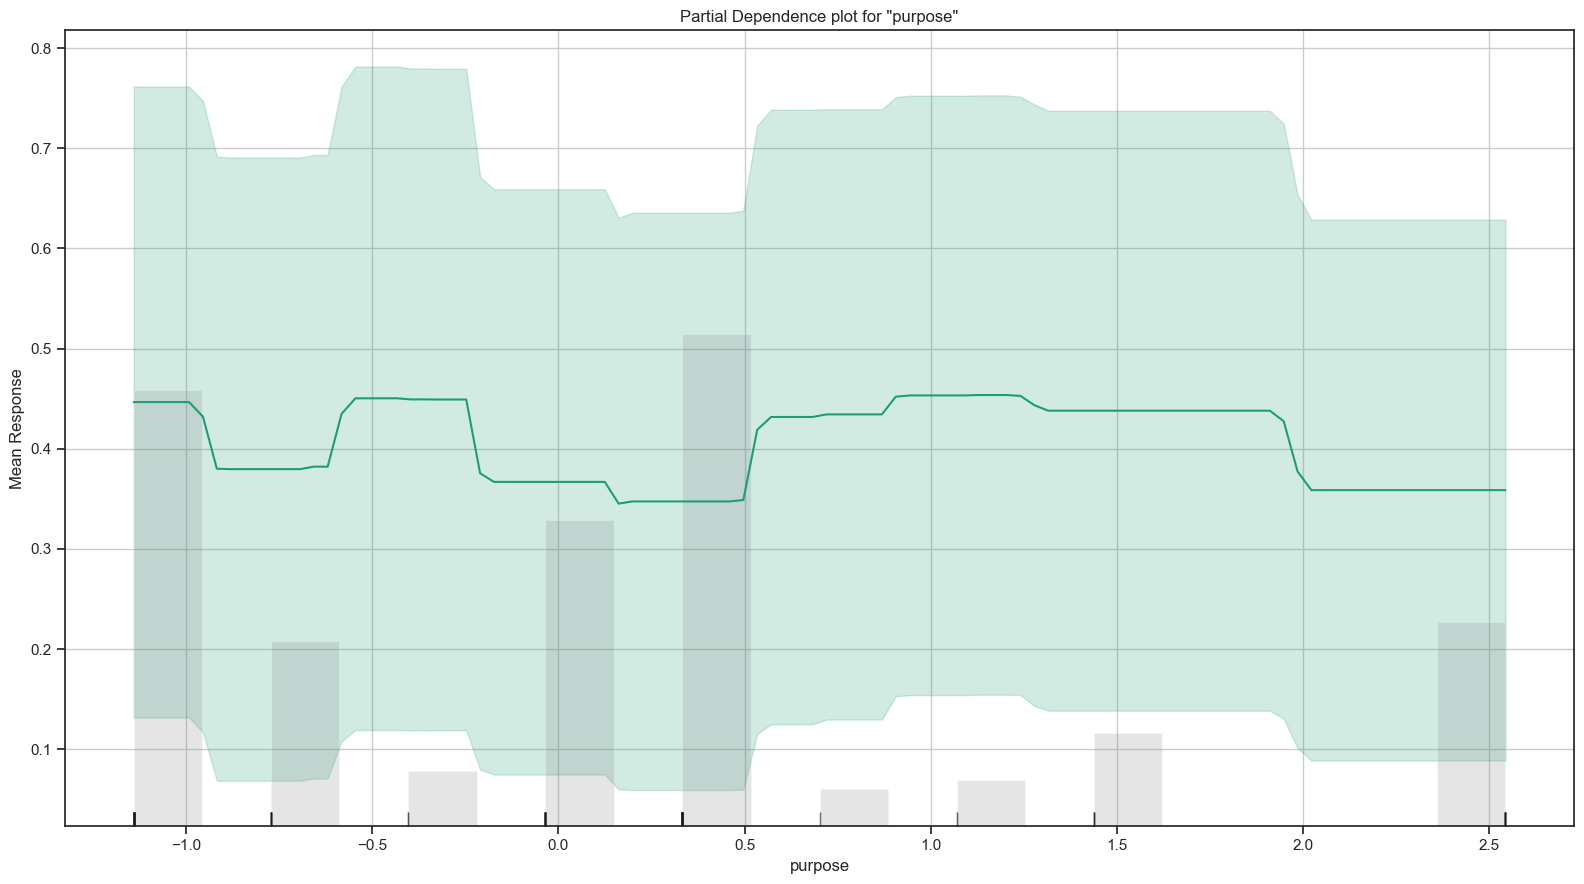

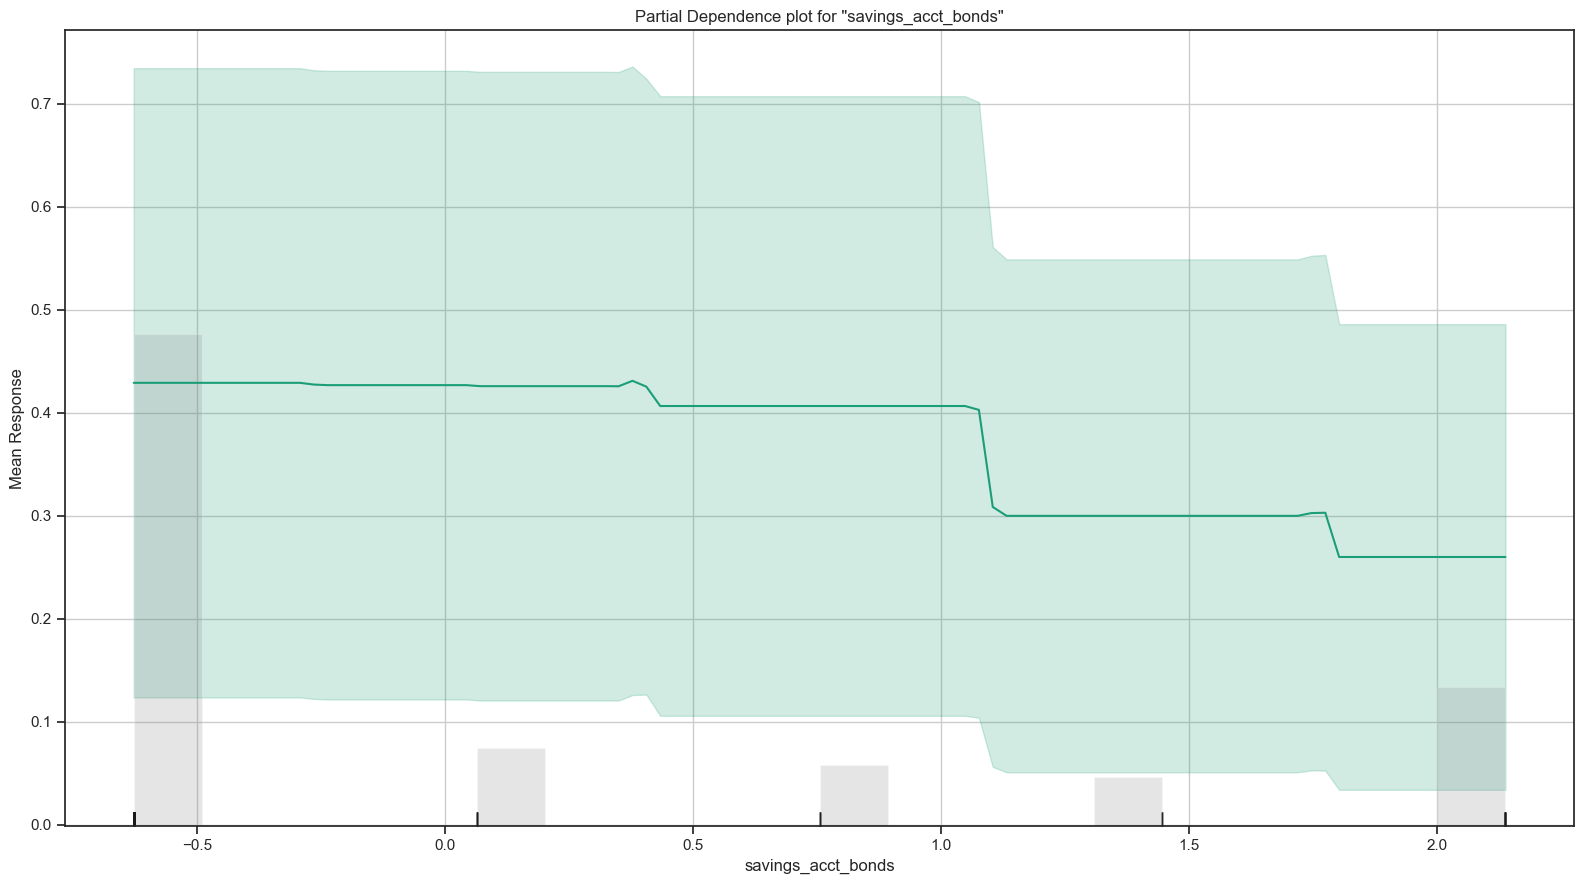

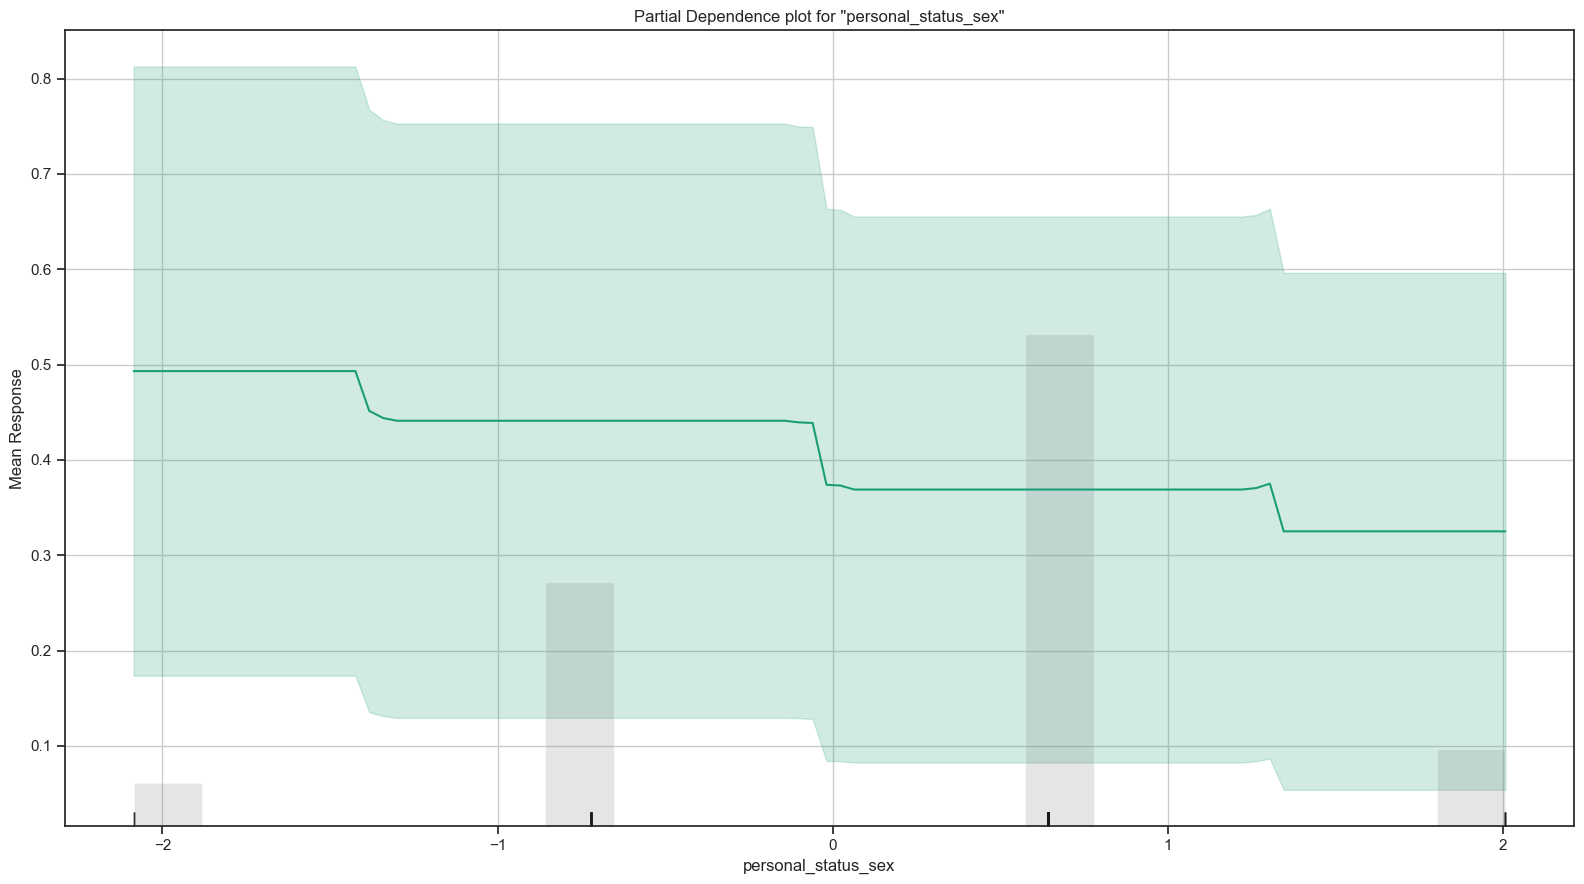

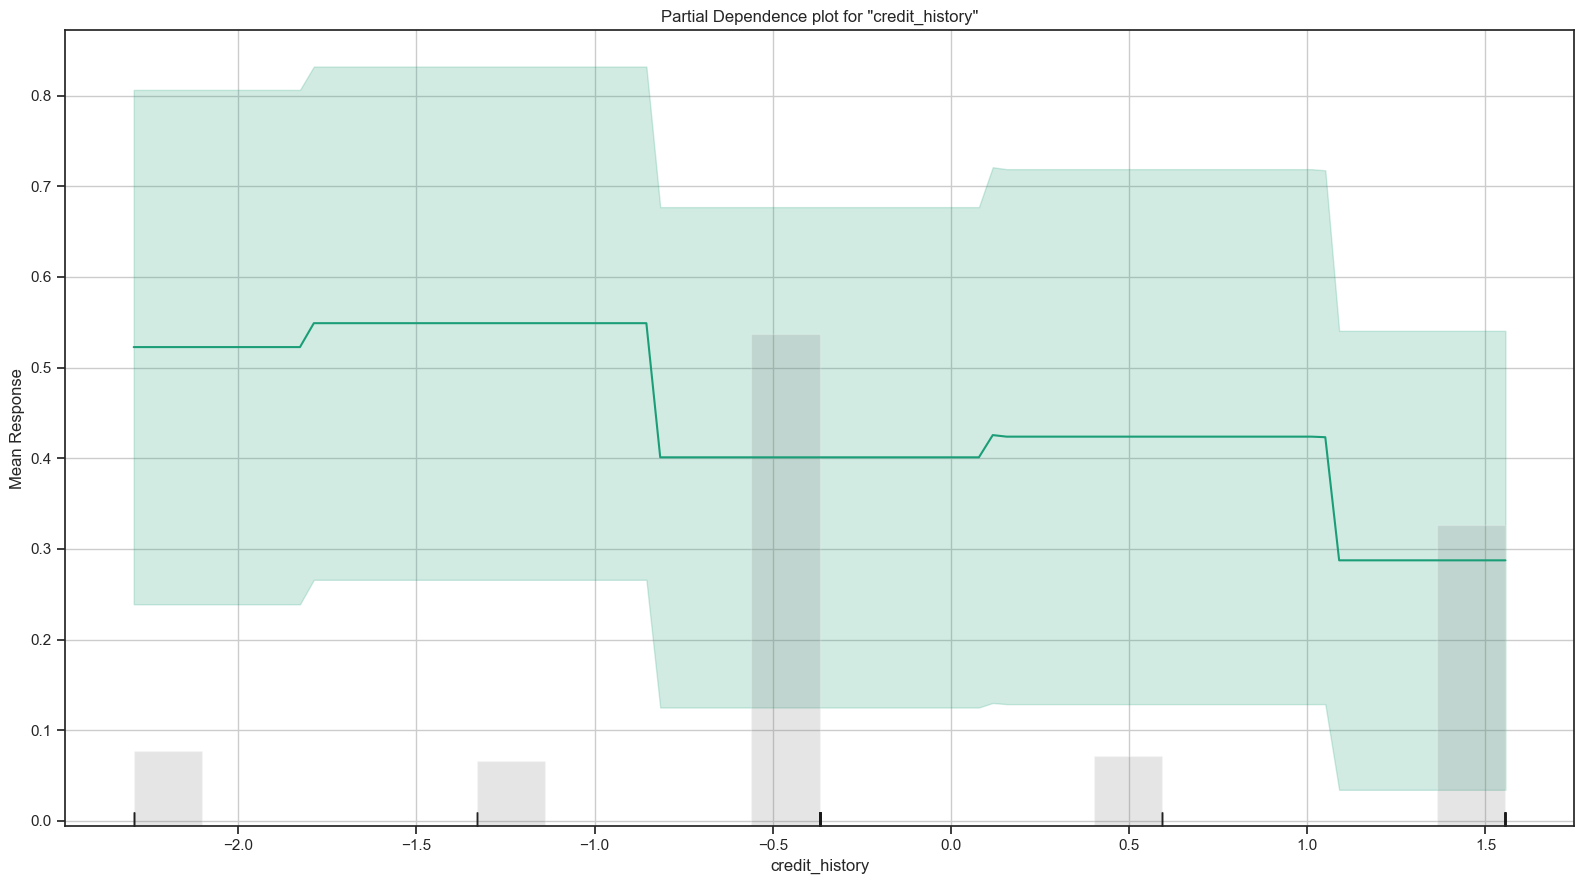

In [151]:
best_single_model.explain(test_final)

### 8.8 Downloading the Model as MOJO for Deployment later on

In [152]:
file_path = "Best_AutoML_model4.zip"
best_single_model.download_mojo(file_path)

'C:\\Users\\ryank\\Desktop\\FYP\\Data Analysis with ChatGPTs Code Interpreter\\Code Related\\AutoML Notebooks\\Best_AutoML_model4.zip'

### 8.9 Importing the Model

In [153]:
imported_model = h2o.import_mojo(file_path)

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [154]:
print(imported_model)

Model Details
H2OGenericEstimator : Import MOJO Model
Model Key: Generic_model_python_1722167889047_2395


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    57                 57                          27320                  7            14           9.21053       15            44            33.3158

ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.09194964444202466
RMSE: 0.3032319977212574
LogLoss: 0.31012385520231217
Mean Per-Class Error: 0.12455820563519525
AUC: 0.95457859614434
AUCPR: 0.9578902667892383
Gini: 0.9091571922886801

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43924555089773043
       0    1    Error    Rate
-----  ---  ---  -------  --------------
0      4

In [155]:
train_final.head(2)

checking_acct_status    credit_history    purpose    savings_acct_bonds    employment_duration    personal_status_sex    other_debtors_guarantors    other_installment_plans    existing_credits_at_bank    no_of_people_liable    telephone    foreign_worker    duration_category    age_category    credit_risk
----------------------  ----------------  ---------  --------------------  ---------------------  ---------------------  --------------------------  -------------------------  --------------------------  ---------------------  -----------  ----------------  -------------------  --------------  -------------
             -1.07781           1.55589    0.333162              2.13856                1.52983                0.64251                    -0.276211                   0.556256                    1.2978                -0.355995     1.45527          -0.167343             -1.31169        2.71257               0
             -0.255727         -0.368678   0.333162             -0.627774              -0.162052              -0.721625                   -0.276211                   0.556256                   -0.583595              -0.355995    -0.687158         -0.167343              2.02396       -0.951412              1
[2 rows x 15 columns]

### 8.10 Making Prediction using MOJO model (Testing Purpose)

In [156]:
# Ensure that the columns match those used for training
single_row = h2o.H2OFrame({'checking_acct_status': [-1.07781], 'credit_history': [1.55589], 'purpose': [0.333162], 'savings_acct_bonds': [2.13856], 'employment_duration': [1.52983], 'personal_status_sex': [0.64251], 'other_debtors_guarantors': [-0.276211], 'other_installment_plans': [0.556256], 'existing_credits_at_bank': [1.2978], 'no_of_people_liable': [-0.355995], 'telephone': [1.45527], 'foreign_worker': [-0.167343], 'duration_category': [-1.31169], 'age_category': [2.71257]})

# Make predictions using the MOJO model
single_prediction = imported_model.predict(single_row)

# Print the single prediction
print(single_prediction)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
  predict        p0         p1
        0  0.904454  0.0955457
[1 row x 3 columns]



In [157]:
# Ensure that the columns match those used for training
single_row = h2o.H2OFrame({'checking_acct_status': [-0.255727], 'credit_history': [-0.368678], 'purpose': [0.333162], 'savings_acct_bonds': [-0.627774], 'employment_duration': [-0.162052], 'personal_status_sex': [-0.721625], 'other_debtors_guarantors': [-0.276211], 'other_installment_plans': [0.556256], 'existing_credits_at_bank': [-0.583595], 'no_of_people_liable': [-0.355995], 'telephone': [-0.687158], 'foreign_worker': [-0.167343], 'duration_category': [2.02396], 'age_category': [-0.951412]})

# Make predictions using the MOJO model
single_prediction = imported_model.predict(single_row)

# Print the single prediction
print(single_prediction)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
  predict        p0        p1
        1  0.198746  0.801254
[1 row x 3 columns]

